$$\large \textbf{This Supervised Learning Model is to predict the House Prices in Boston}$$

$$\normalsize \underline{\textbf{The Kaggle Get-Started Competition}}$$

$$\small \textbf{The CopyRight @ Phuong V. Nguyen}$$

This Machine Learning program was written by Phuong V. Nguyen, based on the $\textbf{Anacoda 1.9.7}$ and $\textbf{Python 3.7}$.

$$\underline{\textbf{Main Contents}}$$

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

# Preparing project

## Loading Libraries

### Algorithms for handling raw data

In [1]:
import os
import numpy as np
import pandas as pd
from scipy import stats
from pandas import set_option
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
#from feature_selector import FeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

###  Machine Learning Algorithms

#### Linear Algorithms

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

#### Non-linear Algorithms

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import SVR

#### Advanced  Algorithms (Ensemble Algorithms)

In [4]:
from sklearn.pipeline import Pipeline

#####  Boosting Methods

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
#from xgboost import XGBClassifier
#from xgboost import XGBRegressor

##### Bagging Methods

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor

#####  Combining several Classification Algorithms

In [7]:
from sklearn.ensemble import VotingClassifier

### Algorithms for the model evaluation

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error

In [9]:
# 4. Defining some varibales for printing the result
Purple= '\033[95m'
Cyan= '\033[96m'
Darkcyan= '\033[36m'
Blue = '\033[94m'
Green = '\033[92m'
Yellow = '\033[93m'
Red = '\033[91m'
Bold = "\033[1m"
Reset = "\033[0;0m"
Underline= '\033[4m'
End = '\033[0m'

## Loading data

In [10]:
os.getcwd()


'/Users/phuong/Dropbox/Machine Learning/Kaggle Competion/Housing Price Prediction'

In [11]:
#os.chdir("C:\\Users\\Phuong_1\\Dropbox\\Machine Learning\\Kaggle Competion\\Housing Price Prediction")
os.chdir("/Users/phuong/Dropbox/Machine Learning/Kaggle Competion/Housing Price Prediction")
os.getcwd()

'/Users/phuong/Dropbox/Machine Learning/Kaggle Competion/Housing Price Prediction'

In [12]:
used_data=pd.read_csv('train.csv')

In [13]:
X_test_used_data=pd.read_csv('test.csv')

#  Exploring Data

## Descriptve Statistics

### Peek at Your Data


There is no substitute for looking at the raw data. Looking at the raw data can reveal insights
that you cannot get any other way. It can also plant seeds that may later grow into ideas on
how to better pre-process and handle the data for machine learning tasks. You can review the
first 20 rows of your data using the head() function on the Pandas DataFrame.

Having a look at the first ten columns and ten rows in the dataframe $used\_data$

The First Ten Rows

In [14]:
used_data.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  
8      4   2008        WD        Abnorml     129900  
9      1   2008        WD         Normal     118000  

[10 rows x 81 columns]

Having a look at all 81 columns in the dataset $used\_data$

In [15]:
used_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

$\textbf{Comments:}$ It is worth noting that we have 80 variables including one dependent variable and 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home. But there are 81 ones in the dataset $used\_data$. One further varaible presents 'Id'. So we exclude it

In [16]:
used_data1=used_data.iloc[:,1:81]
used_data1.iloc[:,0:80].head(5)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

### Review Dimensions of Data

You must have a very good handle on how much data you have, both in terms of rows and
columns.

- Too many rows and algorithms may take too long to train. Too few and perhaps you do
not have enough data to train the algorithms.

- Too many features and some algorithms can be distracted or suffer poor performance due
to the curse of dimensionality.

You can review the shape and size of your dataset by printing the shape property on the
Pandas DataFrame.


In [17]:
used_data.shape

(1460, 81)

In [18]:
X_test_used_data.shape

(1459, 80)

$\textbf{Comments:}$ $used\_data$ has 81 features with 1,460 observed values. Meanwhile, $X\_predicted\_used\_data$ has 80 features with 1,459 obverved values.

### Missing data


In [19]:
amount_missing_data=used_data.iloc[:,1:81].isnull().sum().sort_values(ascending=False)
percent_miss_data=(used_data.iloc[:,1:81].isnull().sum()/used_data.iloc[:,1:81].isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([amount_missing_data, percent_miss_data],axis=1,keys=['Amount','Percent'])
missing_data.head(25)
#missing_data.to_excel("missing_data_all.xls") 

Amount   Percent
PoolQC          1453  0.995205
MiscFeature     1406  0.963014
Alley           1369  0.937671
Fence           1179  0.807534
FireplaceQu      690  0.472603
LotFrontage      259  0.177397
GarageType        81  0.055479
GarageCond        81  0.055479
GarageFinish      81  0.055479
GarageQual        81  0.055479
GarageYrBlt       81  0.055479
BsmtFinType2      38  0.026027
BsmtExposure      38  0.026027
BsmtQual          37  0.025342
BsmtCond          37  0.025342
BsmtFinType1      37  0.025342
MasVnrArea         8  0.005479
MasVnrType         8  0.005479
Electrical         1  0.000685
RoofMatl           0  0.000000
Exterior1st        0  0.000000
RoofStyle          0  0.000000
ExterQual          0  0.000000
Exterior2nd        0  0.000000
YearBuilt          0  0.000000

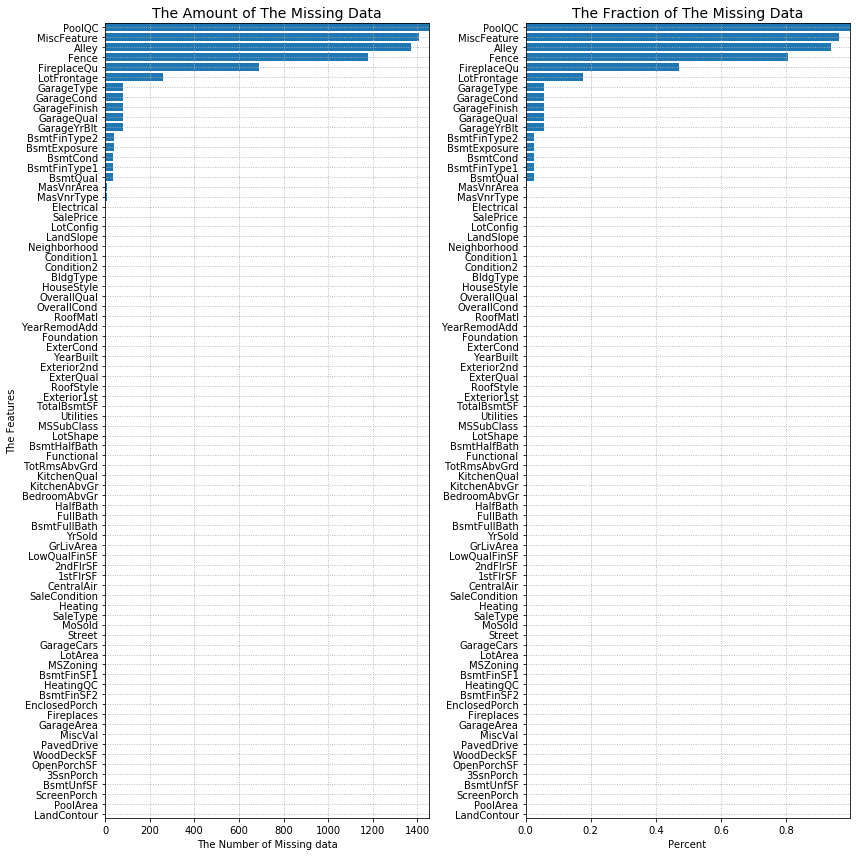

In [20]:
fig=plt.figure(figsize=(12,12))
#fig.suptitle('The Missing Data', fontsize=16)
fig.add_subplot(1,2,1)
plt.barh(missing_data.Amount.sort_values(ascending=True).index,
         missing_data.Amount.sort_values(ascending=True))
plt.autoscale(enable=True, axis='both',tight=True)
plt.title('The Amount of The Missing Data',fontsize=14)
plt.ylabel('The Features',fontsize=10)
plt.xlabel('The Number of Missing data', fontsize=10)
plt.grid(which='major',linestyle=':',linewidth=0.9)
fig.add_subplot(1,2,2)
plt.barh(missing_data.Percent.sort_values(ascending=True).index,
         missing_data.Percent.sort_values(ascending=True))
plt.autoscale(enable=True, axis='both',tight=True)
plt.title('The Fraction of The Missing Data',fontsize=14)
#plt.ylabel('The Features',fontsize=10)
plt.xlabel('Percent', fontsize=10)
plt.grid(which='major',linestyle=':',linewidth=0.9)
plt.tight_layout()

#plt.savefig("Missing_data.pdf")

18 exaplanatory variables have missing data. But they really suffer from this problem of missing data?

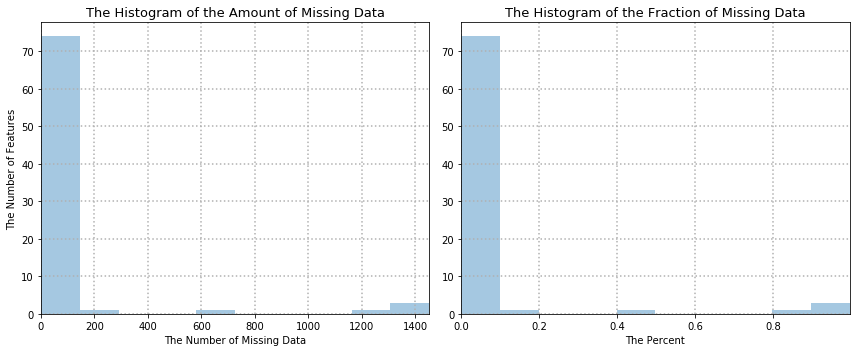

In [21]:
fig=plt.figure(figsize=(12,5))
fig.add_subplot(1,2,1)
sns.distplot(missing_data.Amount,bins=10,hist=True, kde=False)
plt.title('The Histogram of the Amount of Missing Data',fontsize=13)
plt.xlabel('The Number of Missing Data', fontsize=10)
plt.ylabel('The Number of Features',fontsize=10)
plt.grid(linestyle=':', linewidth=1.5)
plt.autoscale(enable=True,axis='x',tight=True)
fig.add_subplot(1,2,2)
sns.distplot(missing_data.Percent,bins=10,hist=True, kde=False)
plt.title('The Histogram of the Fraction of Missing Data',fontsize=13)
plt.xlabel('The Percent', fontsize=10)
#plt.ylabel('The Number of Features',fontsize=10)
plt.grid(linestyle=':', linewidth=1.5)
plt.autoscale(enable=True,axis='x',tight=True)
plt.tight_layout()
#plt.savefig("Missing_data_hostogram.pdf")

### Handling missing values 

#### PoolQC

In [22]:
print(Bold + 'A number of missing value of the PoolQC attribute:')
amount_missing_PoolQC=used_data['PoolQC'].isnull().sum()
print(amount_missing_PoolQC)

A number of missing value of the PoolQC attribute:
1453


In [23]:
used_data['PoolQC'].head(10)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: PoolQC, dtype: object

$$\textbf{Comments:}$$ 
Noting that NaN does not mean no data. It imlies no pool.

In [24]:
used_data[['PoolQC']]=used_data[['PoolQC']].fillna('NoPool')
used_data['PoolQC'].unique()

array(['NoPool', 'Ex', 'Fa', 'Gd'], dtype=object)

In [25]:
amount_missing_PoolQC=used_data['PoolQC'].isnull().sum()
print(amount_missing_PoolQC)

0


$$\textbf{Comments:}$$ We see that the attribute of $PoolQC$ has no missing value anymore.

#### MiscFeature

In [26]:
amount_missing_MiscFeature=used_data['MiscFeature'].isnull().sum()
print(Red + Bold + 'A number of missing value of the MiscFeature attribute: {}'.format(amount_missing_MiscFeature) )

A number of missing value of the MiscFeature attribute: 1406


$$\textbf{Comments:}$$ It seems the attribute of $MiscFeature$ has so many missing values. Let's have a look at on this atribute

In [27]:
used_data['MiscFeature'].head(10)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5    Shed
6     NaN
7    Shed
8     NaN
9     NaN
Name: MiscFeature, dtype: object

$$\textbf{Comments:}$$ We should not delete this feature since there is a feature of its value in terms of the US Dollar, $MiscFeature$, which is full data avaiable.

In [28]:
used_data[['MiscFeature']]=used_data[['MiscFeature']].fillna('Nothing')
used_data['MiscFeature'].unique()

array(['Nothing', 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [29]:
amount_missing_MiscFeature=used_data['MiscFeature'].isnull().sum()
print(Red + Bold + 'A number of missing value of the MiscFeature attribute: {}'.format(amount_missing_MiscFeature) )

A number of missing value of the MiscFeature attribute: 0


$$\textbf{Comments:}$$ We see that the attribute of $MiscFeature$ has no missing value anymore.

#### Alley

In [30]:
amount_missing_Alley=used_data['Alley'].isnull().sum()
print(Red + Bold + 'A number of missing value of the Alley attribute: {}'.format(amount_missing_Alley) )

A number of missing value of the Alley attribute: 1369


$$\textbf{Comments:}$$ It seems the attribute of $Alley$ has 1,369 missing values. It is too much, right? Let's have a look at this attribute for detail

In [31]:
used_data['Alley'].head(5)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Alley, dtype: object

$$\textbf{Comments:}$$ NaN does not mean no data. It implies no Alley assess.

In [32]:
used_data[['Alley']]=used_data[['Alley']].fillna('NoAlley')
used_data.Alley.unique()

array(['NoAlley', 'Grvl', 'Pave'], dtype=object)

In [33]:
amount_missing_Alley=used_data['Alley'].isnull().sum()
print(Red + Bold + 'A number of missing value of the Alley attribute: {}'.format(amount_missing_Alley) )

A number of missing value of the Alley attribute: 0


$$\textbf{Comments:}$$ We see that the attribute of $Alley$ has no missing value anymore.

#### Fence

In [34]:
amount_missing_Fence=used_data['Fence'].isnull().sum()
print(Red + Bold + 'A number of missing value of the Fence attribute: {}'.format(amount_missing_Fence) )

A number of missing value of the Fence attribute: 1179


$$\textbf{Comments:}$$ It seems the attribute of $Fence$ has 1,179 missing values. It is too much, right? Let's have a look at this attribute for detail.

In [35]:
used_data['Fence'].head(5)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Fence, dtype: object

$$\textbf{Comments:}$$  NaN does not mean no data, but it implies no Fence.

In [36]:
used_data[['Fence']]=used_data[['Fence']].fillna('NoFence')
used_data.Fence.unique()

array(['NoFence', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [37]:
amount_missing_Fence=used_data['Fence'].isnull().sum()
print(Red + Bold + 'A number of missing value of the Fence attribute: {}'.format(amount_missing_Fence) )

A number of missing value of the Fence attribute: 0


$$\textbf{Comments:}$$ We see that the attribute of $Fence$ has no missing value anymore.

#### FireplaceQu

In [38]:
amount_missing_FireplaceQu=used_data['FireplaceQu'].isnull().sum()
print(Red + Bold + 'A number of missing value of the FireplaceQu attribute: {}'.format(amount_missing_FireplaceQu) )

A number of missing value of the FireplaceQu attribute: 690


$$\textbf{Comments:}$$ It seems the attribute of $FireplaceQu$ has 690 missing values. It is too much, right? Let's have a look at this attribute for detail.

In [39]:
#np.unique(used_data['FireplaceQu'])
used_data['FireplaceQu'].head(10)

0    NaN
1     TA
2     TA
3     Gd
4     TA
5    NaN
6     Gd
7     TA
8     TA
9     TA
Name: FireplaceQu, dtype: object

$$\textbf{Comments:}$$ NaN does not mean no data, but it implies no Fireplace.

In [40]:
used_data[['FireplaceQu']]=used_data[['FireplaceQu']].fillna('NoFirepl')
used_data.FireplaceQu.unique()

array(['NoFirepl', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [41]:
amount_missing_FireplaceQu=used_data['FireplaceQu'].isnull().sum()
print(Red + Bold + 'A number of missing value of the FireplaceQu attribute: {}'.format(amount_missing_FireplaceQu) )

A number of missing value of the FireplaceQu attribute: 0


####  GarageType

In [42]:
amount_missing_GarageType=used_data['GarageType'].isnull().sum()
print(Red + Bold + 'A number of missing value of the GarageType attribute: {}'.format(amount_missing_GarageType) )

A number of missing value of the GarageType attribute: 81


In [43]:
used_data['GarageType'].head(5)

0    Attchd
1    Attchd
2    Attchd
3    Detchd
4    Attchd
Name: GarageType, dtype: object

$$\textbf{Comments:}$$
Noting that NaN does not mean no data. It implies No Garage

In [44]:
used_data[['GarageType']]=used_data[['GarageType']].fillna('NoGarage')
used_data.GarageType.unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'NoGarage', 'Basment',
       '2Types'], dtype=object)

In [45]:
amount_missing_GarageType=used_data['GarageType'].isnull().sum()
print(Red + Bold + 'A number of missing value of the GarageType attribute: {}'.format(amount_missing_GarageType) )

A number of missing value of the GarageType attribute: 0


$$\textbf{Comments:}$$ We see that the attribute of $FireplaceQu$ has no missing value anymore.

#### LotFrontage

 Linear feet of street connected to property

In [46]:
amount_missing_LotFrontage=used_data['LotFrontage'].isnull().sum()
print(Red + Bold + 'A number of missing value of the LotFrontage attribute: {}'.format(amount_missing_LotFrontage) )

A number of missing value of the LotFrontage attribute: 259


In [47]:
100*used_data['LotFrontage'].isnull().sum()/used_data['LotFrontage'].isnull().count()

17.73972602739726

In [48]:
used_data['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

/Users/phuong/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/phuong/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/phuong/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/phuong/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


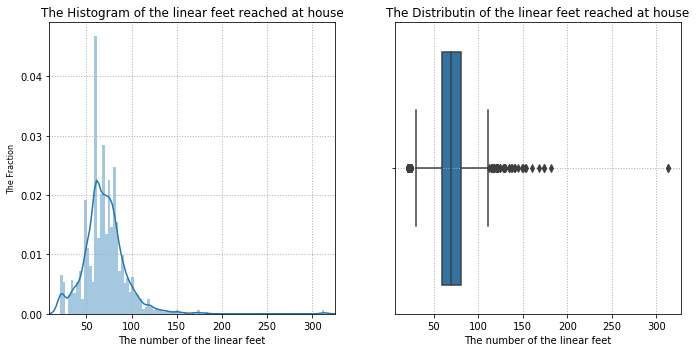

In [49]:
fig=plt.figure(figsize=(10,5))
fig.add_subplot(1,2,1)
sns.distplot(used_data.LotFrontage,bins=100)
plt.title('The Histogram of the linear feet reached at house',fontsize=12)
plt.xlabel('The number of the linear feet',fontsize=10)
plt.ylabel('The Fraction',fontsize=8)
plt.grid(which='major',linestyle=':',linewidth=1)
plt.autoscale(enable=True,axis='x',tight=True)
fig.add_subplot(1,2,2)
sns.boxplot(used_data.LotFrontage)
plt.title('The Distributin of the linear feet reached at house',fontsize=12)
plt.xlabel('The number of the linear feet',fontsize=10)
plt.grid(which='major',linestyle=':',linewidth=1)
plt.tight_layout()
plt.show()

$$\textbf{Comments:}$$

Since the proportion of missing value in this case is over 17 %, it would be big enough to influence the whole dataset. I do not have an optimal solution for that yet, but it is worth noting that 
not all algorithms fail when there is missing data.

There are algorithms that can be made robust to missing data, such as k-Nearest Neighbors that can ignore a column from a distance measure when a value is missing.

There are also algorithms that can use the missing value as a unique and different value when building the predictive model, such as classification and regression trees.

Sadly, the scikit-learn implementations of decision trees and k-Nearest Neighbors are not robust to missing values. Although it is being considered.

Nevertheless, this remains as an option if you consider using another algorithm implementation (such as xgboost) or developing your own implementation.

#### MasVnrType
Masonry veneer type

In [50]:
amount_missing_MasVnrType=used_data['MasVnrType'].isnull().sum()
print(Red + Bold + 'A number of missing value of the MasVnrType attribute: {}'.format(amount_missing_MasVnrType) )

A number of missing value of the MasVnrType attribute: 8


In [51]:
used_data.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [52]:
used_data[['MasVnrType']]=used_data[['MasVnrType']].fillna('NoMasVnrType')
used_data.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', 'NoMasVnrType'], dtype=object)

In [53]:
amount_missing_MasVnrType=used_data['MasVnrType'].isnull().sum()
print(Red + Bold + 'A number of missing value of the MasVnrType attribute: {}'.format(amount_missing_MasVnrType) )

A number of missing value of the MasVnrType attribute: 0


#### GarageYrBlt
Year garage was built

In [54]:
amount_missing_GarageYrBlt=used_data['GarageYrBlt'].isnull().sum()
print(Red + Bold + 'A number of missing value of the GarageYrBlt attribute: {}'.format(amount_missing_GarageYrBlt) )

A number of missing value of the GarageYrBlt attribute: 81


$$\textbf{Comments:}$$ It seems that 81 Houses in the baseline dataset have no Garage

In [55]:
100*used_data['GarageYrBlt'].isnull().sum()/used_data['GarageYrBlt'].isnull().count()

5.5479452054794525

In [56]:
used_data['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

/Users/phuong/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/phuong/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/phuong/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/phuong/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


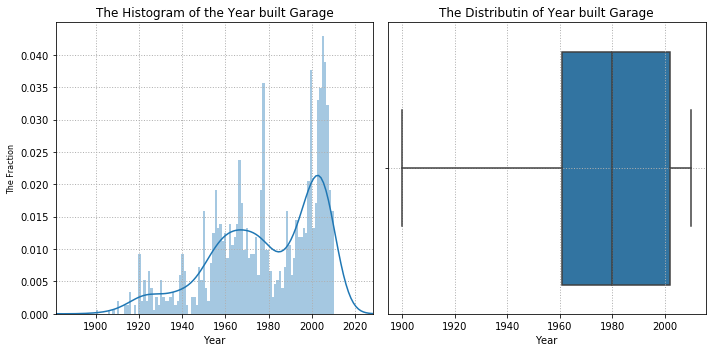

In [57]:
fig=plt.figure(figsize=(10,5))
fig.add_subplot(1,2,1)
sns.distplot(used_data.GarageYrBlt,bins=100)
plt.title('The Histogram of the Year built Garage',fontsize=12)
plt.xlabel('Year',fontsize=10)
plt.ylabel('The Fraction',fontsize=8)
plt.grid(which='major',linestyle=':',linewidth=1)
plt.autoscale(enable=True,axis='x',tight=True)
fig.add_subplot(1,2,2)
sns.boxplot(used_data.GarageYrBlt)
plt.title('The Distributin of Year built Garage',fontsize=12)
plt.xlabel('Year',fontsize=10)
plt.grid(which='major',linestyle=':',linewidth=1)
plt.tight_layout()

$$\textbf{Comments:}$$ Since the proportion of missing data is very small (5.55 %), it can not influence the whole dataset. On the other hand, missing data might be caused by two following reasons.

- First, one can not remember or know when a Garage was built because of a very long time ago. Therefore, I use the earliest year to fulfill the missing years. 

- Second,it might be a case that these 81 Houses in Boston has no garage. Thus, one could not recored the year of bulding a garage. 

However, here I chose the second case because this sittuation will also repeat to the following attributes related to Garage. Thus, the NaN should be fulfilled by a string value such as 'NoGarage'.

In [58]:
used_data[['GarageYrBlt']]=used_data[['GarageYrBlt']].fillna('NoGarage')


In [59]:
amount_missing_GarageYrBlt=used_data['GarageYrBlt'].isnull().sum()
print(Red + Bold + 'A number of missing value of the GarageYrBlt attribute: {}'.format(amount_missing_GarageYrBlt) )

A number of missing value of the GarageYrBlt attribute: 0


In [60]:
used_data['GarageYrBlt'].dtypes

dtype('O')

#### GarageCond
Garage condition 

In [61]:
amount_missing_GarageCond=used_data['GarageCond'].isnull().sum()
print(Red + Bold + 'A number of missing value of the GarageCond attribute: {}'.format(amount_missing_GarageCond) )

A number of missing value of the GarageCond attribute: 81


In [62]:
used_data.GarageCond.unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [63]:
used_data[['GarageCond']]=used_data[['GarageCond']].fillna('NoGarage')
used_data.GarageCond.unique()

array(['TA', 'Fa', 'NoGarage', 'Gd', 'Po', 'Ex'], dtype=object)

In [64]:
amount_missing_GarageCond=used_data['GarageCond'].isnull().sum()
print(Red + Bold + 'A number of missing value of the GarageCond attribute: {}'.format(amount_missing_GarageCond) )

A number of missing value of the GarageCond attribute: 0


#### GarageFinish
Interior finish of the garage

In [65]:
amount_missing_GarageFinish=used_data['GarageFinish'].isnull().sum()
print(Red + Bold + 'A number of missing value of the GarageFinish attribute: {}'.format(amount_missing_GarageFinish) )

A number of missing value of the GarageFinish attribute: 81


In [66]:
used_data.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [67]:
used_data[['GarageFinish']]=used_data[['GarageFinish']].fillna('NoGarage')
used_data.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', 'NoGarage'], dtype=object)

In [68]:
amount_missing_GarageFinish=used_data['GarageFinish'].isnull().sum()
print(Red + Bold + 'A number of missing value of the GarageFinish attribute: {}'.format(amount_missing_GarageFinish) )

A number of missing value of the GarageFinish attribute: 0


#### GarageQual
Garage quality

In [69]:
amount_missing_GarageQual=used_data['GarageQual'].isnull().sum()
print(Red + Bold + 'A number of missing value of the GarageQual attribute: {}'.format(amount_missing_GarageQual) )

A number of missing value of the GarageQual attribute: 81


In [70]:
used_data.GarageQual.unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [71]:
used_data[['GarageQual']]=used_data[['GarageQual']].fillna('NoGarage')
used_data.GarageQual.unique()

array(['TA', 'Fa', 'Gd', 'NoGarage', 'Ex', 'Po'], dtype=object)

In [72]:
amount_missing_GarageQual=used_data['GarageQual'].isnull().sum()
print(Red + Bold + 'A number of missing value of the GarageQual attribute: {}'.format(amount_missing_GarageQual) )

A number of missing value of the GarageQual attribute: 0


#### BsmtFinType2
Quality of second finished area (if present)

In [73]:
amount_missing_BsmtFinType2=used_data['BsmtFinType2'].isnull().sum()
print(Red + Bold + 'A number of missing value of the BsmtFinType2 attribute: {}'.format(amount_missing_BsmtFinType2) )

A number of missing value of the BsmtFinType2 attribute: 38


In [74]:
used_data.BsmtFinType2.unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [75]:
used_data[['BsmtFinType2']]=used_data[['BsmtFinType2']].fillna('NoBasement')
used_data.BsmtFinType2.unique()

array(['Unf', 'BLQ', 'NoBasement', 'ALQ', 'Rec', 'LwQ', 'GLQ'],
      dtype=object)

In [76]:
#used_data[['BsmtFinType2']]= used_data[['BsmtFinType2']].replace('NoGarage', 'NoBasement') 

In [77]:
amount_missing_BsmtFinType2=used_data['BsmtFinType2'].isnull().sum()
print(Red + Bold + 'A number of missing value of the BsmtFinType2 attribute: {}'.format(amount_missing_BsmtFinType2) )

A number of missing value of the BsmtFinType2 attribute: 0


#### BsmtExposure
Walkout or garden level basement walls

In [78]:
amount_missing_BsmtExposure=used_data['BsmtExposure'].isnull().sum()
print(Red + Bold + 'A number of missing value of the BsmtExposure attribute: {}'.format(amount_missing_BsmtExposure) )

A number of missing value of the BsmtExposure attribute: 38


In [79]:
used_data.BsmtExposure.unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [80]:
used_data[['BsmtExposure']]=used_data[['BsmtExposure']].fillna('NoBasement')
used_data.BsmtExposure.unique()

array(['No', 'Gd', 'Mn', 'Av', 'NoBasement'], dtype=object)

In [81]:
amount_missing_BsmtExposure=used_data['BsmtExposure'].isnull().sum()
print(Red + Bold + 'A number of missing value of the BsmtExposure attribute: {}'.format(amount_missing_BsmtExposure) )

A number of missing value of the BsmtExposure attribute: 0


#### BsmtCond
General condition of the basement

In [82]:
amount_missing_BsmtCond=used_data['BsmtCond'].isnull().sum()
print(Red + Bold + 'A number of missing value of the BsmtCond attribute: {}'.format(amount_missing_BsmtCond) )

A number of missing value of the BsmtCond attribute: 37


In [83]:
used_data.BsmtCond.unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [84]:
used_data[['BsmtCond']]=used_data[['BsmtCond']].fillna('NoBasement')
used_data.BsmtCond.unique()

array(['TA', 'Gd', 'NoBasement', 'Fa', 'Po'], dtype=object)

In [85]:
amount_missing_BsmtCond=used_data['BsmtCond'].isnull().sum()
print(Red + Bold + 'A number of missing value of the BsmtCond attribute: {}'.format(amount_missing_BsmtCond) )

A number of missing value of the BsmtCond attribute: 0


#### BsmtFinType1
Quality of basement finished area

In [86]:
amount_missing_BsmtFinType1=used_data['BsmtFinType1'].isnull().sum()
print(Red + Bold + 'A number of missing value of the BsmtFinType1 attribute: {}'.format(amount_missing_BsmtFinType1) )

A number of missing value of the BsmtFinType1 attribute: 37


In [87]:
used_data.BsmtFinType1.unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [88]:
used_data[['BsmtFinType1']]=used_data[['BsmtFinType1']].fillna('NoBasement')
used_data.BsmtFinType1.unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'NoBasement', 'LwQ'],
      dtype=object)

In [89]:
amount_missing_BsmtFinType1=used_data['BsmtFinType1'].isnull().sum()
print(Red + Bold + 'A number of missing value of the BsmtFinType1 attribute: {}'.format(amount_missing_BsmtFinType1) )

A number of missing value of the BsmtFinType1 attribute: 0


#### BsmtQual
Height of the basement

In [90]:
amount_missing_BsmtQual=used_data['BsmtQual'].isnull().sum()
print(Red + Bold + 'A number of missing value of the BsmtQual attribute: {}'.format(amount_missing_BsmtQual) )

A number of missing value of the BsmtQual attribute: 37


In [91]:
used_data.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [92]:
used_data[['BsmtQual']]=used_data[['BsmtQual']].fillna('NoBasement')
used_data.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', 'NoBasement', 'Fa'], dtype=object)

In [93]:
amount_missing_BsmtQual=used_data['BsmtQual'].isnull().sum()
print(Red + Bold + 'A number of missing value of the BsmtQual attribute: {}'.format(amount_missing_BsmtQual) )

A number of missing value of the BsmtQual attribute: 0


#### MasVnrArea
Masonry veneer area in square feet

In [94]:
amount_missing_MasVnrArea=used_data['MasVnrArea'].isnull().sum()
print(Red + Bold + 'A number of missing value of the MasVnrArea attribute: {}'.format(amount_missing_MasVnrArea) )

A number of missing value of the MasVnrArea attribute: 8


In [95]:
print('The proportion of missing value in MasVnrArea (percent): {}'.format(100*used_data['MasVnrArea'].isnull().sum()/used_data['MasVnrArea'].isnull().count())) 

The proportion of missing value in MasVnrArea (percent): 0.547945205479452


In [96]:
used_data['MasVnrArea'].head()

0    196.0
1      0.0
2    162.0
3      0.0
4    350.0
Name: MasVnrArea, dtype: float64

/Users/phuong/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/phuong/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/phuong/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/phuong/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


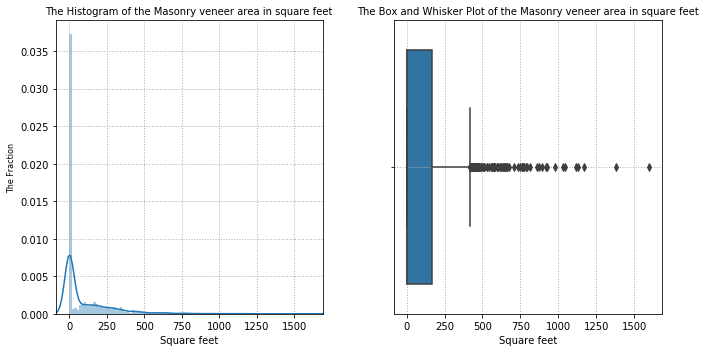

In [97]:
fig=plt.figure(figsize=(10,5))
fig.add_subplot(1,2,1)
sns.distplot(used_data1['MasVnrArea'] ,bins=100)
plt.title('The Histogram of the Masonry veneer area in square feet',fontsize=10)
plt.xlabel('Square feet',fontsize=10)
plt.ylabel('The Fraction',fontsize=8)
plt.grid(which='major',linestyle=':',linewidth=1)
plt.autoscale(enable=True,axis='x',tight=True)
fig.add_subplot(1,2,2)
sns.boxplot(used_data1['MasVnrArea'] )
plt.title('The Box and Whisker Plot of the Masonry veneer area in square feet',fontsize=10)
plt.xlabel('Square feet',fontsize=10)
plt.grid(which='major',linestyle=':',linewidth=1)
plt.tight_layout()

In [98]:
used_data1['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [99]:
used_data1['MasVnrArea'].mean()

103.68526170798899

$$\textbf{Comments:}$$ The proportion of missing data accounts for a negnigible part of 0.55 %. Thus, I use the mean value to fulfill the missing value

In [100]:
used_data[['MasVnrArea']]=used_data[['MasVnrArea']].fillna(used_data1['MasVnrArea'].mean())

In [101]:
amount_missing_MasVnrArea=used_data['MasVnrArea'].isnull().sum()
print(Red + Bold + 'A number of missing value of the MasVnrArea attribute: {}'.format(amount_missing_MasVnrArea) )

A number of missing value of the MasVnrArea attribute: 0


#### Electrical
Electrical system

In [102]:
amount_missing_Electrical=used_data['Electrical'].isnull().sum()
print(Red + Bold + 'A number of missing value of the Electrical attribute: {}'.format(amount_missing_Electrical) )

A number of missing value of the Electrical attribute: 1


In [103]:
100*used_data['Electrical'].isnull().sum()/used_data['Electrical'].isnull().count()

0.0684931506849315

In [104]:
Electrical_counts = used_data.groupby('Electrical').size()
print(Electrical_counts)

Electrical
FuseA      94
FuseF      27
FuseP       3
Mix         1
SBrkr    1334
dtype: int64


$$\textbf{Comments:}$$ Since only one value is missing in Electrical and SBrkr is the most popular type, I use it to fulfill the missing value

In [105]:
used_data[['Electrical']]=used_data[['Electrical']].fillna('SBrkr')
used_data.Electrical.unique() 

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [106]:
#used_data[['Electrical']]= used_data[['Electrical']].replace('NoElectrical', 'SBrkr') 
#used_data.Electrical.unique()

In [107]:
amount_missing_Electrical=used_data['Electrical'].isnull().sum()
print(Red + Bold + 'A number of missing value of the Electrical attribute: {}'.format(amount_missing_Electrical) )

A number of missing value of the Electrical attribute: 0


#### Re-recking the missing data

In [108]:
amount_missing_data_updated=used_data.iloc[:,1:81].isnull().sum().sort_values(ascending=False)
percent_miss_data_updated=(100*used_data.iloc[:,1:81].isnull().sum()/used_data.iloc[:,1:81].isnull().count()).sort_values(ascending=False)
missing_data_updated=pd.concat([amount_missing_data_updated, percent_miss_data_updated],axis=1,keys=['Amount','Percent'])
missing_data_updated.head(10)

Amount    Percent
LotFrontage     259  17.739726
SalePrice         0   0.000000
BsmtQual          0   0.000000
Exterior1st       0   0.000000
Exterior2nd       0   0.000000
MasVnrType        0   0.000000
MasVnrArea        0   0.000000
ExterQual         0   0.000000
ExterCond         0   0.000000
Foundation        0   0.000000

$$\textbf{Comments:}$$ Only the LotFrontage varaible has a proportion of 17.74 % of missing values (259 missing obs)

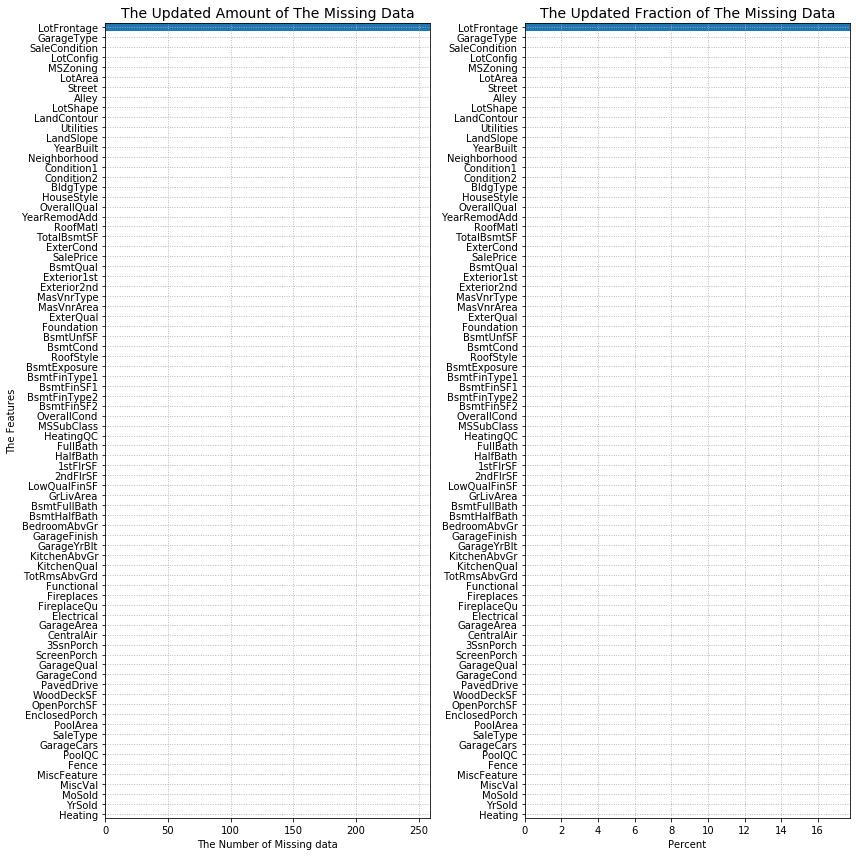

In [109]:
fig=plt.figure(figsize=(12,12))
#fig.suptitle('The Missing Data', fontsize=16)
fig.add_subplot(1,2,1)
plt.barh(missing_data_updated.Amount.sort_values(ascending=True).index,
         missing_data_updated.Amount.sort_values(ascending=True))
plt.autoscale(enable=True, axis='both',tight=True)
plt.title('The Updated Amount of The Missing Data',fontsize=14)
plt.ylabel('The Features',fontsize=10)
plt.xlabel('The Number of Missing data', fontsize=10)
plt.grid(which='major',linestyle=':',linewidth=0.9)
fig.add_subplot(1,2,2)
plt.barh(missing_data_updated.Percent.sort_values(ascending=True).index,
         missing_data_updated.Percent.sort_values(ascending=True))
plt.autoscale(enable=True, axis='both',tight=True)
plt.title('The Updated Fraction of The Missing Data',fontsize=14)
#plt.ylabel('The Features',fontsize=10)
plt.xlabel('Percent', fontsize=10)
plt.grid(which='major',linestyle=':',linewidth=0.9)
plt.tight_layout()
#plt.savefig("Updated_Missing_data.pdf")

$$\textbf{Comments:}$$ It is worth noting that the LotFrontage variable has 259 missing values, which accounts for 17.74%. There are several methods to deal with the missing values. In this case, I remove all these 259 missing values.

I drop all 259 missing values

In [110]:
used_data.dropna(inplace=True)

#dataset.dropna(inplace=True)

In [111]:
used_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [112]:
amount_missing_data_updated=used_data.iloc[:,1:81].isnull().sum().sort_values(ascending=False)
percent_miss_data_updated=(100*used_data.iloc[:,1:81].isnull().sum()/used_data.iloc[:,1:81].isnull().count()).sort_values(ascending=False)
missing_data_updated=pd.concat([amount_missing_data_updated, percent_miss_data_updated],axis=1,keys=['Amount','Percent'])
missing_data_updated.head(10)

Amount  Percent
SalePrice           0      0.0
SaleCondition       0      0.0
RoofMatl            0      0.0
Exterior1st         0      0.0
Exterior2nd         0      0.0
MasVnrType          0      0.0
MasVnrArea          0      0.0
ExterQual           0      0.0
ExterCond           0      0.0
Foundation          0      0.0

In [113]:
used_data.shape

(1201, 81)

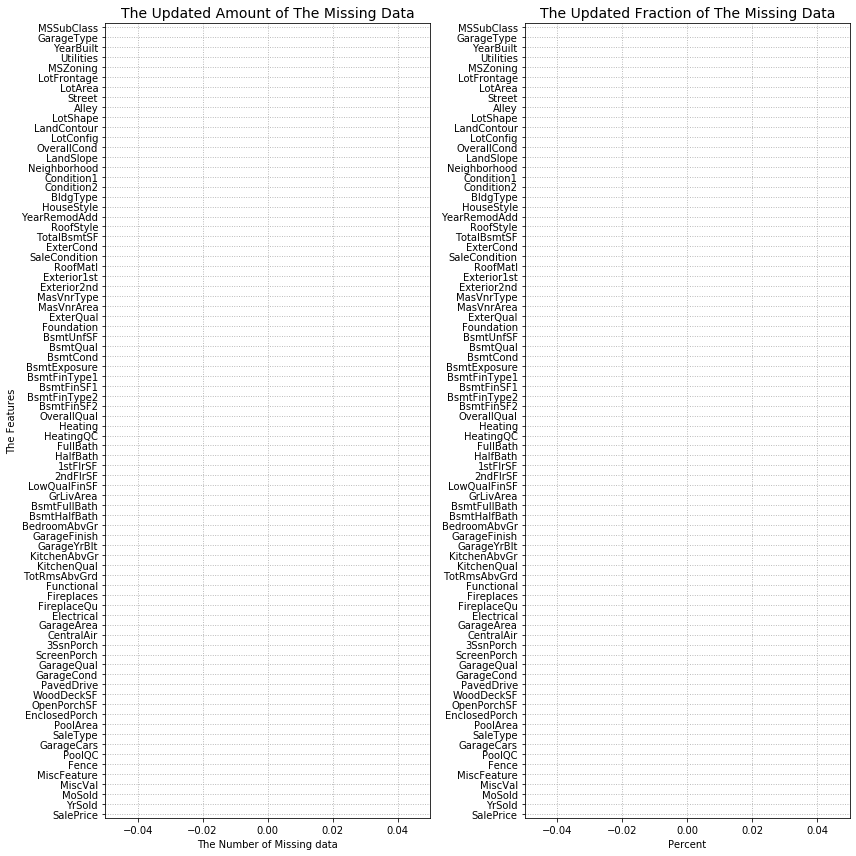

In [114]:
fig=plt.figure(figsize=(12,12))
#fig.suptitle('The Missing Data', fontsize=16)
fig.add_subplot(1,2,1)
plt.barh(missing_data_updated.Amount.sort_values(ascending=True).index,
         missing_data_updated.Amount.sort_values(ascending=True))
plt.autoscale(enable=True, axis='both',tight=True)
plt.title('The Updated Amount of The Missing Data',fontsize=14)
plt.ylabel('The Features',fontsize=10)
plt.xlabel('The Number of Missing data', fontsize=10)
plt.grid(which='major',linestyle=':',linewidth=0.9)
fig.add_subplot(1,2,2)
plt.barh(missing_data_updated.Percent.sort_values(ascending=True).index,
         missing_data_updated.Percent.sort_values(ascending=True))
plt.autoscale(enable=True, axis='both',tight=True)
plt.title('The Updated Fraction of The Missing Data',fontsize=14)
#plt.ylabel('The Features',fontsize=10)
plt.xlabel('Percent', fontsize=10)
plt.grid(which='major',linestyle=':',linewidth=0.9)
plt.tight_layout()
#plt.savefig("Updated_Missing_data.pdf")

$$ \Large \color{red}{\textbf{Done with handling the missing data}}$$


###  Data Type

The type of each attribute is important. Strings may need to be converted to floating point
values or integers to represent categorical or ordinal values. You can get an idea of the types of
attributes by peeking at the raw data, as above. You can also list the data types used by the
DataFrame to characterize each attribute using the dtypes property.

#### Checking the Datatypes


In [115]:
type=used_data.dtypes
print(type)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


$$\textbf{Comments:}$$ It is worth noting that $int64$ stands for the interge values, whereas $float64$ presents the real values. On the other hand $object$ means the categorical values

#### Count and list the different data type in our dataset

In [116]:
print(Bold+ '1.1. A number of numerical attributes with int64: {}'.format(len(used_data.loc[:, used_data.dtypes == np.int64].columns)) +End)
print( 'List of numerical attributes with int64: {}'.format(used_data.loc[:, used_data.dtypes == np.int64].columns) )
print(Bold+ '1.2. A number of numerical attributes with float64: {}'.format(len(used_data.loc[:, used_data.dtypes == np.float64].columns)) +End)
print( 'List of numerical attributes with float64: {}'.format(used_data.loc[:, used_data.dtypes == np.float64].columns) )
print(Bold +' 2. A number of categorical attributes: {}'.format(len(used_data.loc[:, used_data.dtypes == np.object].columns))+End)
print(' List of categorical attributes: {}'.format(used_data.loc[:, used_data.dtypes == np.object].columns))


1.1. A number of numerical attributes with int64: 35
List of numerical attributes with int64: Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
1.2. A number of numerical attributes with float64: 2
List of numerical attributes with float64: Index(['LotFrontage', 'MasVnrArea'], dtype='object')
 2. A number of categorical attributes: 44
 List of categorical attributes: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condi

$$\textbf{Comments:}$$ The dataset has 36 numerical attributes including the target variable 'SalePrice', but excluding variable 'Id'. Thus, it has 35 numerical explanatory variables. Meanwhile, it has 44 categorical explanatory variables. It might imply that the dimensionality reduction is needed before training a specific Machine Learning.

More importantly, seven following numerical variales are not truly numerical ones, but ranked or categorical types:

1. 'MSSubClass': The building class.

2. 'OverallQual': Overall material and finish quality.

3. 'OverallCond': Overall condition rating.

4. 'YearBuilt': Original construction Year.

5. 'YearRemodAdd': Remodel Year.

6. 'MoSold':  Month Sold.

7. 'YrSold': Year Sold.

Let's turn these seven variables into the categorical types.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html

### Handling the Data Types

#### MSSubClass

The building class

In [117]:
used_data['MSSubClass'].dtypes

dtype('int64')

In [118]:
# Checking its properties
print('The Number of Properties of MSSubClass:')
print(np.sort(used_data['MSSubClass'].unique()))

The Number of Properties of MSSubClass:
[ 20  30  40  45  50  60  70  75  80  85  90 120 160 180 190]


In [119]:
used_data = used_data.assign(MSSubClass=used_data['MSSubClass'].astype('object'))#df1['E'])

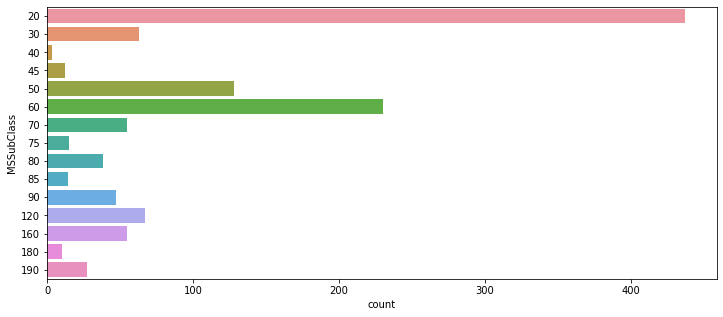

In [120]:
plt.figure(figsize=(12, 5))
sns.countplot(y='MSSubClass',data=used_data,
             orient='h')

In [121]:
# Defining a function to count the number of properties of each categorical feature
def countplt(name):
    plt.figure(figsize=(12,5))
    sns.countplot(y=name,data=used_data,orient='h')
    plt.grid(which='major',color='k', linestyle='-.', linewidth=0.5)#grid()
    return;

#### OverallQual
Overall material and finish quality.

In [122]:
used_data['OverallQual'].dtypes

dtype('int64')

In [123]:
# Checking its properties
print('The Number of Properties of OverallQual:')
print(np.sort(used_data['OverallQual'].unique()))

The Number of Properties of OverallQual:
[ 1  2  3  4  5  6  7  8  9 10]


In [124]:
used_data = used_data.assign(OverallQual=used_data['OverallQual'].astype('object'))

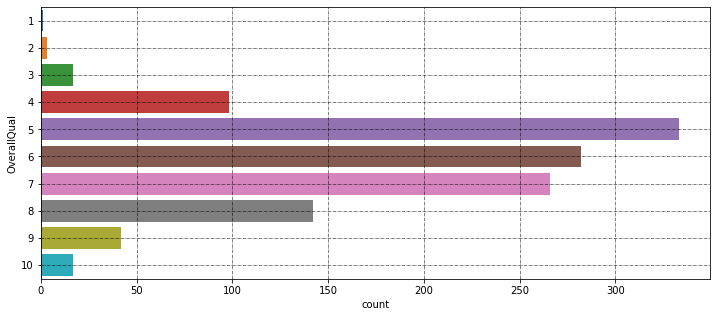

In [125]:
# Calling the countplt function
countplt('OverallQual')

#### OverallCond
Overall condition rating.

In [126]:
used_data['OverallCond'].dtypes

dtype('int64')

In [127]:
# Checking its properties
print('The Number of Properties of OverallCond:')
print(np.sort(used_data['OverallCond'].unique()))

The Number of Properties of OverallCond:
[2 3 4 5 6 7 8 9]


In [128]:
used_data = used_data.assign(OverallCond=used_data['OverallCond'].astype('object'))

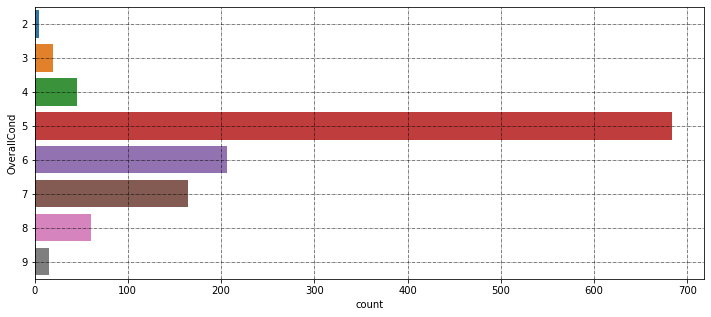

In [129]:
countplt('OverallCond')

#### YearBuilt
Original construction Year.

In [130]:
print('The data type fo YearBuilt:')
print(used_data['YearBuilt'].dtypes)

The data type fo YearBuilt:
int64


In [131]:
# Checking its properties
print('The Number of Properties of YearBuilt:')
print(np.sort(used_data['YearBuilt'].unique()))

The Number of Properties of YearBuilt:
[1872 1875 1880 1882 1885 1890 1892 1893 1898 1900 1904 1905 1906 1908
 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923
 1924 1925 1926 1927 1928 1929 1930 1931 1932 1934 1935 1936 1937 1938
 1939 1940 1941 1942 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954
 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968
 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982
 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996
 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010]


In [132]:
used_data = used_data.assign(YearBuilt=used_data['YearBuilt'].astype('object'))

In [133]:
print('The data type fo YearBuilt:')
print(used_data['YearBuilt'].dtypes)

The data type fo YearBuilt:
object


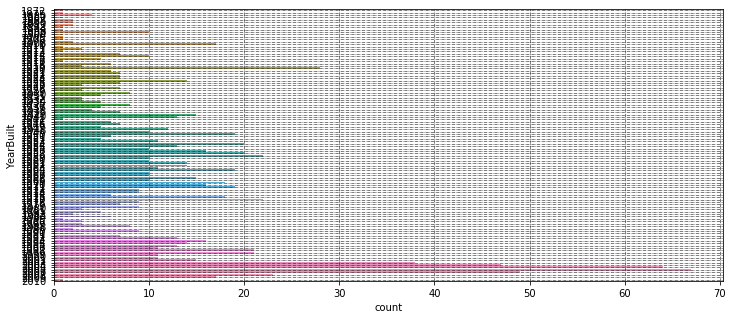

In [134]:
countplt('YearBuilt')

#### YearRemodAdd
Remodel Year.

In [135]:
print('The data type fo YearRemodAdd:{}'.format(used_data['YearRemodAdd'].dtypes))

The data type fo YearRemodAdd:int64


In [136]:
# Checking its properties
print('The Number of Properties of YearRemodAdd:')
print(np.sort(used_data['YearRemodAdd'].unique()))

The Number of Properties of YearRemodAdd:
[1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010]


In [137]:
used_data = used_data.assign(YearRemodAdd=used_data['YearRemodAdd'].astype('object'))

In [138]:
print('The data type fo YearRemodAdd: {}'.format(used_data['YearRemodAdd'].dtypes))

The data type fo YearRemodAdd: object


#### MoSold
Month Sold.



In [139]:
print('The data type fo MoSold:{}'.format(used_data['MoSold'].dtypes))

The data type fo MoSold:int64


In [140]:
# Checking its properties
print('The Number of Properties of MoSold:')
print(np.sort(used_data['MoSold'].unique()))

The Number of Properties of MoSold:
[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [141]:
used_data = used_data.assign(MoSold=used_data['MoSold'].astype('object'))

In [142]:
print('The data type fo MoSold: {}'.format(used_data['MoSold'].dtypes))

The data type fo MoSold: object


#### YrSold
Year Sold.

In [143]:
print('The data type fo YrSold: {}'.format(used_data['YrSold'].dtypes))

The data type fo YrSold: int64


In [144]:
# Checking its properties
print('The Number of Properties of YrSold:')
print(np.sort(used_data['YrSold'].unique()))

The Number of Properties of YrSold:
[2006 2007 2008 2009 2010]


In [145]:
used_data = used_data.assign(YrSold=used_data['YrSold'].astype('object'))

In [146]:
print('The data type fo YrSold: {}'.format(used_data['YrSold'].dtypes))

The data type fo YrSold: object


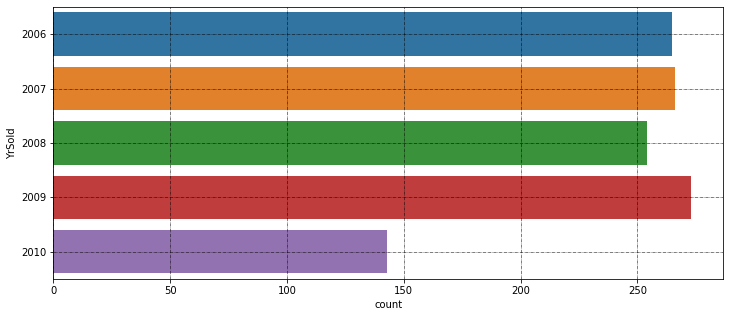

In [147]:
countplt('YrSold')

$$\large \color{blue}{\textbf{Re-count and re-list the different data type in our dataset}}$$

In [148]:
print(Bold+ '1.1. A number of numerical attributes with integer Values: {}'.format(len(used_data.loc[:, used_data.dtypes == np.int64].columns)) +End)
print( 'List of numerical attributes with int64: {}'.format(used_data.loc[:, used_data.dtypes == np.int64].columns) )
print(Bold+ '1.2. A number of numerical attributes with real values: {}'.format(len(used_data.loc[:, used_data.dtypes == np.float64].columns)) +End)
print( 'List of numerical attributes with float64: {}'.format(used_data.loc[:, used_data.dtypes == np.float64].columns) )
print(Bold +' 2. A number of categorical attributes: {}'.format(len(used_data.loc[:, used_data.dtypes == np.object].columns))+End)
print(' List of categorical attributes: {}'.format(used_data.loc[:, used_data.dtypes == np.object].columns))


1.1. A number of numerical attributes with integer Values: 28
List of numerical attributes with int64: Index(['Id', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice'],
      dtype='object')
1.2. A number of numerical attributes with real values: 2
List of numerical attributes with float64: Index(['LotFrontage', 'MasVnrArea'], dtype='object')
 2. A number of categorical attributes: 51
 List of categorical attributes: Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'Ov

$$\textbf{Comments:}$$ So the dataset now has

- 29 numerical attribute including one target feature and 28 numerical explanatory variales.

- 51 categorical explanatory variables. 

Thus, we should create the dummy varibles for these 51 categorical explanatory attributes as follows. 

### Creating Dummy Variables

Tranforming all 51 catogorical explanatory variables into the dummy ones

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

In [149]:
used_data.shape

(1201, 81)

In [150]:
used_data_transdum=pd.get_dummies(used_data)
used_data_transdum.shape

(1201, 610)

In [151]:
used_data_transdum.dtypes

Id                         int64
LotFrontage              float64
LotArea                    int64
MasVnrArea               float64
BsmtFinSF1                 int64
                          ...   
SaleCondition_AdjLand      uint8
SaleCondition_Alloca       uint8
SaleCondition_Family       uint8
SaleCondition_Normal       uint8
SaleCondition_Partial      uint8
Length: 610, dtype: object

In [152]:
print(Bold + '1. No. Attributes with the integer value: {}'.format(len(used_data_transdum.loc[:,used_data_transdum.dtypes==np.int64].columns)) + End)
print('List of Atributes with the real value:')
print(used_data_transdum.loc[:,used_data_transdum.dtypes==np.int64].columns)

print(Bold + '2. No. Attributes with the real value: {}'.format(len(used_data_transdum.loc[:,used_data_transdum.dtypes==np.float64].columns))+ End)
print('List of Attributes with the integer value:')
print(used_data_transdum.loc[:,used_data_transdum.dtypes==np.float64].columns)


print(Bold +'3. No. Attributes with the unit-integer value: {}'.format(len(used_data_transdum.loc[:,used_data_transdum.dtypes==np.uint8].columns))+ End)
print('List of Attributes with the unit-integer value:')
print(used_data_transdum.loc[:,used_data_transdum.dtypes==np.uint8].columns)

1. No. Attributes with the integer value: 28
List of Atributes with the real value:
Index(['Id', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice'],
      dtype='object')
2. No. Attributes with the real value: 2
List of Attributes with the integer value:
Index(['LotFrontage', 'MasVnrArea'], dtype='object')
3. No. Attributes with the unit-integer value: 580
List of Attributes with the unit-integer value:
Index(['MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45',
       'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75',
       'MSSubClass_80', 'MSSubClass_85',
       ...
       'SaleType_ConLw', 'SaleT

$$\textbf{Comments:}$$

- 29 numerical variables: one target feature and 28 explanatory variables.

- 580 binary variables


### Descriptive Statistics

Descriptive statistics can give you great insight into the shape of each attribute. Often you can
create more summaries than you have time to review. The describe() function on the Pandas
DataFrame lists 8 statistical properties of each attribute. They are:

- Count.

- Mean.

- Standard Deviation.

- Minimum Value.

- 25th Percentile.

- 50th Percentile (Median).

- 75th Percentile.

- Maximum Value.

It is worht noting that this function can work on the numerical attributes only.

#### Twenty Eight Integer-valued Attributes

In [153]:
used_data_transdum.loc[:,used_data_transdum.dtypes==np.int64].describe() # Specifying iloc[:,1:81] since we do not count for the ID attribute

Id        LotArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count  1201.000000    1201.000000  1201.000000  1201.000000  1201.000000   
mean    727.037469    9951.698585   427.063281    42.975853   589.345545   
std     421.038976    7924.353975   464.589556   154.493463   448.699065   
min       1.000000    1300.000000     0.000000     0.000000     0.000000   
25%     366.000000    7420.000000     0.000000     0.000000   245.000000   
50%     724.000000    9262.000000   352.000000     0.000000   506.000000   
75%    1092.000000   11249.000000   690.000000     0.000000   833.000000   
max    1460.000000  215245.000000  5644.000000  1474.000000  2336.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  ...  \
count  1201.000000  1201.000000  1201.000000   1201.000000  1201.000000  ...   
mean   1059.384679  1158.437968   346.073272      6.621149  1511.132390  ...   
std     448.307125   386.257235   435.143451     51.356602   529.928171  ...   
min       0.000000   334.000000     0.000000      0.000000   334.000000  ...   
25%     784.000000   876.000000     0.000000      0.000000  1134.000000  ...   
50%     990.000000  1082.000000     0.000000      0.000000  1456.000000  ...   
75%    1309.000000  1383.000000   728.000000      0.000000  1768.000000  ...   
max    6110.000000  4692.000000  2065.000000    572.000000  5642.000000  ...   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1201.000000  1201.000000  1201.000000  1201.000000    1201.000000   
mean      1.764363   472.444629    89.288926    45.954205      22.731057   
std       0.777986   221.173202   120.383224    66.078038      61.659820   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   309.000000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    24.000000       0.000000   
75%       2.000000   578.000000   168.000000    66.000000       0.000000   
max       4.000000  1418.000000   857.000000   547.000000     552.000000   

         3SsnPorch  ScreenPorch     PoolArea      MiscVal      SalePrice  
count  1201.000000  1201.000000  1201.000000  1201.000000    1201.000000  
mean      3.125729    15.028310     2.739384    25.490425  180770.480433  
std      28.775134    55.986122    38.865124   189.782665   83389.519866  
min       0.000000     0.000000     0.000000     0.000000   34900.000000  
25%       0.000000     0.000000     0.000000     0.000000  127500.000000  
50%       0.000000     0.000000     0.000000     0.000000  159500.000000  
75%       0.000000     0.000000     0.000000     0.000000  213500.000000  
max     508.000000   480.000000   648.000000  3500.000000  755000.000000  

[8 rows x 28 columns]

#### The Dependent Variable

In [154]:
used_data['SalePrice'] .describe()

count      1201.000000
mean     180770.480433
std       83389.519866
min       34900.000000
25%      127500.000000
50%      159500.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

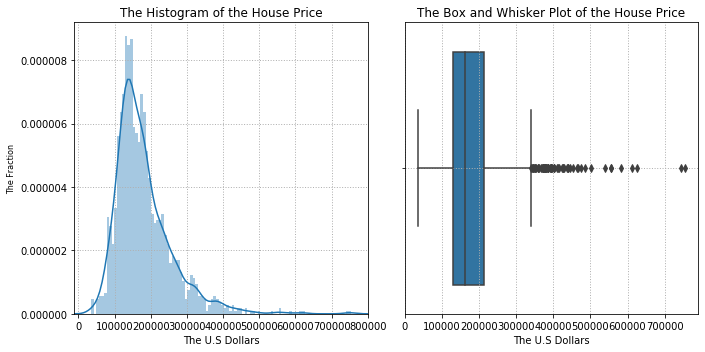

In [155]:
fig=plt.figure(figsize=(10,5))
fig.add_subplot(1,2,1)
sns.distplot(used_data1['SalePrice'] ,bins=100)
plt.title('The Histogram of the House Price',fontsize=12)
plt.xlabel('The U.S Dollars',fontsize=10)
plt.ylabel('The Fraction',fontsize=8)
plt.grid(which='major',linestyle=':',linewidth=1)
plt.autoscale(enable=True,axis='x',tight=True)
fig.add_subplot(1,2,2)
sns.boxplot(used_data1['SalePrice'] )
plt.title('The Box and Whisker Plot of the House Price',fontsize=12)
plt.xlabel('The U.S Dollars',fontsize=10)
plt.grid(which='major',linestyle=':',linewidth=1)
plt.tight_layout()

In [156]:
used_data1['YrSold'] .describe()

count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64

$$\textbf{Comments:}$$ Over the period of 2006 - 2010, 1201 Houses in Boston were sold at the average price of around 180,770 USD per House. On the other hand, the density of the price has (positive) right skew. Moreover, there are many extremely high prices because of many outliers. Thus, I argue that the House price in Boston was very expensive.

#### Two Real Explanatory Variables

In [157]:
used_data_transdum.loc[:,used_data_transdum.dtypes==np.float64].describe() 

LotFrontage   MasVnrArea
count  1201.000000  1201.000000
mean     70.049958   102.708669
std      24.284752   184.940375
min      21.000000     0.000000
25%      59.000000     0.000000
50%      69.000000     0.000000
75%      80.000000   160.000000
max     313.000000  1600.000000

#### The Remaining Catogorical Attributes

On classification problems you need to know how balanced the class values are. Highly imbalanced
problems (a lot more observations for one class than another) are common and may need special
handling in the data preparation stage of your project. You can quickly get an idea of the
distribution of the class attribute in Pandas.



In [158]:
used_data_transdum.loc[:,used_data_transdum.dtypes==np.uint8].columns

Index(['MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45',
       'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75',
       'MSSubClass_80', 'MSSubClass_85',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=580)

In [159]:
print(Bold +'No. Categorical Attributes:  {}'.format(len(used_data.loc[:,used_data.dtypes==np.object].columns)))
print('List of Categorical Attributes:' +End)
print(used_data.loc[:,used_data.dtypes==np.object].columns)

No. Categorical Attributes:  51
List of Categorical Attributes:
Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')


In [160]:
used_data.groupby(['MSSubClass']).size()

MSSubClass
20     437
30      63
40       3
45      12
50     128
60     230
70      55
75      15
80      38
85      14
90      47
120     67
160     55
180     10
190     27
dtype: int64

In [161]:
print(Red+ '-------------------------'+End)
for i,col in enumerate(used_data.loc[:,used_data.dtypes==np.object].columns):
    print(Blue+'Categorical Variable: {}'.format(i)+End)
    print(Red+ '-------------------------'+End)
    print(used_data.groupby([col]).size())
    print(Red+ '-------------------------'+End)

-------------------------
Categorical Variable: 0
-------------------------
MSSubClass
20     437
30      63
40       3
45      12
50     128
60     230
70      55
75      15
80      38
85      14
90      47
120     67
160     55
180     10
190     27
dtype: int64
-------------------------
Categorical Variable: 1
-------------------------
MSZoning
C (all)     10
FV          57
RH          13
RL         922
RM         199
dtype: int64
-------------------------
Categorical Variable: 2
-------------------------
Street
Grvl       5
Pave    1196
dtype: int64
-------------------------
Categorical Variable: 3
-------------------------
Alley
Grvl         47
NoAlley    1115
Pave         39
dtype: int64
-------------------------
Categorical Variable: 4
-------------------------
LotShape
IR1    317
IR2     26
IR3      7
Reg    851
dtype: int64
-------------------------
Categorical Variable: 5
-------------------------
LandContour
Bnk      56
HLS      46
Low      17
Lvl    1082
dtype: int64
------

$$\textbf{Comments:}$$ Please re-check the procedure of transforming the seven numerical variables into categorical ones above.

### Skew of Univariate Distributions

Skew refers to a distribution that is assumed Gaussian (normal or bell curve) that is shifted or
squashed in one direction or another. Many machine learning algorithms assume a Gaussian
distribution. Knowing that an attribute has a skew may allow you to perform data preparation
to correct the skew and later improve the accuracy of your models. You can calculate the skew
of each attribute using the skew() function on the Pandas DataFrame.

The skew result show a positive (right) or negative (left) skew. Values closer to zero show
less skew.

In [162]:
print(Bold +'The Skew of numerical variables:'+End)
print(used_data_transdum.loc[:,used_data_transdum.dtypes==np.int64].skew()) 
print(used_data_transdum.loc[:,used_data_transdum.dtypes==np.float64].skew())

The Skew of numerical variables:
Id                0.014250
LotArea          15.779613
BsmtFinSF1        1.920204
BsmtFinSF2        4.464929
BsmtUnfSF         0.865042
TotalBsmtSF       1.628119
1stFlrSF          1.339243
2ndFlrSF          0.835179
LowQualFinSF      8.377934
GrLivArea         1.488230
BsmtFullBath      0.686315
BsmtHalfBath      4.333529
FullBath          0.076663
HalfBath          0.740119
BedroomAbvGr      0.329204
KitchenAbvGr      4.243988
TotRmsAbvGrd      0.717960
Fireplaces        0.715318
GarageCars       -0.308172
GarageArea        0.136863
WoodDeckSF        1.586677
OpenPorchSF       2.505402
EnclosedPorch     3.050430
3SsnPorch        11.243509
ScreenPorch       4.183594
PoolArea         14.273409
MiscVal          11.146012
SalePrice         1.896963
dtype: float64
LotFrontage    2.163569
MasVnrArea     2.801397
dtype: float64


$$\textbf{Comments:}$$ exception for the $GarageCars$ attribute, most of 29 numerical variables including a target value has a right (positive) skew. 

$$\textbf{Suggestions} $$
$$\textbf{General Idea about 29 numerical attributes including a target value} $$

1. Normalizing them to reduce the effects of differing scales.

2. Standardizing them to reduce the effects of differing distributions.

## Visualization


understand your data in order to get the best results from machine learning algorithms.
The fastest way to learn more about your data is to use data visualization

### Unimodal Data Visualizations
In this section I will look at three techniques used to understand each attribute ofthe dataset independently.

- Histograms.

- Density Plots.

- Box and Whisker Plots.

####  Histograms
A fast way to get an idea of the distribution of each attribute is to look at histograms. Histograms
group data into bins and provide you a count of the number of observations in each bin. From
the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian, skewed
or even has an exponential distribution. It can also help you see possible outliers.

##### Twenty Nine numerical variables

In which 28 numerical explanatory variales and one dependent one as the Sale Price.

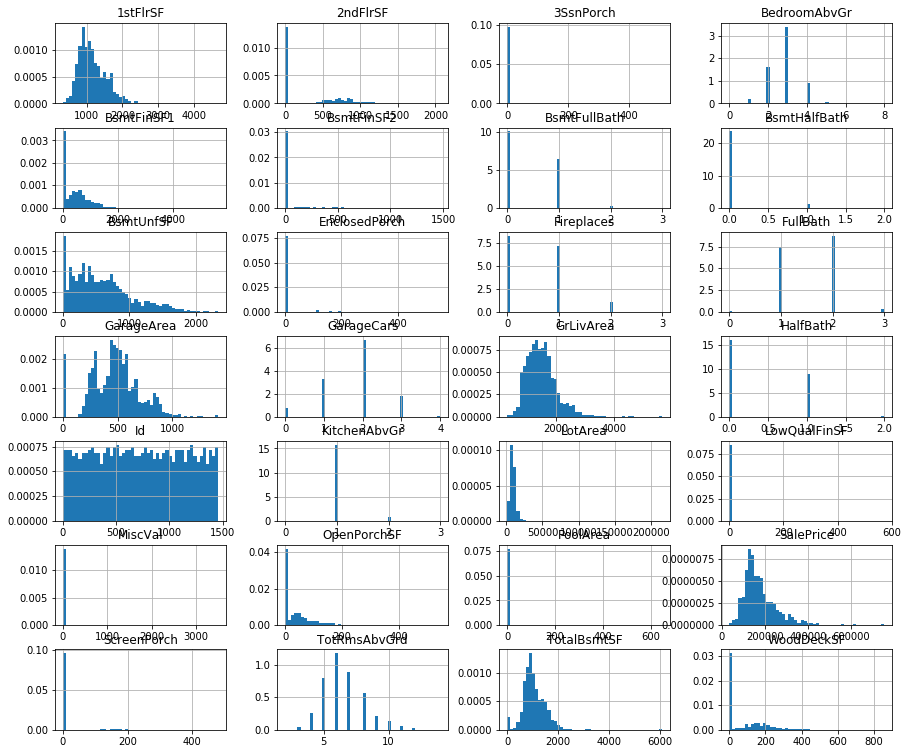

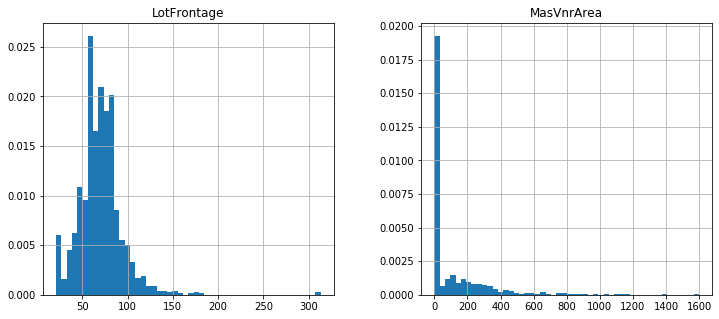

In [163]:
from matplotlib import pyplot
#used_data.iloc[:,1:80].plot(kind='hist', subplots=True, layout=(9,4),figsize=(17,13),bins=500, sharex=False)# should not be used
#used_data.iloc[:,1:80].hist(bins=50,figsize=(15,13),density=True,grid=True)
used_data_transdum.loc[:,used_data_transdum.dtypes==np.int64].hist(bins=50,figsize=(15,13),
                                                                   density=True,grid=True,
                                                                  layout=(7,4))
used_data_transdum.loc[:,used_data_transdum.dtypes==np.float64].hist(bins=50,figsize=(12,5),
                                                                     density=True,grid=True,
                                                                     layout=(1,2))
pyplot.show()

$$\textbf{Comments:}$$ One should not worry about the $Id$ attribute. On the other hand, it looks like relatively unclear to see which distribution of each numerical attribute. Let's make it clearer as follows.

##### Categorical variables

In [164]:
print(Bold +'No. Categorical Variables: {}'.format(len(used_data.loc[:,used_data.dtypes==np.object].columns)))

No. Categorical Variables: 51


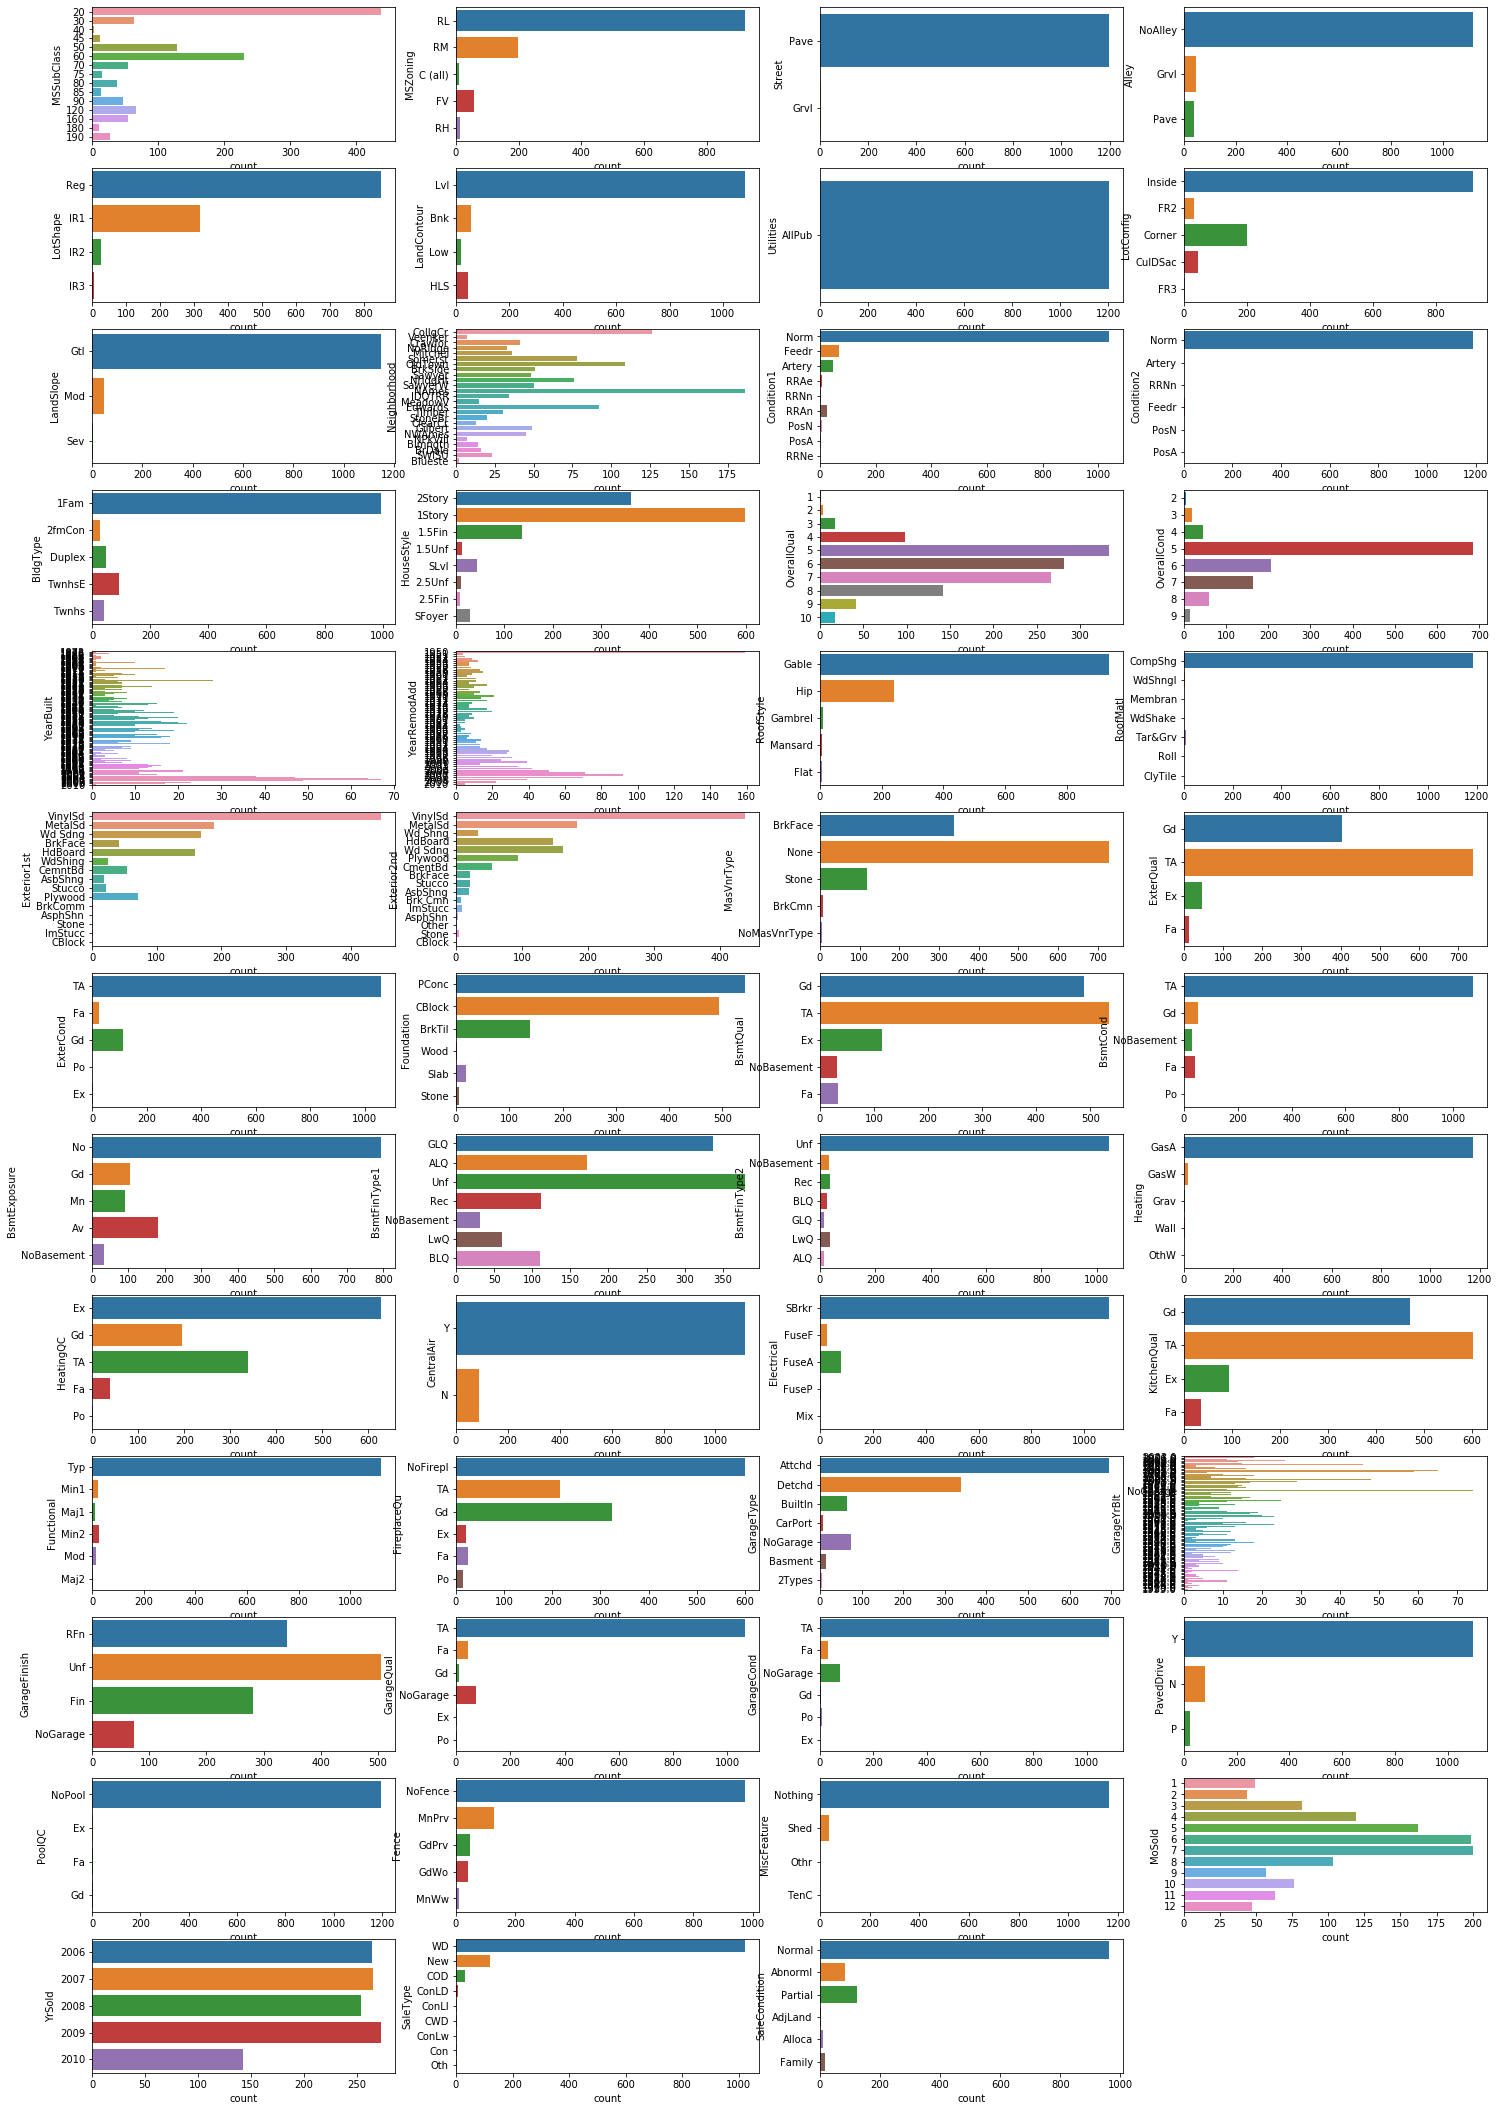

In [165]:
plt.figure(figsize=(25, 38))
for i, colum in enumerate(used_data.loc[:,used_data.dtypes==np.object].columns):
    plt.subplot(13,4,i+1)
    sns.countplot(y=colum, data=used_data.loc[:,used_data.dtypes==np.object],orient='h')#, color='green');

$$\textbf{Comments:}$$ It seems that the no. classes in each categorical variable are not reasonably balanced 

#### Density Plots
Density plots are another way of getting a quick idea of the distribution of each attribute. The
plots look like an abstracted histogram with a smooth curve drawn through the top of each bin,
much like your eye tried to do with the histograms.

https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html


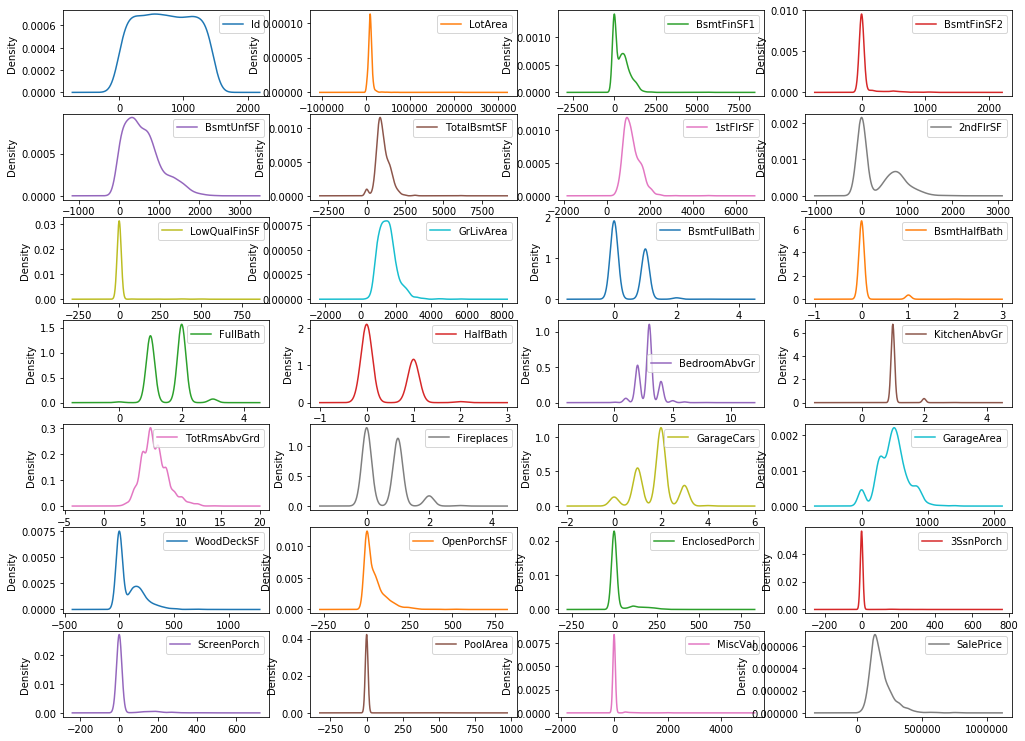

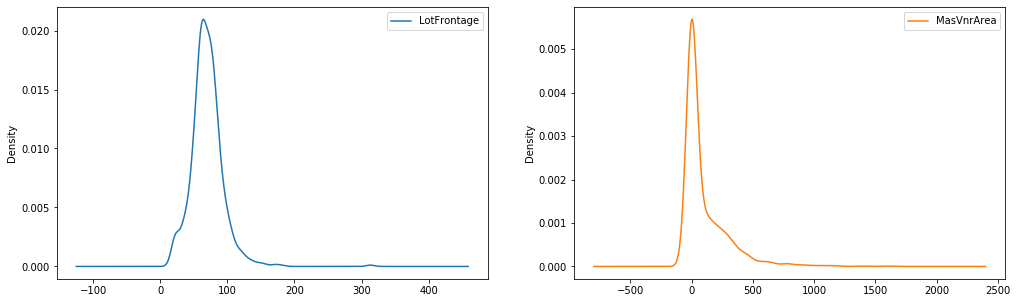

In [166]:
#used_data.iloc[:,1:80].plot(kind='density', subplots=True, layout=(9,4),figsize=(17,13), sharex=False)
#pyplot.show()

used_data_transdum.loc[:,used_data_transdum.dtypes==np.int64].plot(kind='density', subplots=True,
                                                                   layout=(7,4),figsize=(17,13),
                                                                   sharex=False)
used_data_transdum.loc[:,used_data_transdum.dtypes==np.float64].plot(kind='density', subplots=True,
                                                                   layout=(1,2),figsize=(17,5),
                                                                   sharex=False)                                                                   
pyplot.show()



$$\textbf{Comments:}$$ Hey! the distribution for each attribute is clearer than the histograms. On the other hand,
This is worth noting that many machine learning
techniques assume a Gaussian univariate distribution on the input variables. Thus, looking at the distributions of each attributes is interresting.

The 11 following attributes may have an $\textbf{exponential
distribution}$. 

1. BsmtFinSF1: Type 1 finished square feet

2. BsmtFinSF2: Type 2 finished square feet 

3. BsmtUnfSF: Unfinished square feet of basement area

4. EnclosedPorch: Enclosed porch area in square feet

5. GarageYrBlt: Year garage was built

6. LotArea: Lot size in square feet

7. MSSubClass: The building class

8. MasVnrArea: Masonry veneer area in square feet

9. OpenPorchSF: Open porch area in square feet

10. WoodDeckSF: Wood deck area in square feet

11. YearBuilt: Year built

The 14 following atributes may have $\textbf{unknown distribution}$ or $\textbf{irregular distribution}$:

1. BsmtFullBath: Basement full bathrooms

2. BsmtHalfBath: Basement half bathrooms

3. Fireplaces: Number of fireplaces

4. FullBath: Full bathrooms above grade

5. GarageCars: Size of garage in car capacity

6. HalfBath: Half baths above grade

7. KitchenAbvGr

8. LowQualFinSF: Low quality finished square feet (all floors)

9. MiscVal: $Value of miscellaneous feature

10. MoSold: Month Sold

11. PoolArea: Pool area in square feet

12. ScreenPorch: Screen porch area in square feet

13. YearRemodAdd

14. YrSold: Year Sold

The 7 following atributes have a $\textbf{nearly normal distribution}$

1. GarageArea: Size of garage in square feet

2. GrLivArea: Above grade (ground) living area square feet

3. LotFrontage: Linear feet of street connected to property

4. OverallCond: Overall condition rating

5. OverallQual: Overall material and finish quality

6. TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

7. TotalBsmtSF

$\textbf{Suggestion:}$ The difference in the distribution of 28 numerical explanatory variables suggests that one should standardize them before training a specific Machine Learning

#### Box and Whisker Plots
Another useful way to review the distribution of each attribute is to use Box and Whisker Plots
or boxplots for short. Boxplots summarize the distribution of each attribute, drawing a line for
the median (middle value) and a box around the 25th and 75th percentiles (the middle 50% of
the data). The whiskers give an idea of the spread of the data and dots outside of the whiskers
show candidate outlier values (values that are 1.5 times greater than the size of spread of the
middle 50% of the data).

https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html


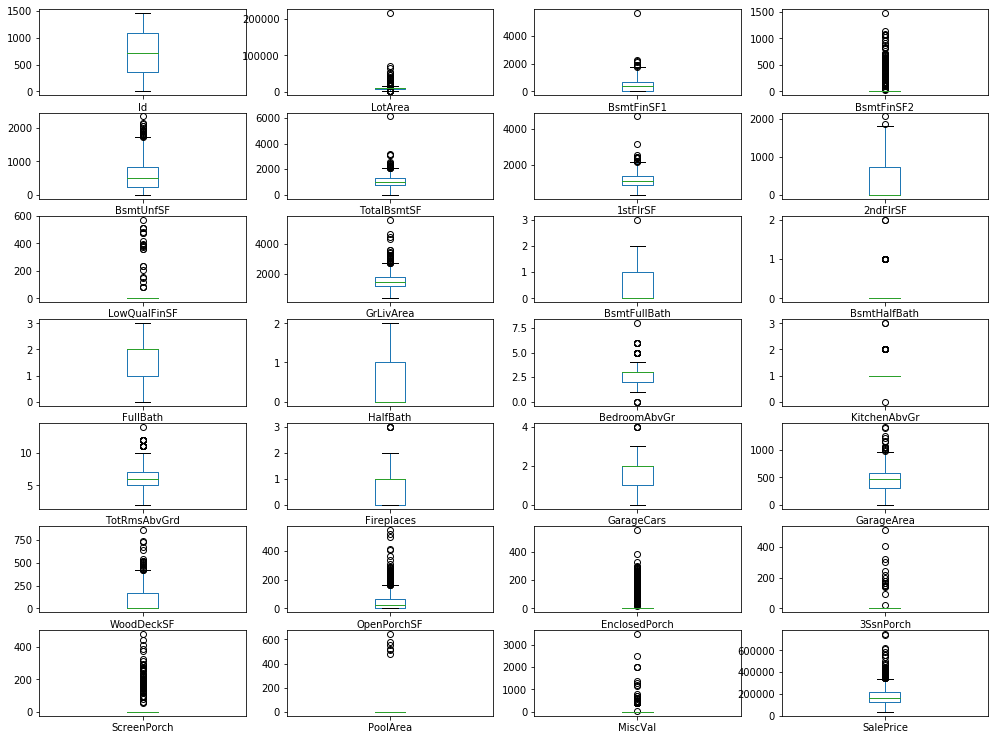

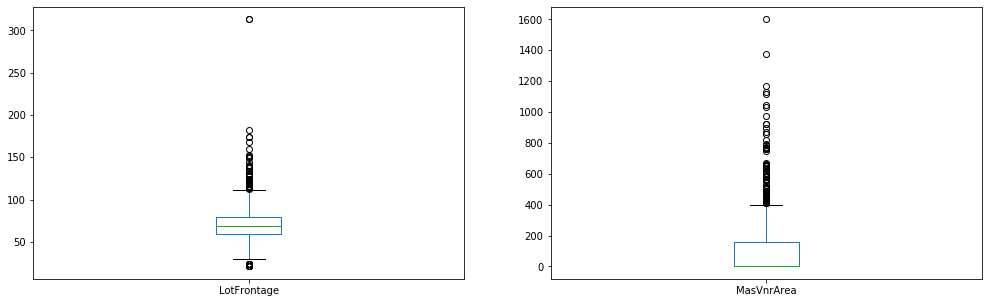

In [167]:
used_data_transdum.loc[:,used_data_transdum.dtypes==np.int64].plot(kind='box', subplots=True,
                                                                   layout=(7,4),figsize=(17,13),
                                                                   sharex=False)
used_data_transdum.loc[:,used_data_transdum.dtypes==np.float64].plot(kind='box', subplots=True,
                                                                   layout=(1,2),figsize=(17,5),
                                                                   sharex=False)   

#used_data.iloc[:,1:80].plot(kind='box', subplots=True, layout=(9,4),figsize=(17,13),
#                            sharex=False)# title='The Box and Whisker Plots of the numerical attributes ')
pyplot.show()

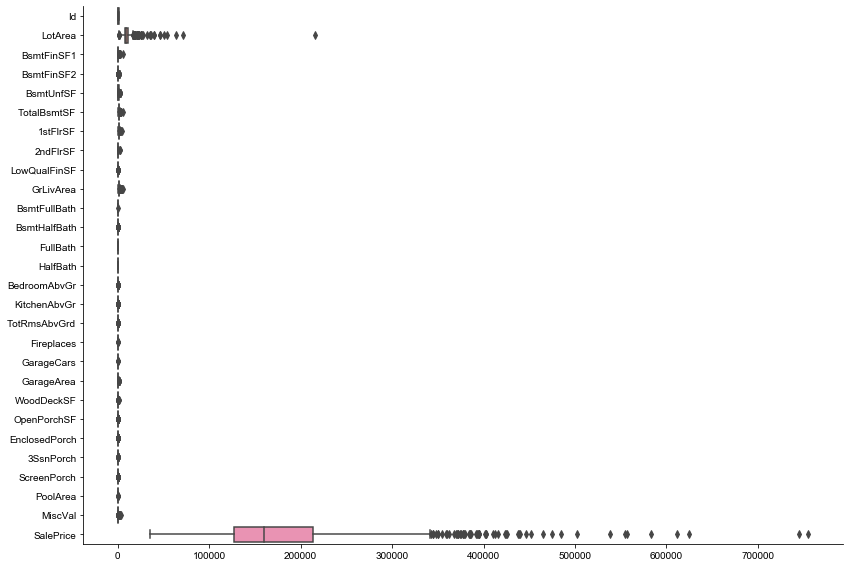

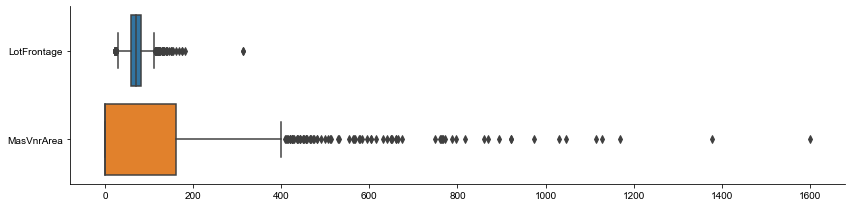

In [168]:
#sns.catplot(data=features.iloc[:, 2:34], orient="h",
 #           height=8, aspect=1.5, kind="box");
sns.catplot(data=used_data_transdum.loc[:,used_data_transdum.dtypes==np.int64], orient="h",
            height=8, aspect=1.5, kind="box");
sns.catplot(data=used_data_transdum.loc[:,used_data_transdum.dtypes==np.float64], orient="h",
            height=3, aspect=4, kind="box");
sns.set(font_scale=1)

$$\textbf{Comments:}$$ The spread or variance of attributes is very different and each attribute has many outliers.

$$\textbf{Suggestion:}$$ One should standardize 28 numerical explanatory variables before training a specific Machine Learning model.

#### Viluanization of the linear relation 
between numerical explanationary variable with the target value

In [169]:
features=used_data.loc[:,used_data.dtypes==np.int64]
print(features.shape)
print(features.columns)#head()
print(features.dtypes)

(1201, 28)
Index(['Id', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice'],
      dtype='object')
Id               int64
LotArea          int64
BsmtFinSF1       int64
BsmtFinSF2       int64
BsmtUnfSF        int64
TotalBsmtSF      int64
1stFlrSF         int64
2ndFlrSF         int64
LowQualFinSF     int64
GrLivArea        int64
BsmtFullBath     int64
BsmtHalfBath     int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
TotRmsAbvGrd     int64
Fireplaces       int64
GarageCars       int64
GarageArea       int64
WoodDeckSF       int64
OpenPorchSF      int64
EnclosedPorch    int64
3SsnPorch    

In [170]:
num_features=features.drop(['Id', 'SalePrice'],axis=1)

In [171]:
num_features.shape

(1201, 26)

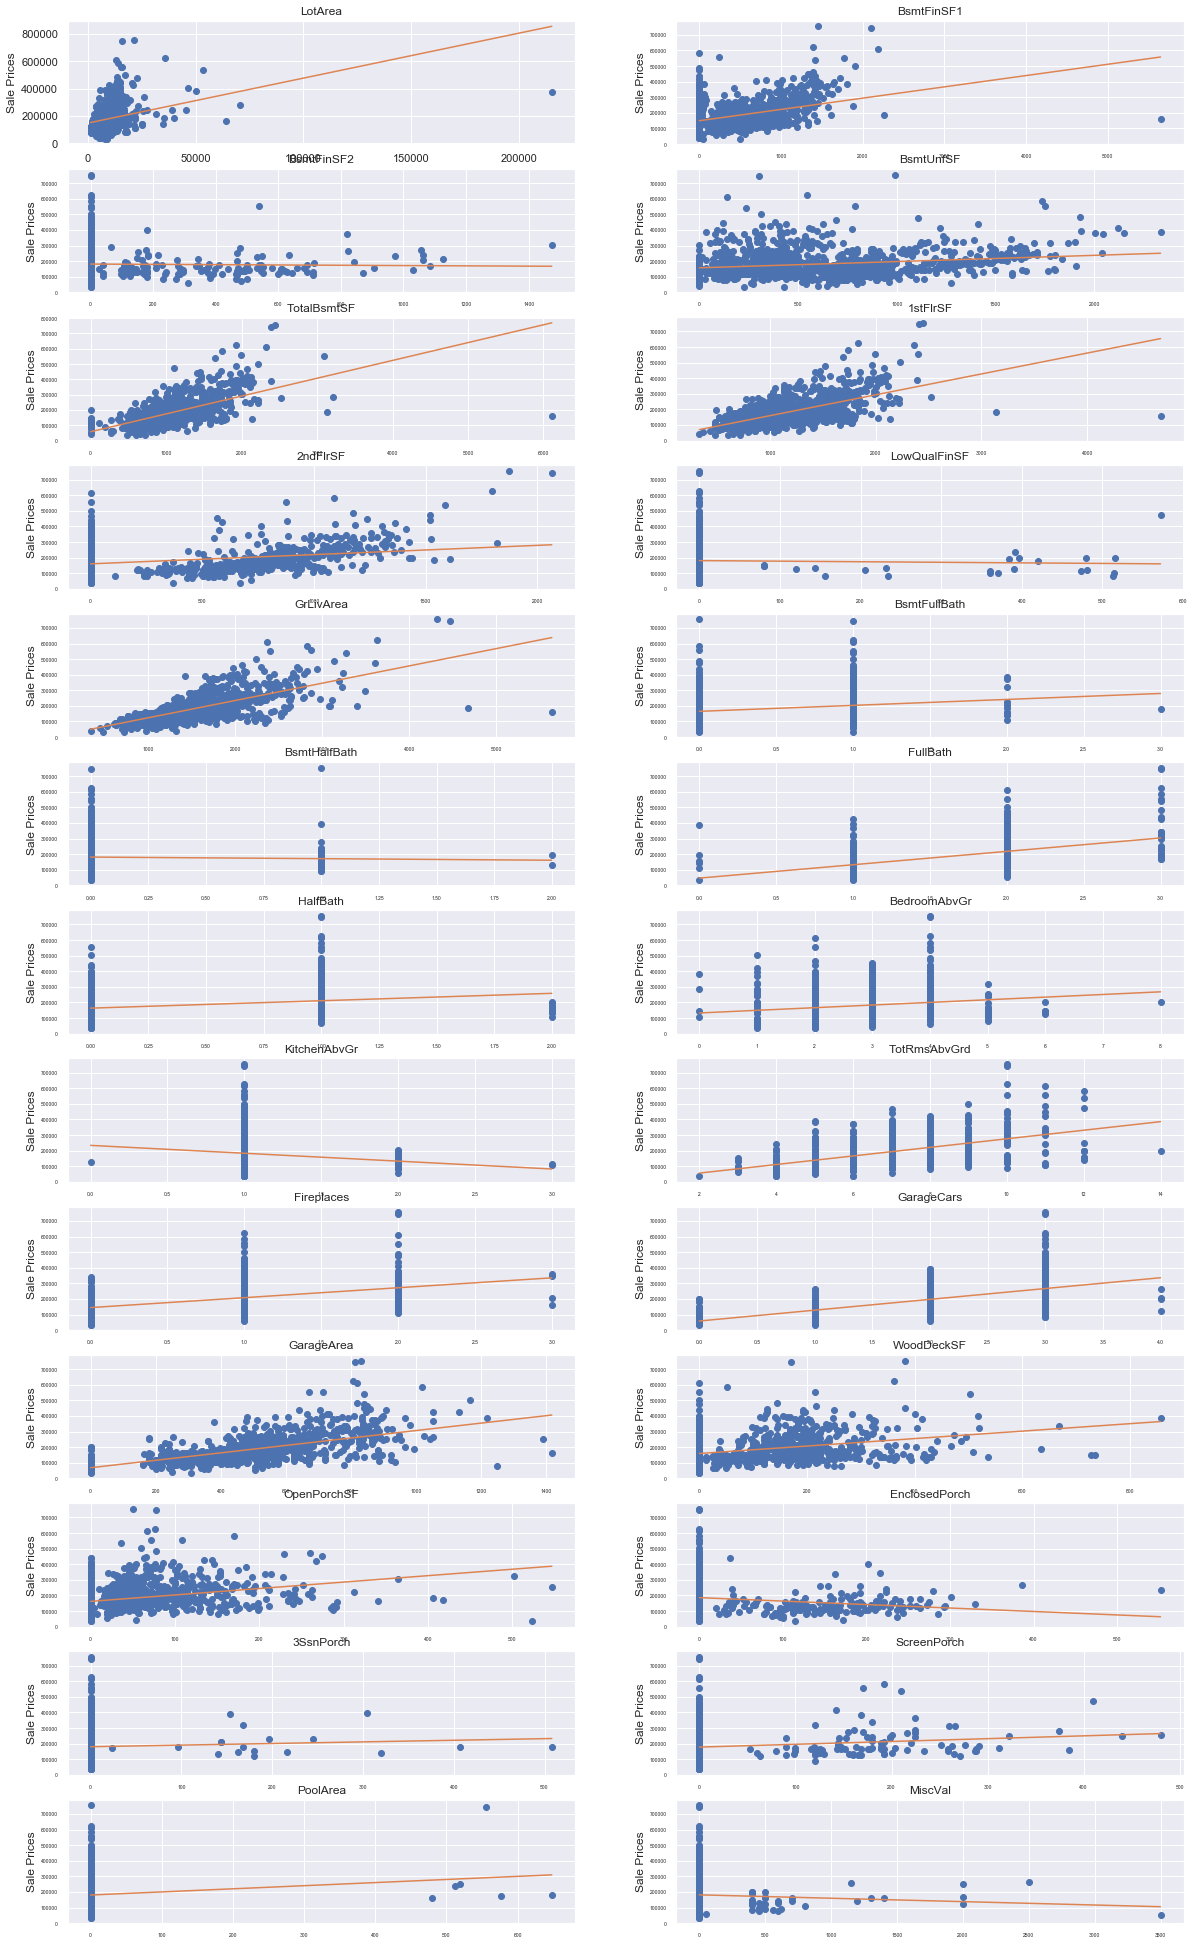

In [172]:
#num_features.shape

prices = used_data['SalePrice']
import matplotlib 
plt.figure(figsize=(20, 35))
# i: index
for i, col in enumerate(num_features.columns):
    #print(i,col)

    # 3 plots here hence 1, 3
    plt.subplot(13,2, i+1)
    x = num_features[col]
    y = prices
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    #plt.xlabel(col)
    plt.ylabel('Sale Prices')
    matplotlib.rc('xtick', labelsize=5) 
    matplotlib.rc('ytick', labelsize=5) 

$\textbf{Comments:}$ Many numerical explanatory variables have a positive correlation with SalePrice. They are listed below.

1. LotArea: Lot size in square feet.

2. OverallQual: Overall material and finish quality.

3. YearBuilt: Original construction date.

4. YearRemodAdd: Remodel date.

5. BsmtFinSF1: Type 1 finished square feet.

6. BsmtUnfSF: Unfinished square feet of basement area

7. TotalBsmtSF: Total square feet of basement area.

8. 1stFlrSF: First Floor square feet.

9. 2ndFlrSF: Second floor square feet.

10. GrLivArea: Above grade (ground) living area square feet.

...

It implies that an increase in these explanatory variables tends to cause a rise in the Sale Price of a House in Boston.

On the other hand, several variables have a negative correlation with the Sale Price such as

1. OverallCond: Overall condition rating.

2. LowQualFinSF: Low quality finished square feet (all floors).

3. KitchenAbvGr:

4. EnclosedPorch: Enclosed porch area in square feet

......

It means that a fall in these explanatory variables tends to increase the Sale Price of a House in Boston.

Meanwhile, some explanatory variables have no correlation with the Sale Price such as

1. BsmtFinSF2: Type 2 finished square feet.

2. BsmtHalfBath: Basement half bathrooms


It implies that a change in these explanatory variable does not influence the Sale Price of a House in Boston. So shall we exclude these numerical explanatory variables before training a ML model?

##  Multimodal Data Visualizations
This section provides examples of two plots that show the interactions between multiple variables
in your dataset.

-  Correlation Matrix Plot

-  Scatter Plot Matrix

### Correlation Matrix Plot
Correlation gives an indication of how related the changes are between two variables. If two
variables change in the same direction they are positively correlated. If they change in opposite
directions together (one goes up, one goes down), then they are negatively correlated. You can
calculate the correlation between each pair of attributes. This is called a correlation matrix. You
can then plot the correlation matrix and get an idea of which variables have a high correlation with each other. This is useful to know, because some machine learning algorithms like linear
and logistic regression can have poor performance if there are highly correlated input variables
in the data.

#### All Attributes


In [173]:
# Using the following codes, we compute correlations of all attributes 
import time
start_time = time.time()
correlations = used_data_transdum.iloc[:,1:614].corr() # 613 Attributes excluding the Id one
print("--- %s seconds ---" % (time.time() - start_time))
correlations.head(10)


print(used_data_transdum.shape)
used_data_transdum.iloc[:,0:614].columns

--- 0.9802308082580566 seconds ---
(1201, 610)


Index(['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=610)

--- 5.705985069274902 seconds ---


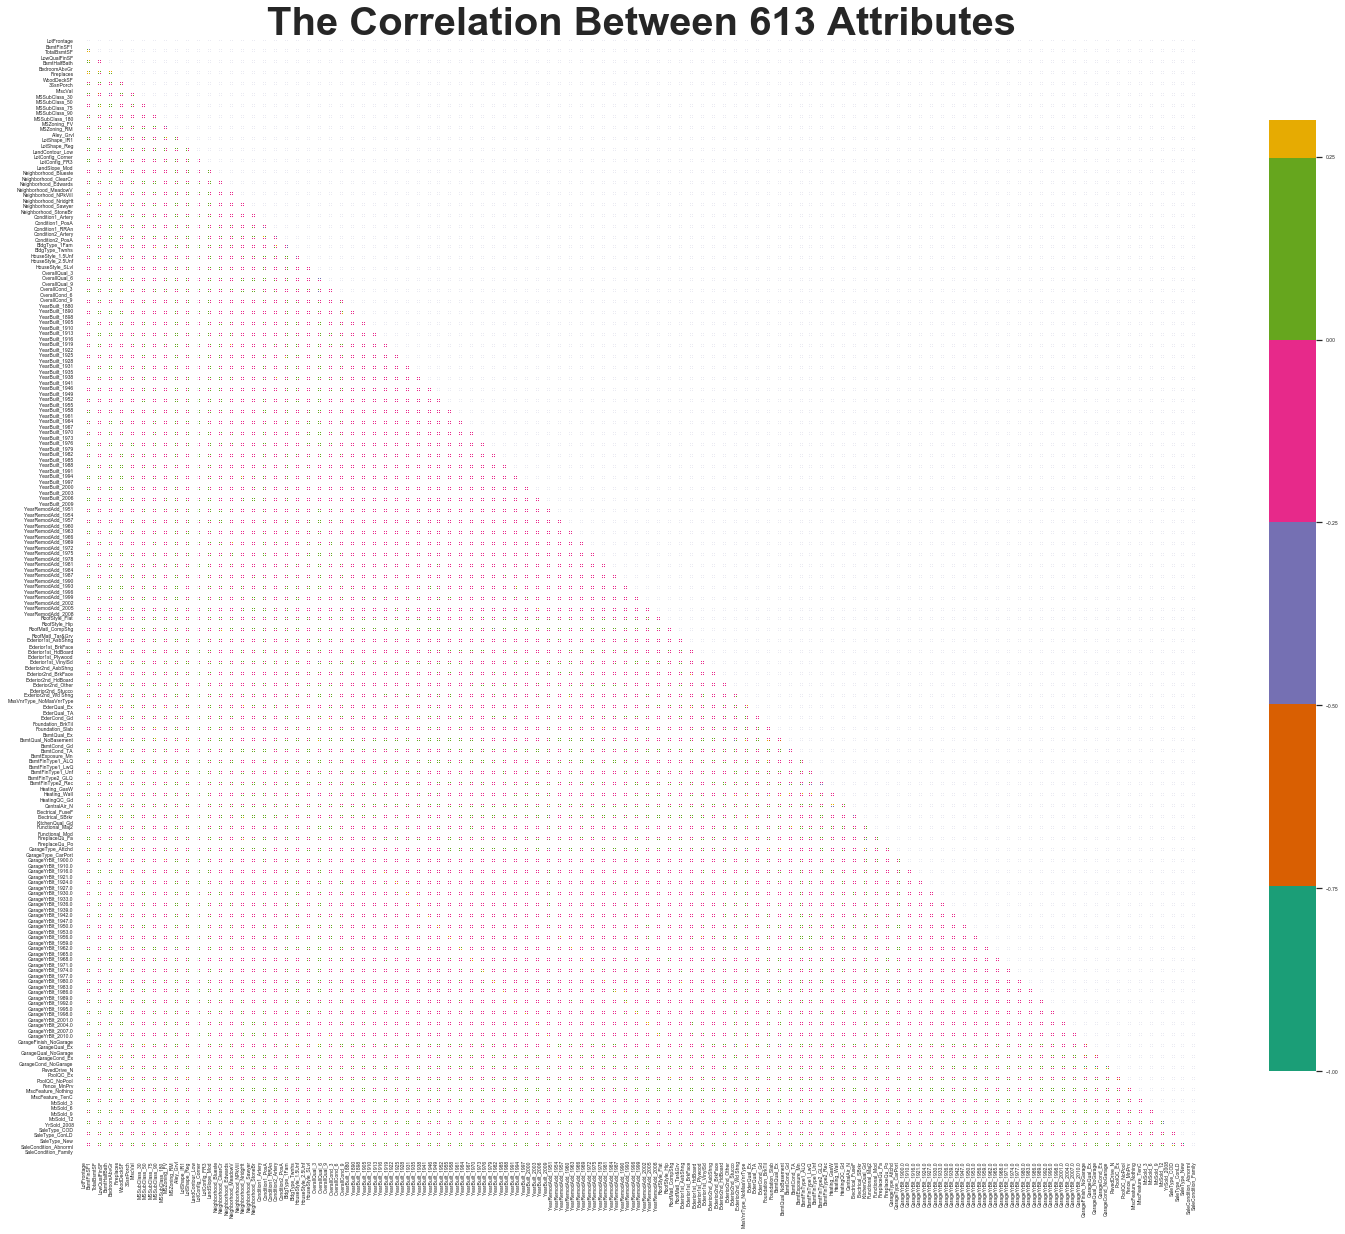

In [1144]:
# plot correlation matrix 'Dark2'
#import time
start_time = time.time()
plt.figure(figsize=(25, 25))
#sns.heatmap(correlations, vmax=.8, linewidths=0.01,
#            square=True,annot=True,cmap='Dark2',linecolor="white")
#plt.title('Correlation between two Features',fontsize=27, fontweight='bold');
mask1 = np.zeros_like(correlations, dtype=np.bool)
mask1[np.triu_indices_from(mask1)] = True
#plt.subplots(figsize=(40, 40))# Generate a custom diverging colormap
# Draw the heatmap with the mask and correct aspect ratio
cmap = 'Dark2'# sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlations,cmap=cmap, mask=mask1,
            square=True
           ,vmax=.3, center=0,
            linewidths=.5, cbar_kws={"shrink": 0.7})
plt.title('The Correlation Between 613 Attributes',fontsize=40, fontweight='bold')
sns.set(font_scale=1)
print("--- %s seconds ---" % (time.time() - start_time))

#### Correlation Matrix with the target feature

$$\textbf{Comments:}$$ Most of correlations are located in the range 0.0 and -0.2, which is followed by the range 0 and 0.2. However, a limitation of the above plot is that one has difficult to detect how large the correlations are.



Let's do another way as follows.

In [174]:
correlations['SalePrice'].sort_values(ascending=False)

SalePrice               1.000000
GrLivArea               0.703557
GarageCars              0.647302
GarageArea              0.631761
TotalBsmtSF             0.626977
                          ...   
BsmtQual_TA            -0.475307
FireplaceQu_NoFirepl   -0.481717
KitchenQual_TA         -0.531619
ExterQual_TA           -0.609463
Utilities_AllPub             NaN
Name: SalePrice, Length: 609, dtype: float64

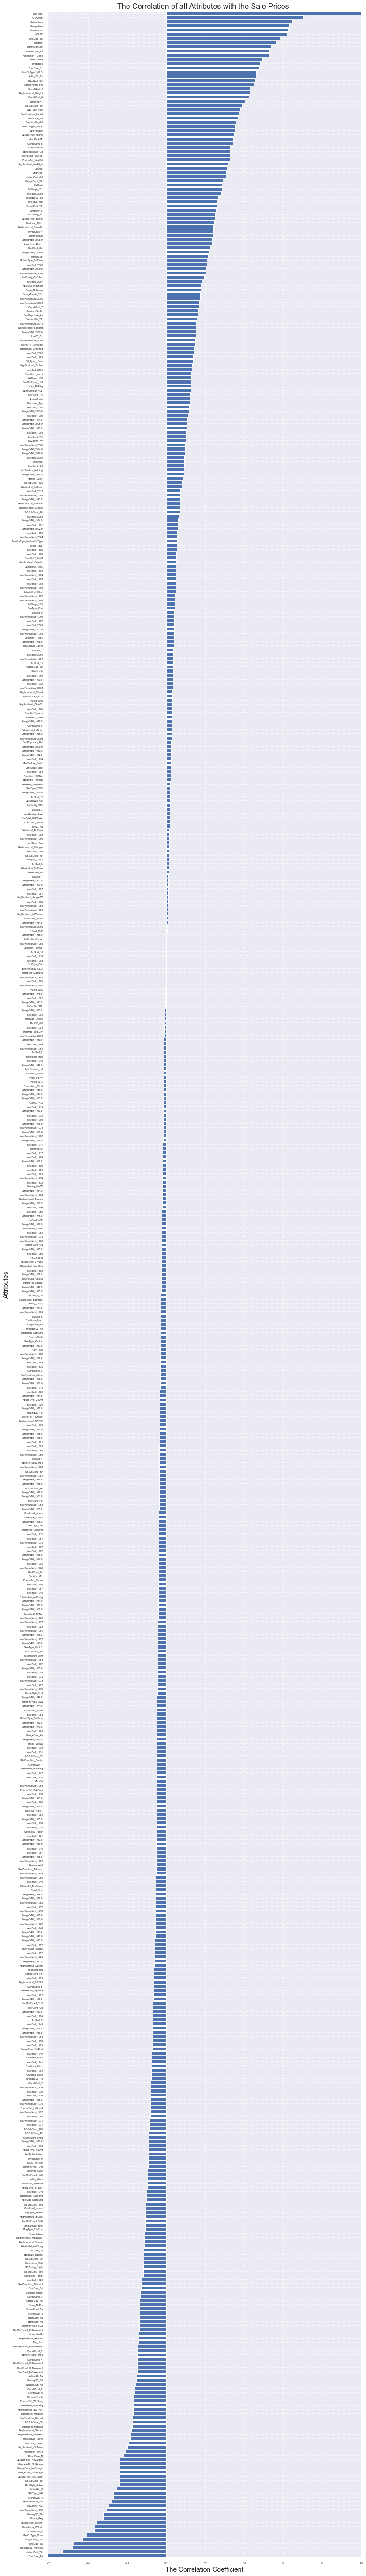

In [1463]:
plt.figure(figsize=(12,100))
plt.barh(correlations.SalePrice.sort_values(ascending=True).index, 
         correlations.SalePrice.sort_values(ascending=True))
plt.autoscale(enable=True,axis='both',tight=True)
plt.title('The Correlation of all Attributes with the Sale Prices ',fontsize=16)
plt.xlabel('The Correlation Coefficient',fontsize=14)
plt.ylabel('Attributes',fontsize=14)
plt.grid(which='major',linestyle=':',linewidth=1)
#plt.savefig("CorreWithTarget.pdf")

Picking Feature with a Threshold-higher correlation with the Sale Price

In [175]:
overThreshold_corr_with_saleprice=correlations.loc[abs(correlations['SalePrice']) >0.3]

In [176]:
overThreshold_corr_with_saleprice

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  \
LotFrontage               1.000000  0.426095    0.193014    0.233633   
LotArea                   0.426095  1.000000    0.114789    0.233019   
MasVnrArea                0.193014  0.114789    1.000000    0.290497   
BsmtFinSF1                0.233633  0.233019    0.290497    1.000000   
TotalBsmtSF               0.392075  0.311256    0.388292    0.531107   
1stFlrSF                  0.457181  0.339195    0.368225    0.466391   
2ndFlrSF                  0.080177  0.079491    0.180071   -0.116500   
GrLivArea                 0.402797  0.313833    0.409312    0.237895   
FullBath                  0.198769  0.141771    0.287622    0.067291   
TotRmsAbvGrd              0.352096  0.243589    0.305988    0.075870   
Fireplaces                0.266639  0.264678    0.265234    0.274777   
GarageCars                0.285691  0.187534    0.372404    0.219939   
GarageArea                0.344997  0.220754    0.382478    0.294792   
WoodDeckSF                0.088521  0.140538    0.181009    0.215005   
OpenPorchSF               0.151972  0.097670    0.122023    0.123278   
SalePrice                 0.351799  0.311416    0.494647    0.403195   
MSSubClass_60             0.220675  0.122065    0.248303    0.013699   
LotShape_Reg             -0.193426 -0.218077   -0.140942   -0.139228   
Neighborhood_NoRidge      0.151152  0.087141    0.330296    0.151535   
Neighborhood_NridgHt      0.126684  0.034068    0.323928    0.156087   
OverallQual_5            -0.051387 -0.053176   -0.202922   -0.022750   
OverallQual_8             0.118757  0.059394    0.230153    0.137567   
OverallQual_9             0.119293  0.084811    0.253717    0.175730   
OverallQual_10            0.221303  0.157575    0.260022    0.249189   
OverallCond_5             0.073350  0.063100    0.241801    0.112386   
YearRemodAdd_1950        -0.127516 -0.074292   -0.193534   -0.206967   
Exterior1st_VinylSd       0.081296  0.001279    0.149409   -0.004726   
Exterior2nd_VinylSd       0.091293  0.007356    0.149430   -0.008175   
MasVnrType_None          -0.134955 -0.033008   -0.683733   -0.245542   
MasVnrType_Stone          0.090013  0.036483    0.243534    0.204445   
ExterQual_Ex              0.162321  0.129386    0.362052    0.241084   
ExterQual_Gd              0.090880  0.015136    0.158668    0.055831   
ExterQual_TA             -0.155743 -0.061282   -0.285800   -0.133261   
Foundation_CBlock         0.025953  0.015201   -0.095414    0.049261   
Foundation_PConc          0.061824  0.017786    0.230390    0.116532   
BsmtQual_Ex               0.218054  0.123580    0.350637    0.299332   
BsmtQual_TA              -0.073353 -0.083700   -0.218172   -0.128144   
BsmtExposure_Gd           0.169151  0.270043    0.213479    0.358290   
BsmtFinType1_GLQ          0.091015  0.042831    0.237869    0.522661   
HeatingQC_Ex              0.102500  0.030843    0.193898    0.103071   
HeatingQC_TA             -0.062790  0.003205   -0.110307   -0.030790   
KitchenQual_Ex            0.181508  0.122532    0.279325    0.267728   
KitchenQual_Gd            0.054340  0.000036    0.090118    0.013052   
KitchenQual_TA           -0.150788 -0.054033   -0.211015   -0.120243   
FireplaceQu_Gd            0.159263  0.149925    0.169184    0.071168   
FireplaceQu_NoFirepl     -0.236674 -0.197687   -0.275861   -0.196497   
GarageType_Attchd         0.234898  0.130553    0.185427    0.271127   
GarageType_Detchd        -0.262830 -0.136035   -0.196308   -0.214968   
GarageFinish_Fin          0.148565  0.085597    0.229384    0.233288   
GarageFinish_Unf         -0.207223 -0.086448   -0.249411   -0.186949   
SaleType_New              0.128311  0.054228    0.181457    0.060397   
SaleCondition_Partial     0.126571  0.058193    0.177690    0.060610   

                       BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
LotFrontage              0.049900   0.132644     0.392075  0.457181  0.080177   
LotArea                  0.138150   0.022146

In [178]:
print(Bold+ 'No. Attribute has a Threshold-higher Correlation with Target Value: {}'.
     format(len(overThreshold_corr_with_saleprice['SalePrice'].index)))
print(Bold+ 'List of Attribute has a Threshold-higher Correlation with Target Value:' + End)
print(overThreshold_corr_with_saleprice['SalePrice'].index)
print(Bold+ 'The Values of a Threshold-higher Correlation with Target Value:' + End)
print(overThreshold_corr_with_saleprice['SalePrice'].sort_values(ascending=False))

No. Attribute has a Threshold-higher Correlation with Target Value: 52
List of Attribute has a Threshold-higher Correlation with Target Value:
Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'SalePrice', 'MSSubClass_60', 'LotShape_Reg', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'OverallQual_5', 'OverallQual_8',
       'OverallQual_9', 'OverallQual_10', 'OverallCond_5', 'YearRemodAdd_1950',
       'Exterior1st_VinylSd', 'Exterior2nd_VinylSd', 'MasVnrType_None',
       'MasVnrType_Stone', 'ExterQual_Ex', 'ExterQual_Gd', 'ExterQual_TA',
       'Foundation_CBlock', 'Foundation_PConc', 'BsmtQual_Ex', 'BsmtQual_TA',
       'BsmtExposure_Gd', 'BsmtFinType1_GLQ', 'HeatingQC_Ex', 'HeatingQC_TA',
       'KitchenQual_Ex', 'KitchenQual_Gd', 'KitchenQual_TA', 'FireplaceQu_Gd',
       'FireplaceQu_NoFirep

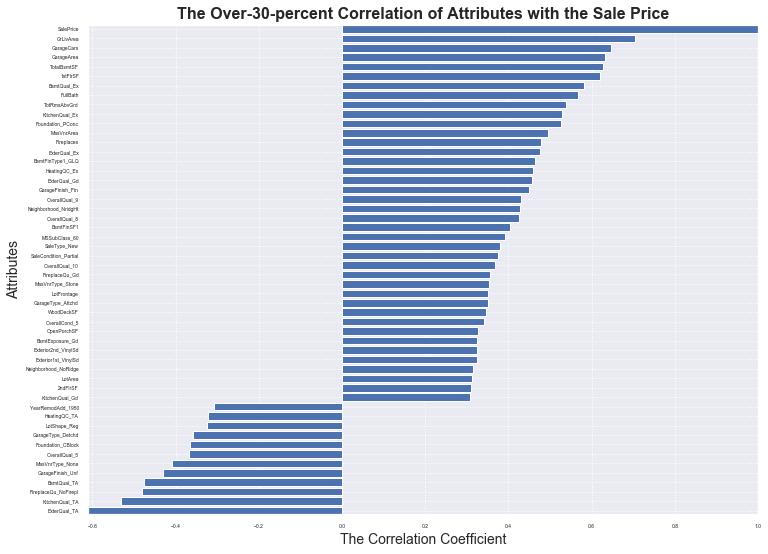

In [179]:
plt.figure(figsize=(12,9))
plt.barh(overThreshold_corr_with_saleprice.SalePrice.sort_values(ascending=True).index, 
         overThreshold_corr_with_saleprice.SalePrice.sort_values(ascending=True))
plt.autoscale(enable=True,axis='both',tight=True)
plt.title('The Over-30-percent Correlation of Attributes with the Sale Price',fontsize=16,fontweight='bold')
plt.xlabel('The Correlation Coefficient',fontsize=14)
plt.ylabel('Attributes',fontsize=14)
plt.grid(which='major',linestyle=':',linewidth=1)
#plt.savefig("CorreWithTarget.pdf")

$$\large \textbf{Comments:}$$
51 explanatory variables have the 30-percent-higher correlations with the Sale Price. It suggests that one should use these 47 both categorical and numnerical variables as main explanatory ones. This variable selection also enables to do the dimentionality reduction.

Now, let's compute the correlation between these 51 explanatory variables as follows.

#### Correlation among explanatory varibles

In [180]:
#corr_with_saleprice['SalePrice'].index
corr_among_explan=correlations.loc[:,correlations['SalePrice'].index.drop(['SalePrice'])]


#drop('SalePrice',axis=1)

In [181]:
corr_among_explan.index#.shape

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=609)

In [182]:
corr_among_explan=corr_among_explan.loc[corr_among_explan.index.drop(['SalePrice']),:]

In [183]:
corr_among_explan.shape

(608, 608)

In [184]:
corr_among_explan

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  \
LotFrontage               1.000000  0.426095    0.193014    0.233633   
LotArea                   0.426095  1.000000    0.114789    0.233019   
MasVnrArea                0.193014  0.114789    1.000000    0.290497   
BsmtFinSF1                0.233633  0.233019    0.290497    1.000000   
BsmtFinSF2                0.049900  0.138150   -0.069984   -0.032732   
...                            ...       ...         ...         ...   
SaleCondition_AdjLand    -0.037030 -0.014225   -0.012573   -0.014043   
SaleCondition_Alloca     -0.019817 -0.016056   -0.005804    0.022067   
SaleCondition_Family      0.016684 -0.007286   -0.002919    0.018370   
SaleCondition_Normal     -0.076258 -0.009461   -0.098884   -0.042662   
SaleCondition_Partial     0.126571  0.058193    0.177690    0.060610   

                       BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
LotFrontage              0.049900   0.132644     0.392075  0.457181  0.080177   
LotArea                  0.138150   0.022146     0.311256  0.339195  0.079491   
MasVnrArea              -0.069984   0.111265     0.388292  0.368225  0.180071   
BsmtFinSF1              -0.032732  -0.493501     0.531107  0.466391 -0.116500   
BsmtFinSF2               1.000000  -0.213595     0.096913  0.075265 -0.103149   
...                           ...        ...          ...       ...       ...   
SaleCondition_AdjLand   -0.016087  -0.040451    -0.060583 -0.040715 -0.015958   
SaleCondition_Alloca    -0.025500  -0.082588    -0.068579  0.041452 -0.022894   
SaleCondition_Family    -0.002643   0.008492     0.026625  0.036299 -0.034477   
SaleCondition_Normal     0.078679  -0.158846    -0.176082 -0.168506  0.031929   
SaleCondition_Partial   -0.091433   0.255764     0.287290  0.248758  0.008342   

                       LowQualFinSF  ...  SaleType_ConLw  SaleType_New  \
LotFrontage                0.038469  ...       -0.051807      0.128311   
LotArea                    0.013680  ...       -0.016284      0.054228   
MasVnrArea                -0.071660  ...       -0.024311      0.181457   
BsmtFinSF1                -0.065926  ...       -0.016995      0.060397   
BsmtFinSF2                 0.023623  ...        0.042633     -0.093149   
...                             ...  ...             ...           ...   
SaleCondition_AdjLand     -0.007456  ...       -0.003738     -0.019349   
SaleCondition_Alloca      -0.011818  ...       -0.005925     -0.030671   
SaleCondition_Family      -0.015910  ...       -0.007976     -0.041288   
SaleCondition_Normal      -0.011435  ...        0.032312     -0.669787   
SaleCondition_Partial     -0.043764  ...       -0.021939      0.986456   

                       SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
LotFrontage               -0.023466    -0.094298              -0.023965   
LotArea                   -0.004378    -0.028448              -0.042188   
MasVnrArea                -0.027803    -0.144700              -0.050657   
BsmtFinSF1                 0.013319    -0.041704              -0.018863   
BsmtFinSF2                -0.013926     0.060327              -0.000295   
...                             ...          ...                    ...   
SaleCondition_AdjLand     -0.002893     0.024193              -0.015852   
SaleCondition_Alloca      -0.004585     0.038348              -0.025128   
SaleCondition_Family      -0.006173     0.032381              -0.033826   
SaleCondition_Normal      -0.100136     0.650347              -0.548743   
SaleCondition_Partial     -0.016980    -0.795410              -0.093050   

                       SaleCondition_AdjLand  SaleCondition_Alloca  \
LotFrontage                        -0.037030             -0.019817   
LotArea                            -0.014225             -0.016056   
MasVnrArea                         -0.012573             -0.005804   
BsmtFinSF1                         -0.014043              0.022067   
BsmtFinSF2                         -0.016087 

In [185]:
# plot correlation matrix 'Dark2'
start_time = time.time()
plt.figure(figsize=(35, 35))
#sns.heatmap(correlations, vmax=.8, linewidths=0.01,
#            square=True,annot=True,cmap='Dark2',linecolor="white")
#plt.title('Correlation between two Features',fontsize=27, fontweight='bold');
mask1 = np.zeros_like(corr_among_explan, dtype=np.bool)
mask1[np.triu_indices_from(mask1)] = True
#plt.subplots(figsize=(15, 30))# Generate a custom diverging colormap
# Draw the heatmap with the mask and correct aspect ratio
cmap = 'Dark2'# sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_among_explan,cmap=cmap, mask=mask1,annot=True,
            square=True
           ,vmax=.3, center=0,
            linewidths=.5, cbar_kws={"shrink": 0.7})
plt.title('The Correlation Among All Explanatory Variables',fontsize=20, fontweight='bold')
sns.set(font_scale=0.5)
print("--- %s seconds ---" % (time.time() - start_time))

--- 136.44223809242249 seconds ---
Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1a22f84bf8> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x1a231e2ae8> (for post_execute):


KeyboardInterrupt: 

$$\textbf{Comments:}$$ Most of correlation values are located in the range -0.25 and 0, which is followd by the range 0 and 0.25. It implies the correlation between the explanatory variables is weak. However, it is difficult to see the detailed correlation between pair of explanatory variables on above Figure. We use another way to make it clearer

In [186]:
# Extract the upper triangle of the correlation matrix
corr_among_explan_up=corr_among_explan.where(np.triu(np.ones(corr_among_explan.shape), k = 1).astype(np.bool))

In [187]:
corr_among_explan_up

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  \
LotFrontage                    NaN  0.426095    0.193014    0.233633   
LotArea                        NaN       NaN    0.114789    0.233019   
MasVnrArea                     NaN       NaN         NaN    0.290497   
BsmtFinSF1                     NaN       NaN         NaN         NaN   
BsmtFinSF2                     NaN       NaN         NaN         NaN   
...                            ...       ...         ...         ...   
SaleCondition_AdjLand          NaN       NaN         NaN         NaN   
SaleCondition_Alloca           NaN       NaN         NaN         NaN   
SaleCondition_Family           NaN       NaN         NaN         NaN   
SaleCondition_Normal           NaN       NaN         NaN         NaN   
SaleCondition_Partial          NaN       NaN         NaN         NaN   

                       BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
LotFrontage              0.049900   0.132644     0.392075  0.457181  0.080177   
LotArea                  0.138150   0.022146     0.311256  0.339195  0.079491   
MasVnrArea              -0.069984   0.111265     0.388292  0.368225  0.180071   
BsmtFinSF1              -0.032732  -0.493501     0.531107  0.466391 -0.116500   
BsmtFinSF2                    NaN  -0.213595     0.096913  0.075265 -0.103149   
...                           ...        ...          ...       ...       ...   
SaleCondition_AdjLand         NaN        NaN          NaN       NaN       NaN   
SaleCondition_Alloca          NaN        NaN          NaN       NaN       NaN   
SaleCondition_Family          NaN        NaN          NaN       NaN       NaN   
SaleCondition_Normal          NaN        NaN          NaN       NaN       NaN   
SaleCondition_Partial         NaN        NaN          NaN       NaN       NaN   

                       LowQualFinSF  ...  SaleType_ConLw  SaleType_New  \
LotFrontage                0.038469  ...       -0.051807      0.128311   
LotArea                    0.013680  ...       -0.016284      0.054228   
MasVnrArea                -0.071660  ...       -0.024311      0.181457   
BsmtFinSF1                -0.065926  ...       -0.016995      0.060397   
BsmtFinSF2                 0.023623  ...        0.042633     -0.093149   
...                             ...  ...             ...           ...   
SaleCondition_AdjLand           NaN  ...             NaN           NaN   
SaleCondition_Alloca            NaN  ...             NaN           NaN   
SaleCondition_Family            NaN  ...             NaN           NaN   
SaleCondition_Normal            NaN  ...             NaN           NaN   
SaleCondition_Partial           NaN  ...             NaN           NaN   

                       SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
LotFrontage               -0.023466    -0.094298              -0.023965   
LotArea                   -0.004378    -0.028448              -0.042188   
MasVnrArea                -0.027803    -0.144700              -0.050657   
BsmtFinSF1                 0.013319    -0.041704              -0.018863   
BsmtFinSF2                -0.013926     0.060327              -0.000295   
...                             ...          ...                    ...   
SaleCondition_AdjLand           NaN          NaN                    NaN   
SaleCondition_Alloca            NaN          NaN                    NaN   
SaleCondition_Family            NaN          NaN                    NaN   
SaleCondition_Normal            NaN          NaN                    NaN   
SaleCondition_Partial           NaN          NaN                    NaN   

                       SaleCondition_AdjLand  SaleCondition_Alloca  \
LotFrontage                        -0.037030             -0.019817   
LotArea                            -0.014225             -0.016056   
MasVnrArea                         -0.012573             -0.005804   
BsmtFinSF1                         -0.014043              0.022067   
BsmtFinSF2                         -0.016087 

In [188]:
# Defining a threshold
correlation_threshold=0.5
# Select the features with correlations above the threshold
# Need to use the absolute value
to_drop = [column for column in corr_among_explan_up.columns 
           if any(corr_among_explan_up[column].abs() > correlation_threshold)]

In [189]:
print(Bold + 'The Number of the Explanatory Variables has the Threshold-higher Correlation: {}'.
     format(len(to_drop)))
print('List of the Explanatory Variables has the Threshold-higher Correlation:'+ End)
print(to_drop)


The Number of the Explanatory Variables has the Threshold-higher Correlation: 243
List of the Explanatory Variables has the Threshold-higher Correlation:
['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageArea', 'MSSubClass_20', 'MSSubClass_60', 'MSSubClass_90', 'MSZoning_RM', 'Street_Pave', 'Alley_NoAlley', 'Alley_Pave', 'LotShape_Reg', 'LandContour_Lvl', 'LotConfig_Inside', 'LandSlope_Mod', 'Neighborhood_BrDale', 'Neighborhood_MeadowV', 'Neighborhood_OldTown', 'Neighborhood_Somerst', 'Condition1_Norm', 'Condition2_Norm', 'BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'OverallCond_6', 'YearBuilt_1893', 'YearRemodAdd_1951', 'YearRemodAdd_1952', 'YearRemodAdd_1953', 'YearRemodAdd_1954', 'YearRemodAdd_1955', 'Yea

$$\textbf{Comments:}$$ Among 612 explanatory variabeles, 244 variables has the correlation with each other of over 50 percent. This result suggest that one should drop these 244 explanatory variables before training a specific Machine Learning.

In [190]:
# Creating a Dataframe to hold correlated pairs
record_corr_among_explan = pd.DataFrame(columns = ['Feature_1', 'Feature_2', 'Corr_value'])

In [191]:
for column in to_drop:
    # Finding the feature wih the threshold-higher correlation
    Feature_2=list(corr_among_explan_up.index[corr_among_explan_up[column].abs()
                                                > correlation_threshold])
    # Finding the threshold-higher correlation values
    Corr_value=list(corr_among_explan_up[column][corr_among_explan_up[column].abs()
                                                > correlation_threshold])
    # Fulfilling the drop_features column:
    Feature_1= [column for _ in range(len(Feature_2))]
    # Recording them into a temporaty dataframework
    temp_df= pd.DataFrame.from_dict({'Feature_1': Feature_1,
                                   'Feature_2': Feature_2,
                                    'Corr_value': Corr_value})
    # Adding temp_df to the created dataframe "record_corr_among_explan51"
    record_corr_among_explan=record_corr_among_explan.append(temp_df,ignore_index=True)

In [192]:
record_corr_among_explan

Feature_1              Feature_2  Corr_value
0              TotalBsmtSF             BsmtFinSF1    0.531107
1                 1stFlrSF            TotalBsmtSF    0.832790
2                GrLivArea               1stFlrSF    0.572765
3                GrLivArea               2ndFlrSF    0.691038
4             BsmtFullBath             BsmtFinSF1    0.655299
..                     ...                    ...         ...
373   SaleCondition_Normal            SaleType_WD    0.650347
374   SaleCondition_Normal  SaleCondition_Abnorml   -0.548743
375  SaleCondition_Partial           SaleType_New    0.986456
376  SaleCondition_Partial            SaleType_WD   -0.795410
377  SaleCondition_Partial   SaleCondition_Normal   -0.678983

[378 rows x 3 columns]

### The densities of all numerical variables

It is worth noting that this step is important to a issue of whether the numerical variables should be transformed before training a ML model

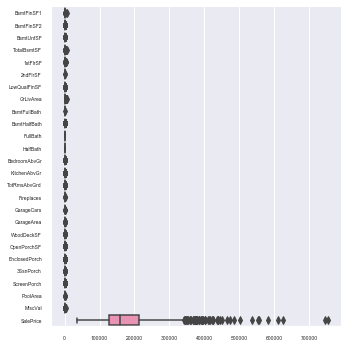

In [1480]:
sns.catplot(data=features.iloc[:, 2:34], orient="h", kind="box");

$$\textbf{Comments:}$$ Again the magnitude in values of 34 numerical variables are very different because of the different measurement method. For example, the value of the target feature is measured in the U.S Dollar, but other explanatory variables such as $LotArea$, $BsmtFinSF1$, etc are measured in the square feet. Thus, a transformation of data should be used before training an ML model.

#### Only truly numerical attributes

### The Relationship of categorical explanatory variables with the Sale Price

It’s helpful to think of the different categorical plot kinds as belonging to three different families, which we’ll discuss in detail below. They are:

1. Categorical scatterplots.

2. Categorical distribution plots.

3. Categorical estimate plots.

It is good to refer to the following link

https://seaborn.pydata.org/tutorial/categorical.html

###### Picking up the categorical explanatory variables

In [193]:
cat_features =used_data.loc[:, used_data.dtypes == np.object] 
cat_features.shape

(1201, 51)

In [194]:
cat_features.head()

MSSubClass MSZoning Street    Alley LotShape LandContour Utilities  \
0         60       RL   Pave  NoAlley      Reg         Lvl    AllPub   
1         20       RL   Pave  NoAlley      Reg         Lvl    AllPub   
2         60       RL   Pave  NoAlley      IR1         Lvl    AllPub   
3         70       RL   Pave  NoAlley      IR1         Lvl    AllPub   
4         60       RL   Pave  NoAlley      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood  ... GarageQual GarageCond PavedDrive  \
0    Inside       Gtl      CollgCr  ...         TA         TA          Y   
1       FR2       Gtl      Veenker  ...         TA         TA          Y   
2    Inside       Gtl      CollgCr  ...         TA         TA          Y   
3    Corner       Gtl      Crawfor  ...         TA         TA          Y   
4       FR2       Gtl      NoRidge  ...         TA         TA          Y   

   PoolQC    Fence MiscFeature MoSold YrSold SaleType SaleCondition  
0  NoPool  NoFence     Nothing      2   2008       WD        Normal  
1  NoPool  NoFence     Nothing      5   2007       WD        Normal  
2  NoPool  NoFence     Nothing      9   2008       WD        Normal  
3  NoPool  NoFence     Nothing      2   2006       WD       Abnorml  
4  NoPool  NoFence     Nothing     12   2008       WD        Normal  

[5 rows x 51 columns]

In [195]:
cat_features['SalePrice']=used_data['SalePrice']

/Users/phuong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [196]:
cat_features.shape

(1201, 52)

###### Checking the missing data of the categorical features

No missing data. Ok!

In [197]:
cat_features.isnull().sum()

MSSubClass       0
MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

#### Categorical scatterplots

The default representation of the data in catplot() uses a scatterplot. There are actually two different categorical scatter plots in seaborn. They take different approaches to resolving the main challenge in representing categorical data with a scatter plot, which is that all of the points belonging to one category would fall on the same position along the axis corresponding to the categorical variable. The approach used by stripplot(), which is the default “kind” in catplot() is to adjust the positions of points on the categorical axis with a small amount of random “jitter”:

In [198]:
cat_features.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'SalePrice'],
      dtype='object')

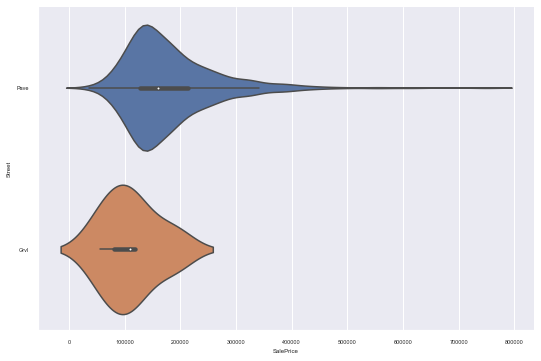

In [199]:
#plt.figure(figsize=(25, 38))
#plt.subplot(2,1,1)
sns.catplot(y="Street", x='SalePrice', kind="violin",
            height=5, # the height of the vertical axis
            aspect=1.5, # the width of the horizontal axis
            data=cat_features);

In [200]:
## Defining a function to plot 
def violinplt(name):
    sns.catplot(y=name, x="SalePrice", kind="violin",
            height=5, # the height of the vertical axis
            aspect=1.5, # the width of the horizontal axis
            data=cat_features)
    return;

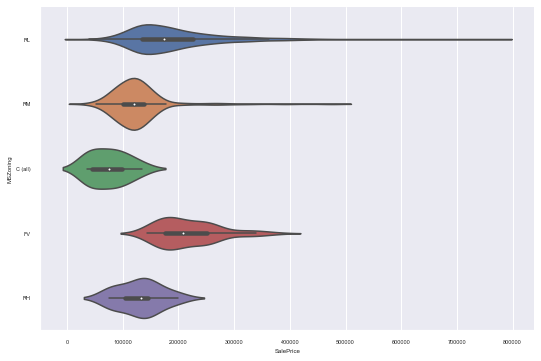

In [201]:
violinplt('MSZoning')

In [1490]:
cat_features.iloc[:,1:52].columns#.head()

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'SalePrice'],
      dtype='object')

/Users/phuong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


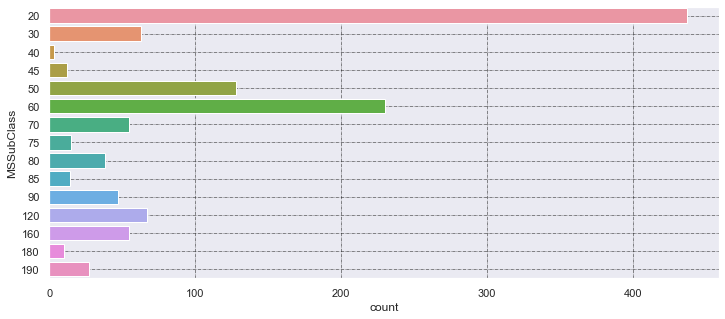

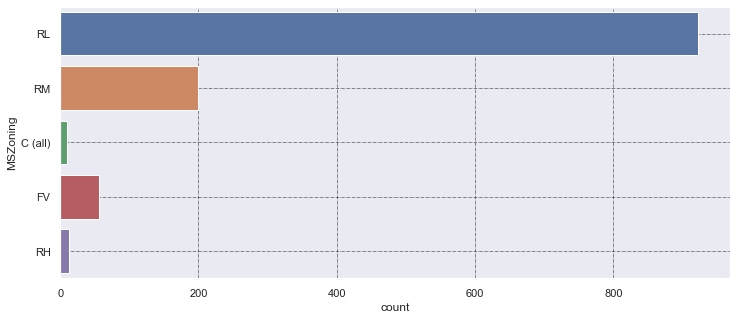

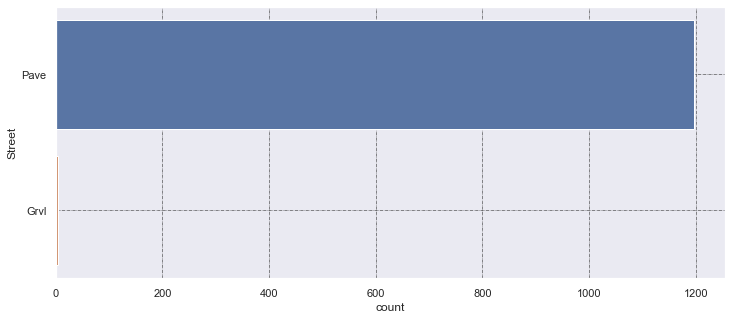

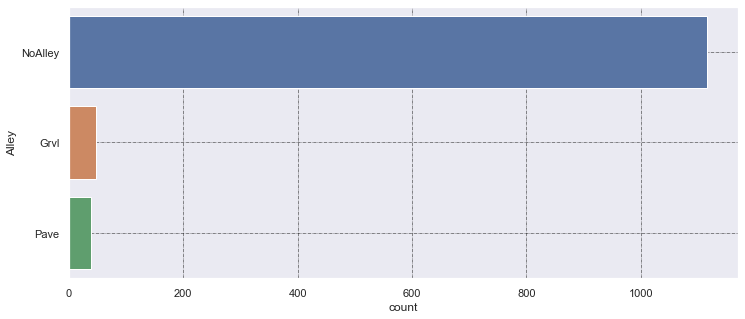

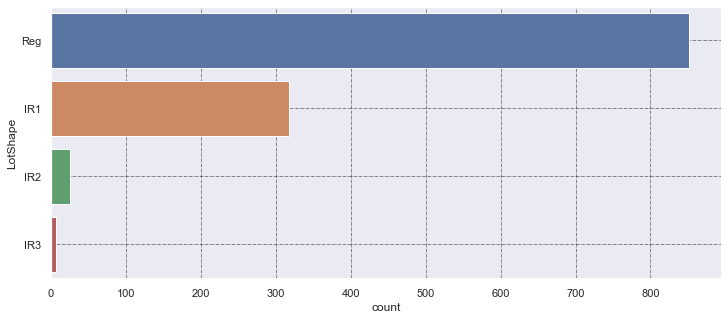

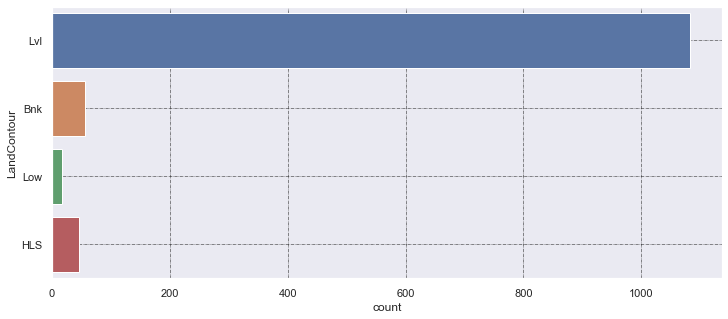

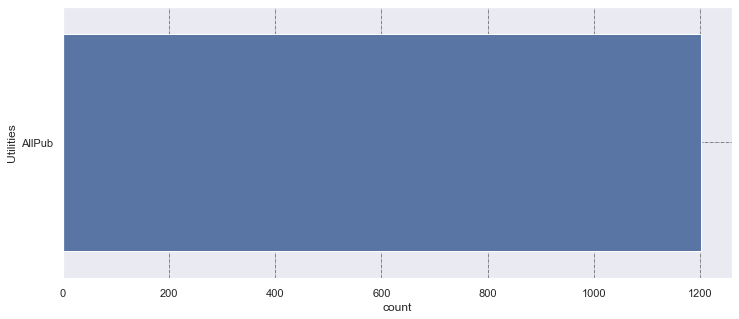

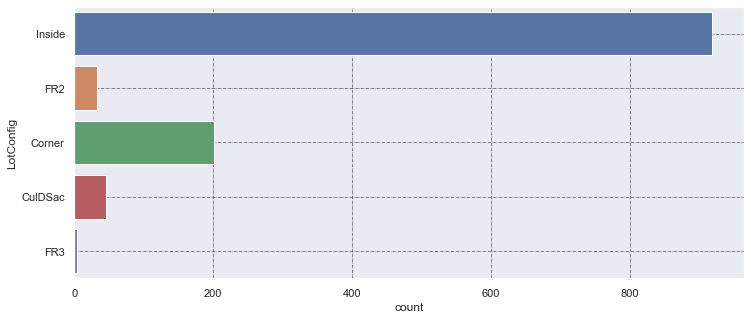

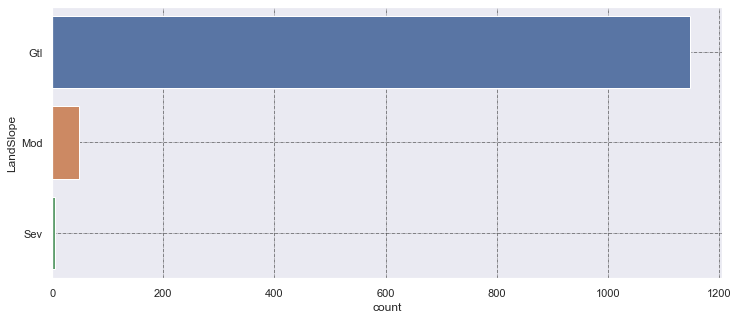

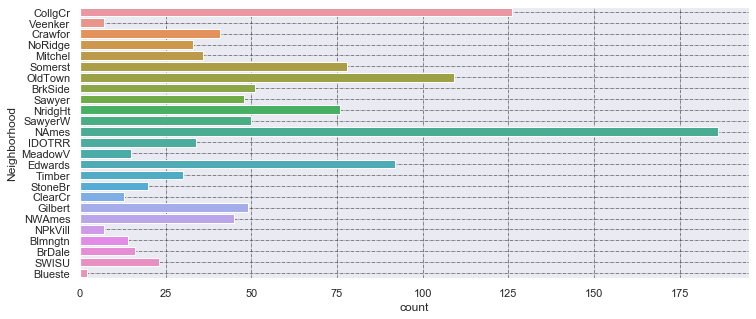

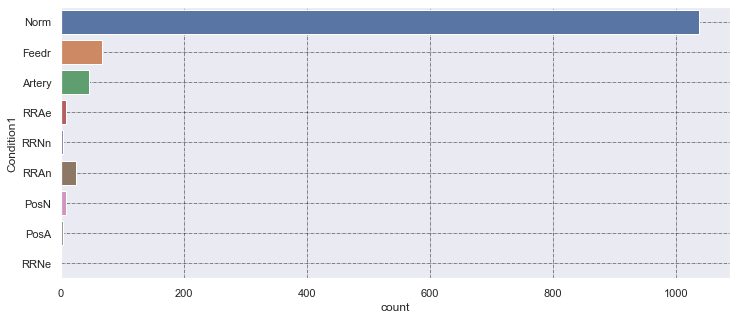

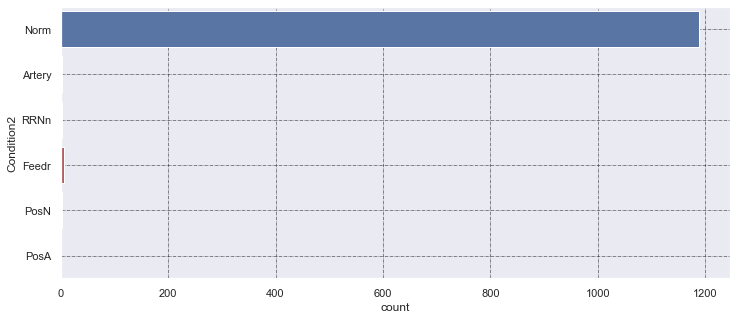

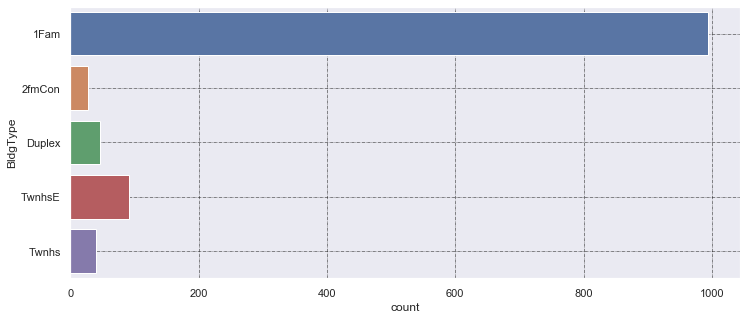

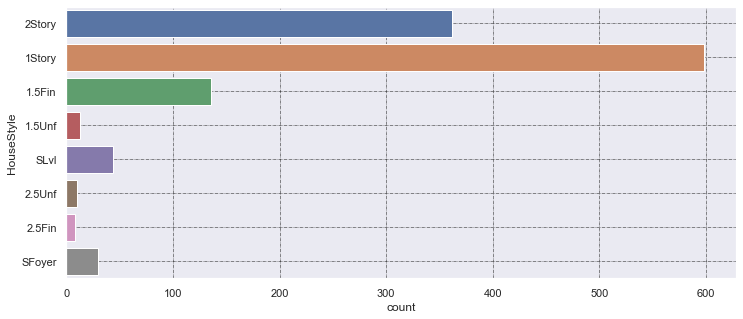

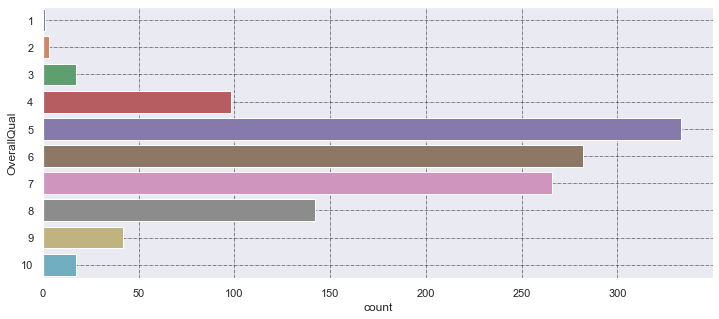

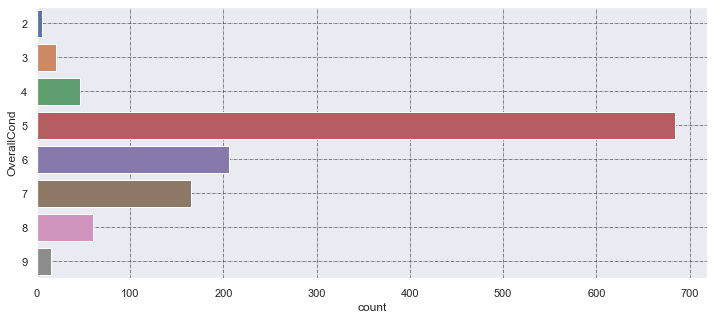

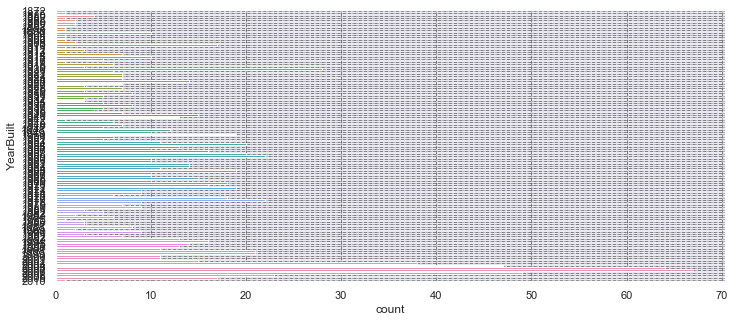

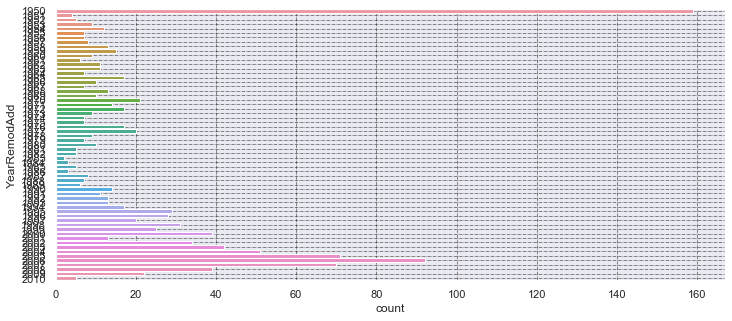

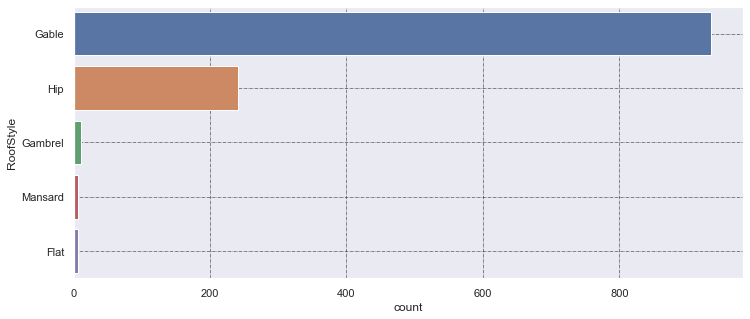

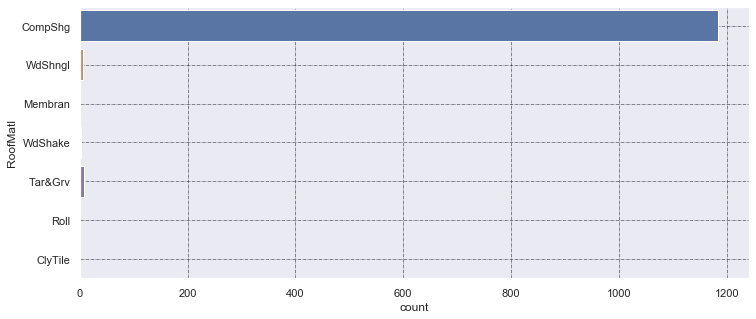

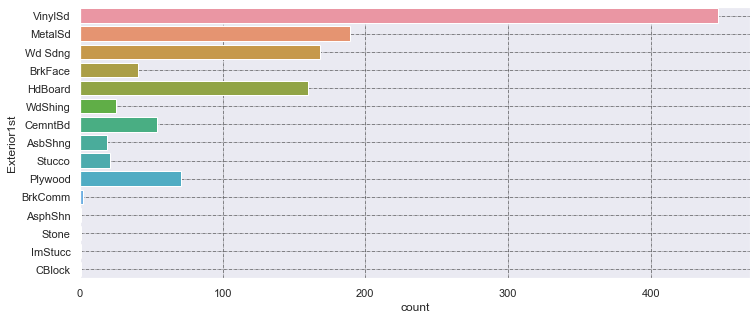

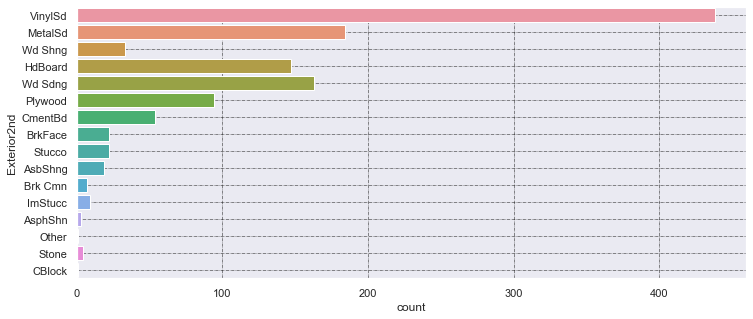

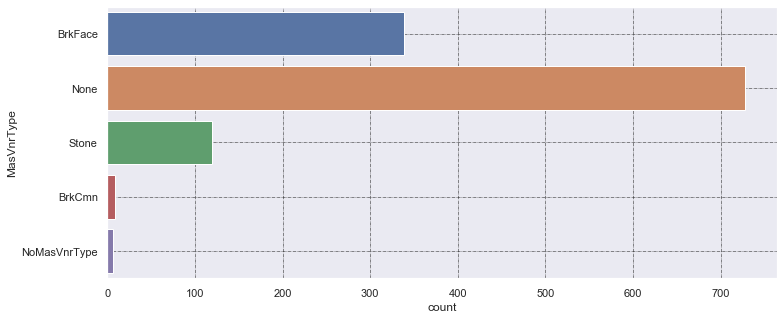

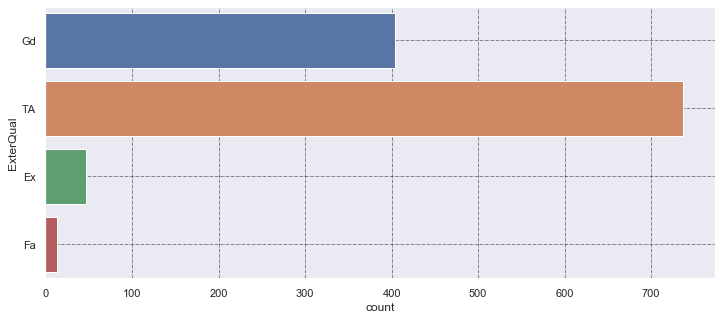

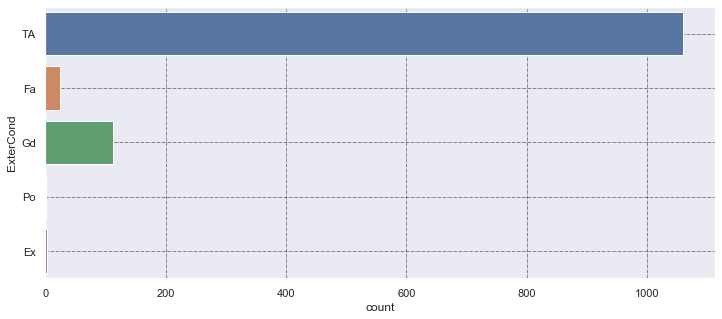

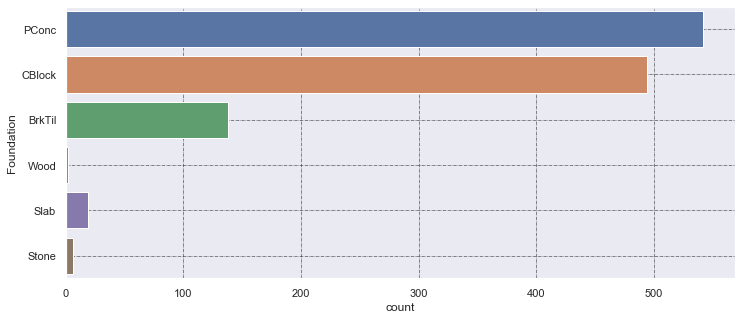

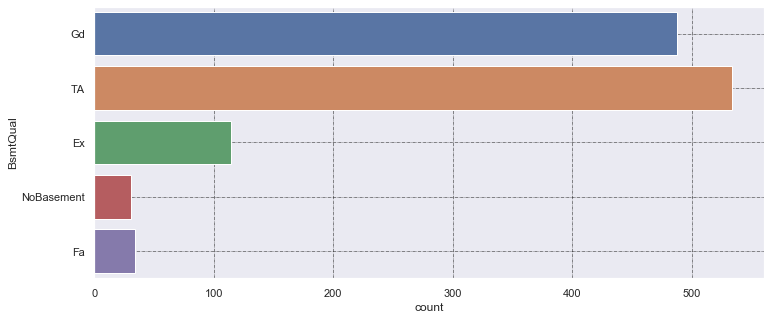

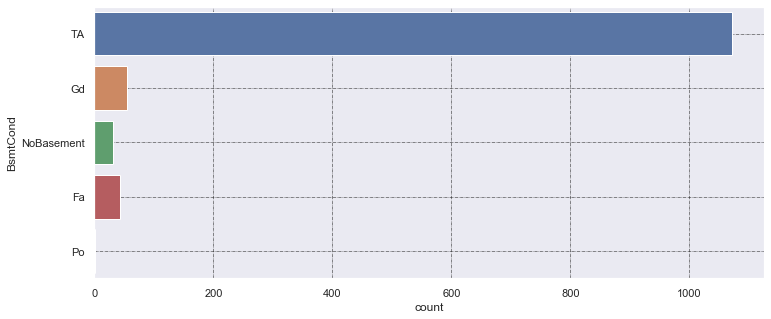

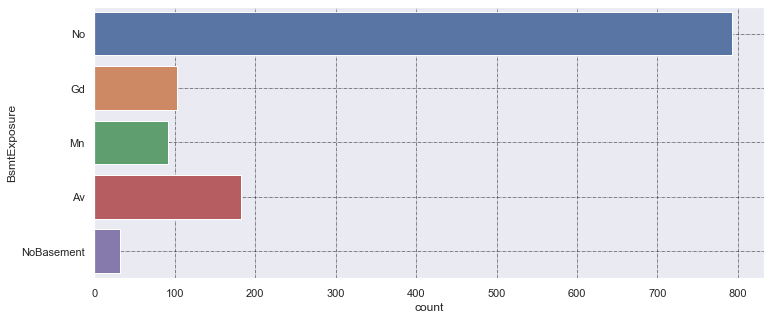

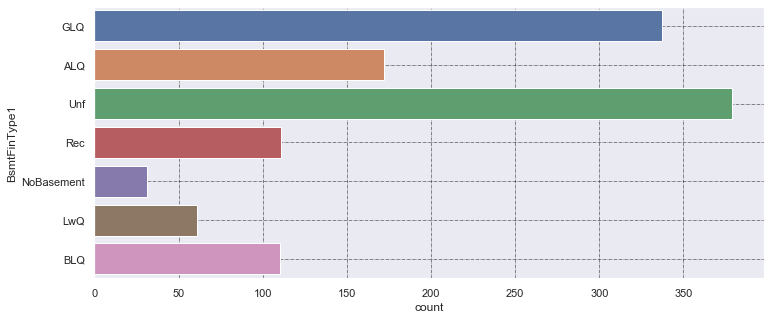

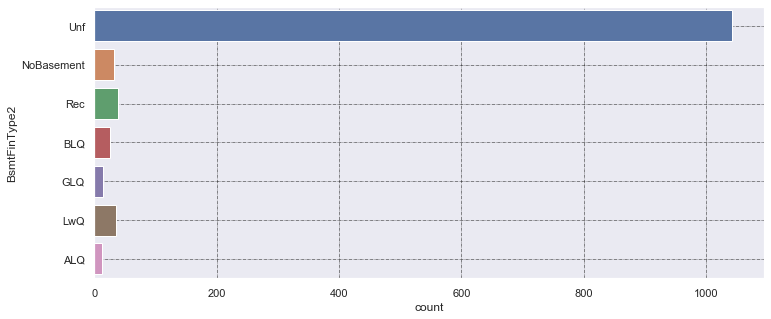

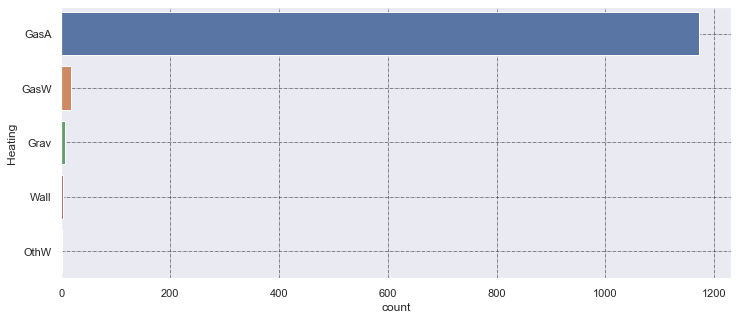

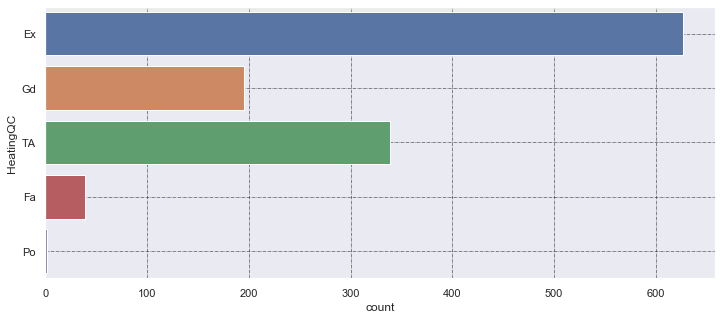

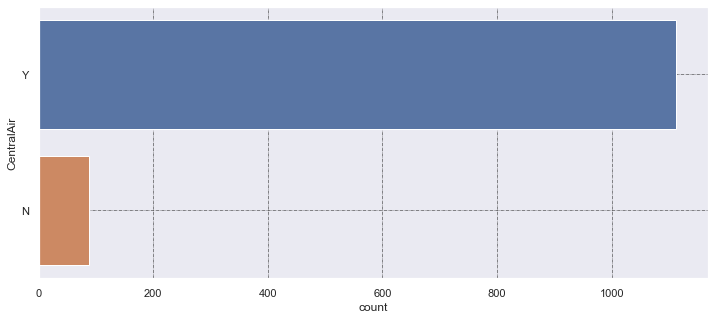

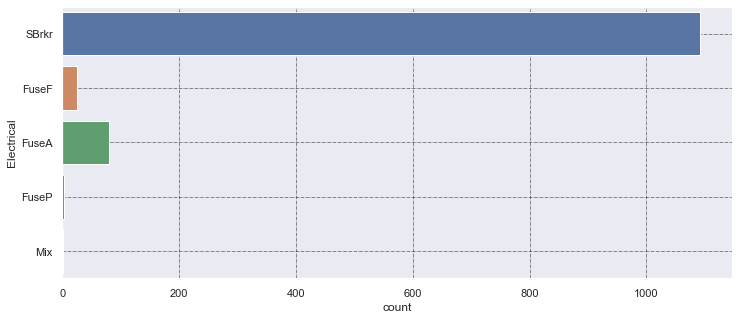

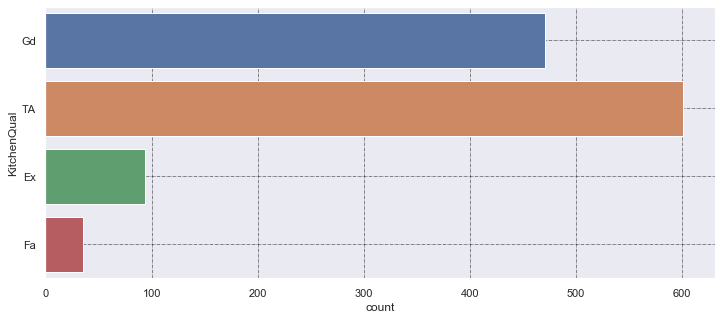

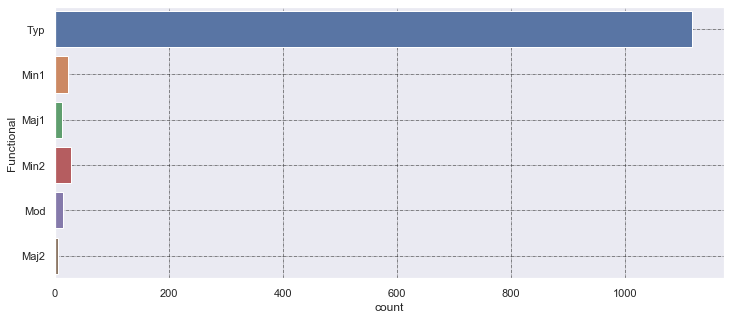

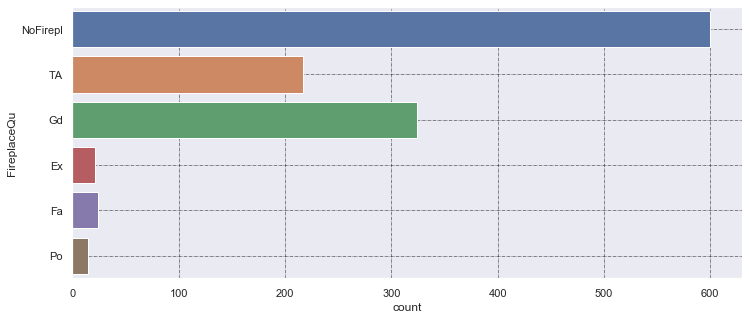

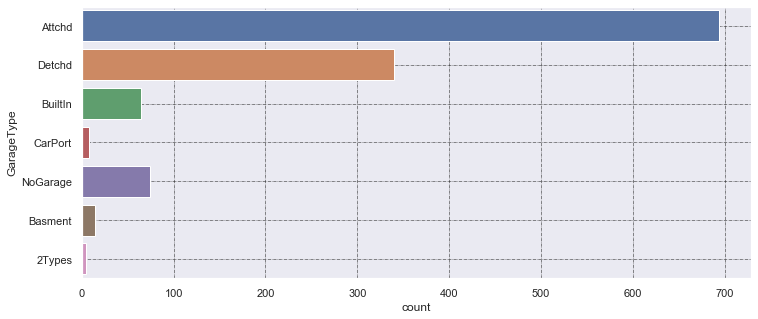

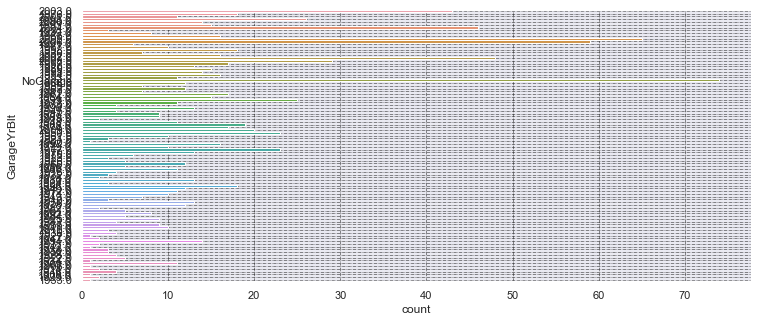

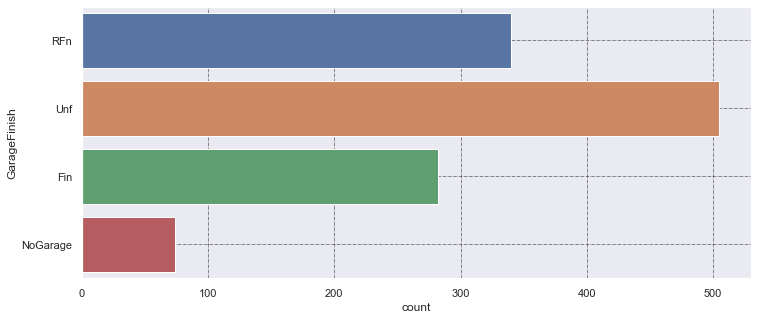

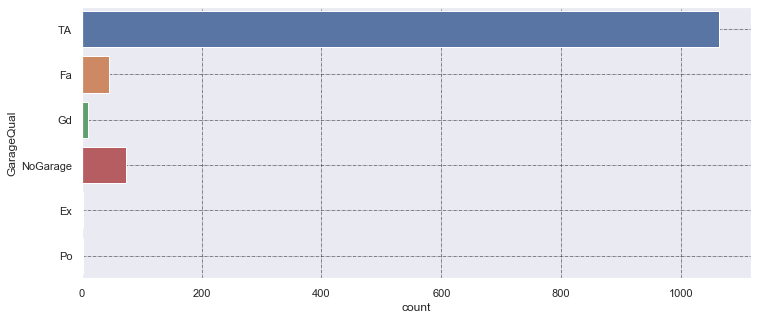

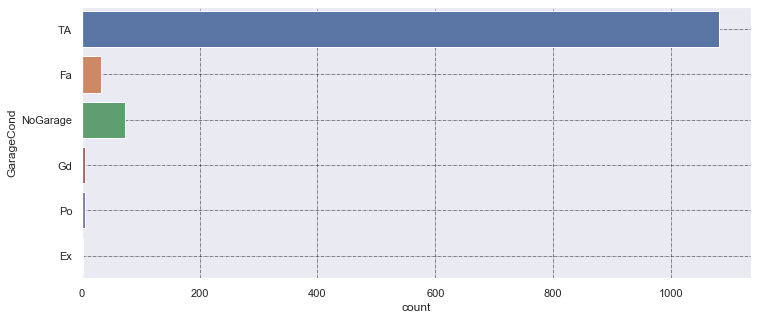

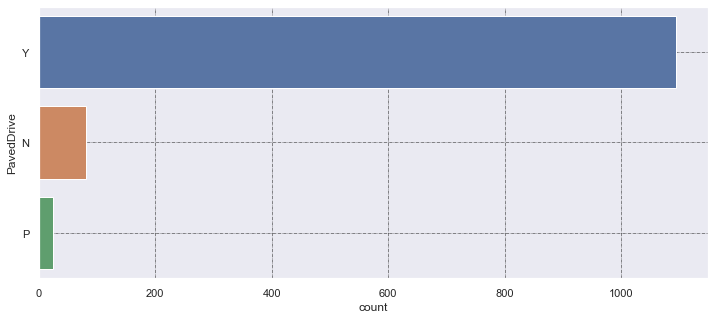

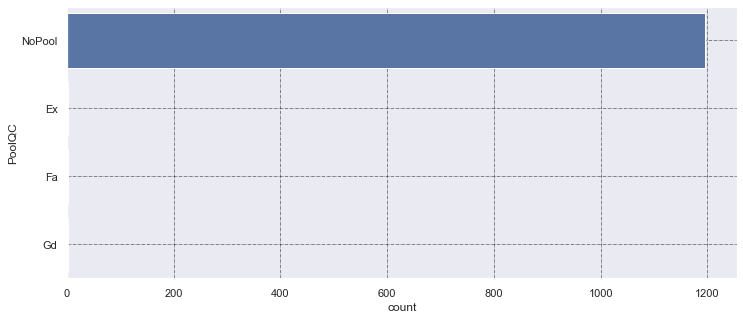

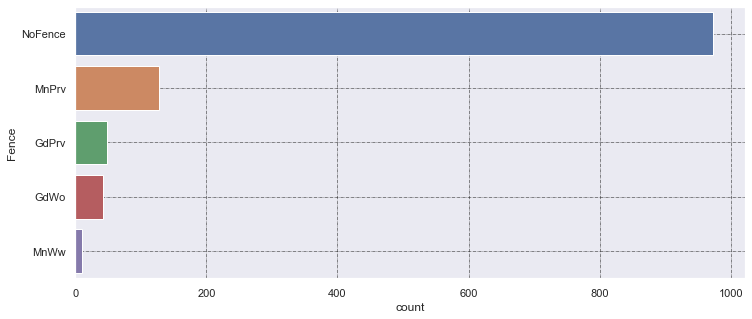

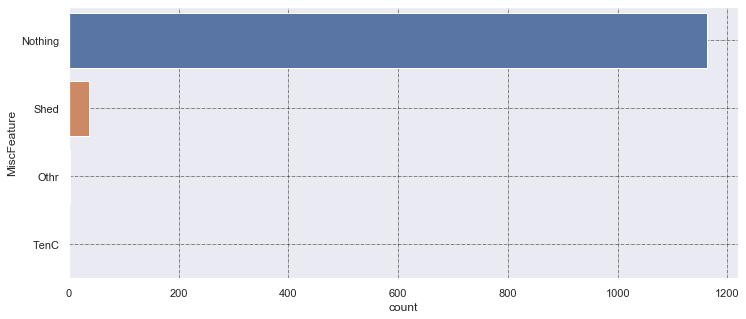

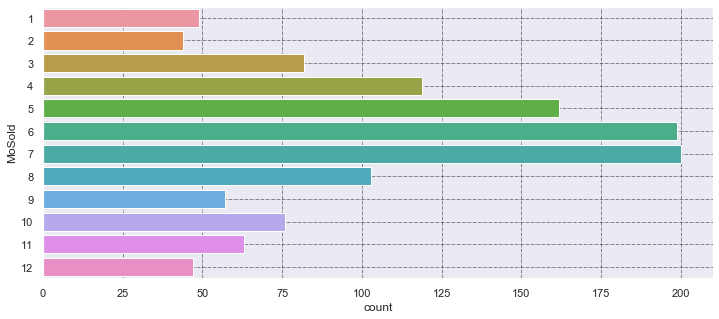

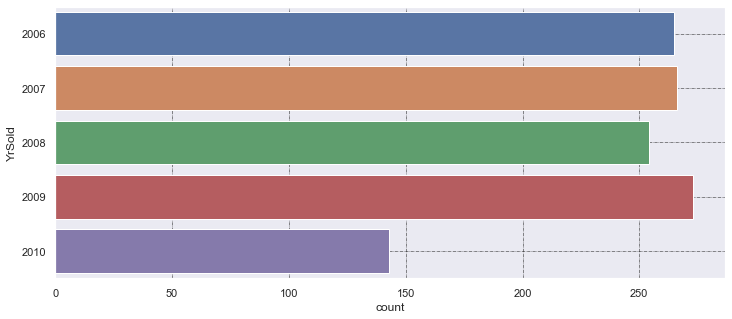

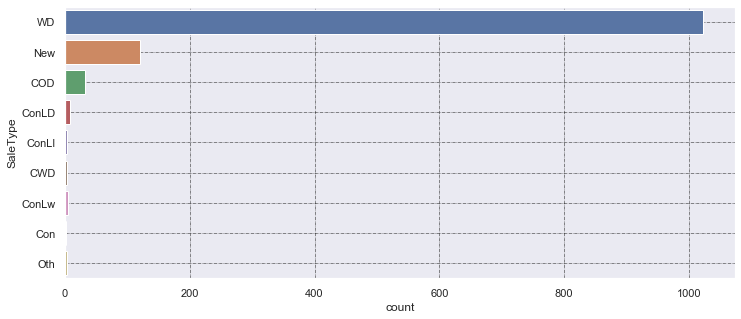

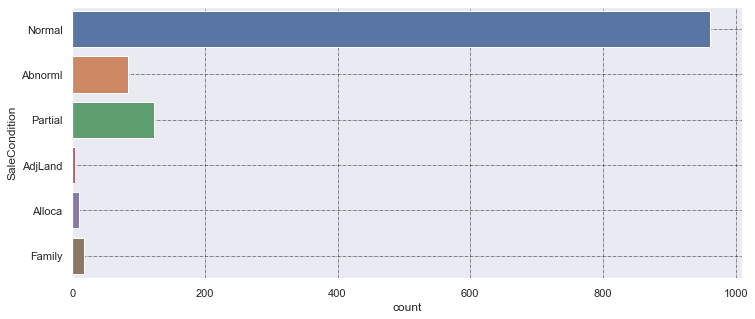

In [1171]:
for i,col in enumerate(cat_features.iloc[:,0:51].columns):
    #print(col)
    countplt(col)

#### Distributions of observations within categories

###### MSZoning
The general zoning classification

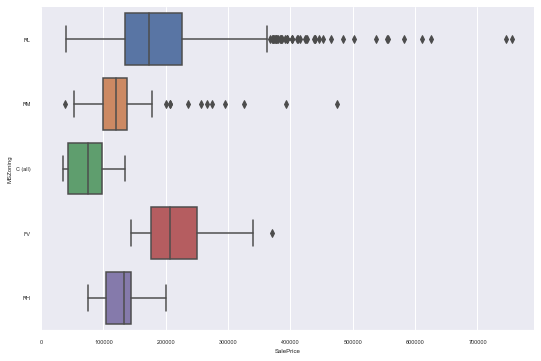

In [202]:
sns.catplot(x="SalePrice", y="MSZoning", kind='box',
            height=5, aspect=1.5,data=cat_features);

$$\textbf{Comments:}$$ On the average, the sale price of a House in zone $FV$ is the most expensive, which is followed by the zone $RL$. Meanwhile, the sale price of a house in the zone $C$ is the cheapest. This, one with a limited budget should buy a House in the zone $C$. This is very surprising because the zone $C$ is to belong to the commercial area, but the cheapest sale price of a House in Boston. On the other hand, the price of a House in zone $RL$ has the highest number of outliers which is followed by the zone $RM$. 

plt.figure(figsize=(25, 38))
for i, colum in enumerate(cat_features.iloc[:, 0:44].columns):
    plt.subplot(11,4,i+1)
    #sns.countplot(y=, data=cat_features,orient='h', color='green');
    sns.catplot(x=colum, y="SalePrice", kind='box', data=cat_features);

####  Statistical estimation within categories

In [203]:
cat_features.head()

MSSubClass MSZoning Street    Alley LotShape LandContour Utilities  \
0         60       RL   Pave  NoAlley      Reg         Lvl    AllPub   
1         20       RL   Pave  NoAlley      Reg         Lvl    AllPub   
2         60       RL   Pave  NoAlley      IR1         Lvl    AllPub   
3         70       RL   Pave  NoAlley      IR1         Lvl    AllPub   
4         60       RL   Pave  NoAlley      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood  ... GarageCond PavedDrive  PoolQC  \
0    Inside       Gtl      CollgCr  ...         TA          Y  NoPool   
1       FR2       Gtl      Veenker  ...         TA          Y  NoPool   
2    Inside       Gtl      CollgCr  ...         TA          Y  NoPool   
3    Corner       Gtl      Crawfor  ...         TA          Y  NoPool   
4       FR2       Gtl      NoRidge  ...         TA          Y  NoPool   

     Fence MiscFeature MoSold YrSold SaleType SaleCondition SalePrice  
0  NoFence     Nothing      2   2008       WD        Normal    208500  
1  NoFence     Nothing      5   2007       WD        Normal    181500  
2  NoFence     Nothing      9   2008       WD        Normal    223500  
3  NoFence     Nothing      2   2006       WD       Abnorml    140000  
4  NoFence     Nothing     12   2008       WD        Normal    250000  

[5 rows x 52 columns]

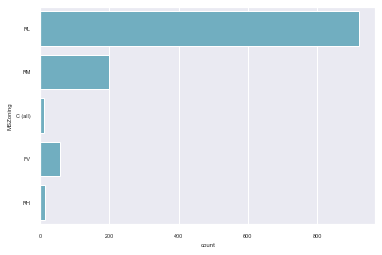

In [204]:
sns.countplot(y='MSZoning', data=cat_features, color="c");

In [205]:
cat_features.iloc[:, 0:43].columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

#### Unimodal Data Visualizations for all 43 categorical explanatory variables

Here I create a Loop routine to do that

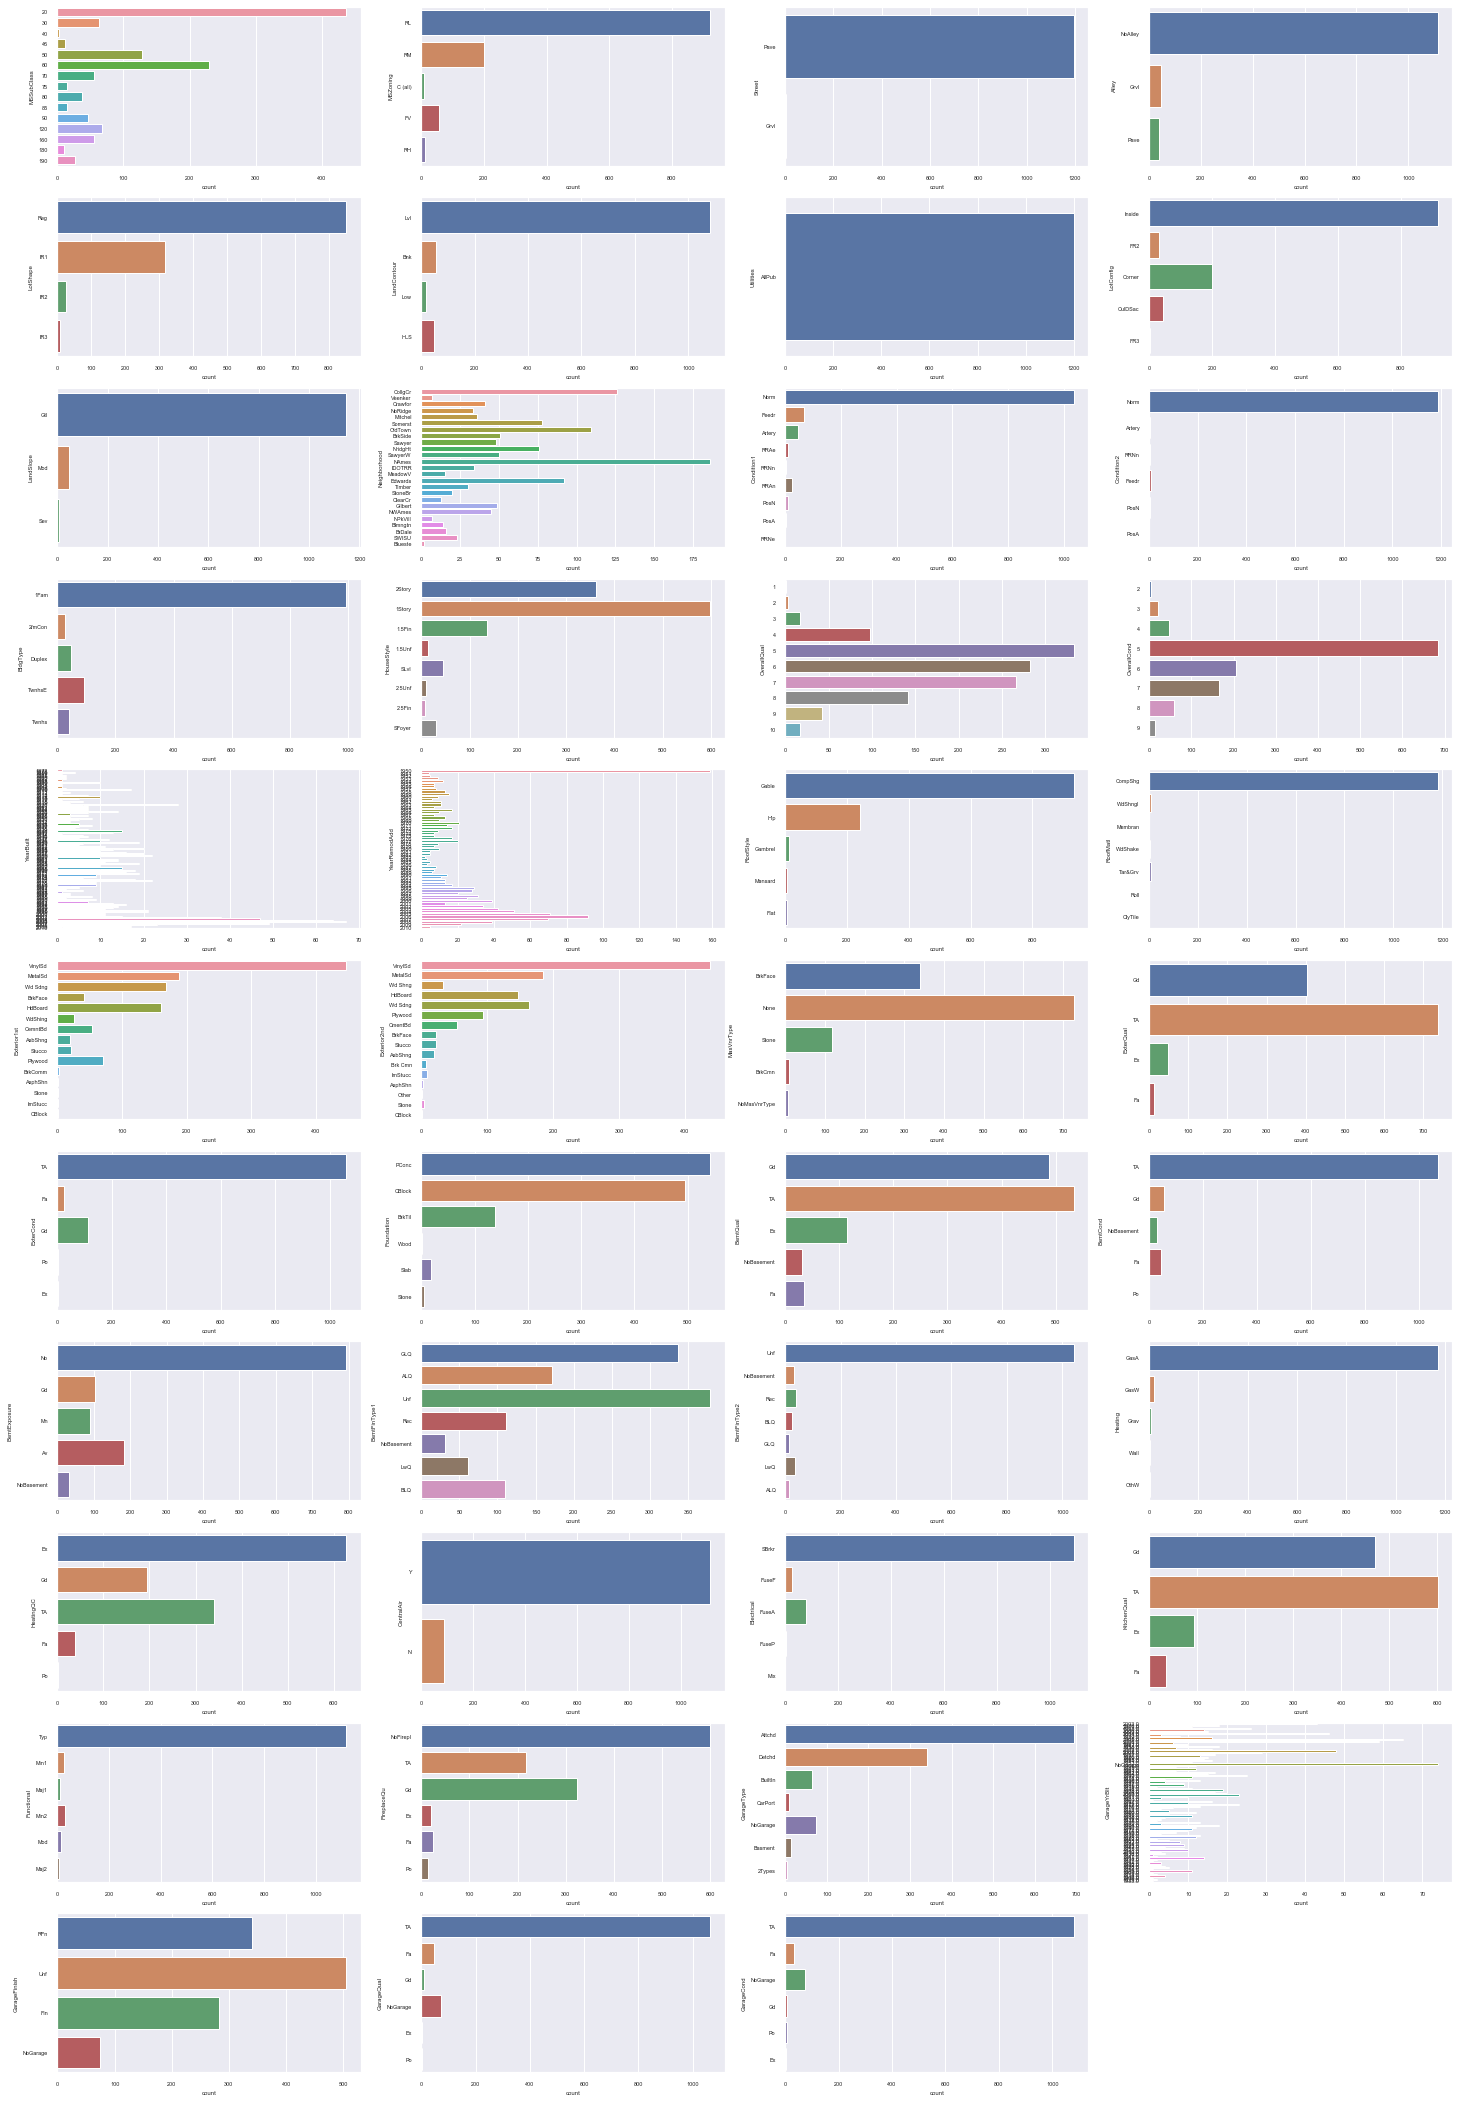

In [206]:
plt.figure(figsize=(25, 38))
for i, colum in enumerate(cat_features.iloc[:, 0:43].columns):
    plt.subplot(11,4,i+1)
    sns.countplot(y=colum, data=cat_features,orient='h')#, color='green');

In [207]:
cat_features.iloc[:, 0:44].shape

(1201, 44)

In [208]:
cat_features_dum=pd.get_dummies(cat_features.iloc[:, 0:43])
cat_features_dum.shape

(1201, 532)

In [209]:
cat_features_dum.columns

Index(['MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45',
       'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75',
       'MSSubClass_80', 'MSSubClass_85',
       ...
       'GarageQual_Gd', 'GarageQual_NoGarage', 'GarageQual_Po',
       'GarageQual_TA', 'GarageCond_Ex', 'GarageCond_Fa', 'GarageCond_Gd',
       'GarageCond_NoGarage', 'GarageCond_Po', 'GarageCond_TA'],
      dtype='object', length=532)

In [210]:
cat_features_dum['SalePrice']=cat_features['SalePrice']
print(cat_features_dum.shape)
print(cat_features_dum.columns)

(1201, 533)
Index(['MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45',
       'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75',
       'MSSubClass_80', 'MSSubClass_85',
       ...
       'GarageQual_NoGarage', 'GarageQual_Po', 'GarageQual_TA',
       'GarageCond_Ex', 'GarageCond_Fa', 'GarageCond_Gd',
       'GarageCond_NoGarage', 'GarageCond_Po', 'GarageCond_TA', 'SalePrice'],
      dtype='object', length=533)


fs_cat=FeatureSelector(data=cat_features_dum,labels=cat_features_dum)
fs_cat.identify_collinear(correlation_threshold=0.40)

$$\textbf{Comments 1:}$$ $$\textbf{Neighborhood}$$

We see that the Neighborhood of NridghHt has a positive correlation of 40 % with the Sale Price. It is not surprising since the sale price of a House located in this area is the highest among areas in Boston as shown the Figure below.

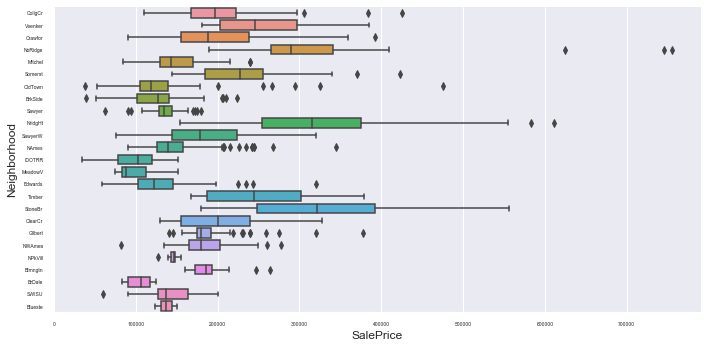

In [1500]:
#plt.figure(figsize=(20, 25))
#plt.subplot(1,2,1)
sns.catplot(y="Neighborhood", x="SalePrice", kind='box', height=5,aspect=2, data=cat_features);
#plt.subplot(1,2,2)
#sns.catplot(y="Neighborhood", x="SalePrice", kind='violin',height=7,  data=cat_features);
#sns.countplot(y="Neighborhood", data=cat_features,orient='h', color='green');

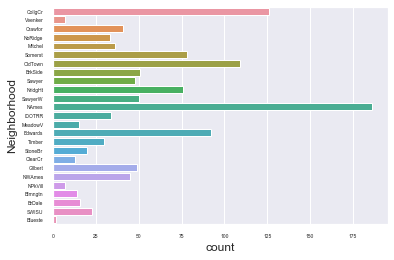

In [1501]:
sns.countplot(y="Neighborhood", orient='h',data=cat_features);

$$\textbf{Comments 2:}$$  $$\textbf{ExterQual (Exterior material quality)}$$

We see that the ExterQual with Ex and Gd has a positive correlation of over 45 % with the Sale Price. Whereas, the ExterQual with TA has a negative correlation of over 58 % with the Sale Price. It is not surprising since as shown the Figures below, Boston has a small number of Houses with the excellent-ranked Exterior material quality, but the sale price of these houses is the highest in Boston which is fllowed by Houses with the Good-ranked Exterior material quality. Furthermore, a number of these houses with the Good-ranked Exterior material quality account for a notable proportion.  On the other hand, Boston has the highest number of House with the TA-ranked Exterior material quality, but the sale price of these House is almost cheapest in Boston.



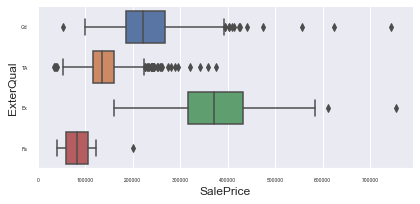

In [1502]:
sns.catplot(y="ExterQual", x="SalePrice", kind='box', 
            height=3,aspect=2, data=cat_features);

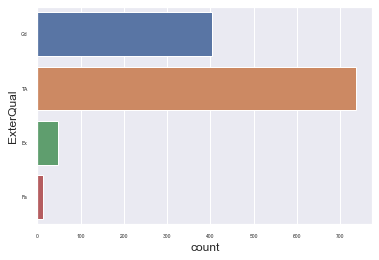

In [1503]:
sns.countplot(y="ExterQual", orient='h', data=cat_features);#color='green',

 Next task is to determine which categorical explanatory variables have a high correlation with the Sale Price

### Scatter Plot Matrix
A scatter plot shows the relationship between two variables. It also show the histogram and density of each attribute. In general, a scatter plot is very powerful to quickly show the relationship between variables. However, once the dataset contains a huge number of attributes. Then, one has a difficulty to see the relationship between variables from this scatter plot matrix. For further detail, let's see examples below. I use two different functions to create a Scatter Plot Matrix.


In [ ]:
#plt.figure(figsize=(8,55))
scatter_matrix(used_data.iloc[:,1:81],diagonal='kde',figsize=(25, 35))
pyplot.show()

 Try to use the $pairplot()$ function in seaborn
https://seaborn.pydata.org/generated/seaborn.pairplot.html

https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

In [540]:
#sns.pairplot(used_data.iloc[:,70:81],kind='reg', diag_kind='kde')

# Preparing Data for Training Machine Learning
Many machine learning algorithms make assumptions about data. It is often a very good
idea to prepare data in such way to best expose the structure of the problem to the machine
learning algorithms that we intend to use. Four techniques are typically used for that purpose

1. Rescale data.

2. Standardize data.

3. Normalize data.

4. Binarize data.

## Standardize data

In [211]:
print(len(used_data.loc[:,used_data.dtypes==np.int64].columns))
print(used_data.loc[:,used_data.dtypes==np.int64].columns)
print(len(used_data.loc[:,used_data.dtypes==np.float64].columns))
print(used_data.loc[:,used_data.dtypes==np.float64].columns)

28
Index(['Id', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice'],
      dtype='object')
2
Index(['LotFrontage', 'MasVnrArea'], dtype='object')


In [212]:
#used_data_thu = used_data.loc[:,used_data.dtypes==np.int64].astype('float64')
used_data[used_data.loc[:,used_data.dtypes==np.int64].columns] =used_data[used_data.loc[:,used_data.dtypes==np.int64].columns].astype('float64')

In [214]:
used_data.iloc[:,1:80].columns#.shape#columns#head(5)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [1518]:
X=used_data.iloc[:,1:80]
X.head()

MSSubClass MSZoning  LotFrontage    LotArea Street    Alley LotShape  \
0         60       RL      65.0000  8450.0000   Pave  NoAlley      Reg   
1         20       RL      80.0000  9600.0000   Pave  NoAlley      Reg   
2         60       RL      68.0000 11250.0000   Pave  NoAlley      IR1   
3         70       RL      60.0000  9550.0000   Pave  NoAlley      IR1   
4         60       RL      84.0000 14260.0000   Pave  NoAlley      IR1   

  LandContour Utilities LotConfig  ... ScreenPorch PoolArea  PoolQC    Fence  \
0         Lvl    AllPub    Inside  ...      0.0000   0.0000  NoPool  NoFence   
1         Lvl    AllPub       FR2  ...      0.0000   0.0000  NoPool  NoFence   
2         Lvl    AllPub    Inside  ...      0.0000   0.0000  NoPool  NoFence   
3         Lvl    AllPub    Corner  ...      0.0000   0.0000  NoPool  NoFence   
4         Lvl    AllPub       FR2  ...      0.0000   0.0000  NoPool  NoFence   

  MiscFeature MiscVal MoSold YrSold SaleType SaleCondition  
0     Nothing  0.0000      2   2008       WD        Normal  
1     Nothing  0.0000      5   2007       WD        Normal  
2     Nothing  0.0000      9   2008       WD        Normal  
3     Nothing  0.0000      2   2006       WD       Abnorml  
4     Nothing  0.0000     12   2008       WD        Normal  

[5 rows x 79 columns]

In [1519]:
X.loc[:,X.dtypes==np.float64].head()

LotFrontage    LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0      65.0000  8450.0000    196.0000    706.0000      0.0000   150.0000   
1      80.0000  9600.0000      0.0000    978.0000      0.0000   284.0000   
2      68.0000 11250.0000    162.0000    486.0000      0.0000   434.0000   
3      60.0000  9550.0000      0.0000    216.0000      0.0000   540.0000   
4      84.0000 14260.0000    350.0000    655.0000      0.0000   490.0000   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  Fireplaces  GarageCars  \
0     856.0000  856.0000  854.0000        0.0000  ...      0.0000      2.0000   
1    1262.0000 1262.0000    0.0000        0.0000  ...      1.0000      2.0000   
2     920.0000  920.0000  866.0000        0.0000  ...      1.0000      2.0000   
3     756.0000  961.0000  756.0000        0.0000  ...      1.0000      3.0000   
4    1145.0000 1145.0000 1053.0000        0.0000  ...      1.0000      3.0000   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0    548.0000      0.0000      61.0000         0.0000     0.0000       0.0000   
1    460.0000    298.0000       0.0000         0.0000     0.0000       0.0000   
2    608.0000      0.0000      42.0000         0.0000     0.0000       0.0000   
3    642.0000      0.0000      35.0000       272.0000     0.0000       0.0000   
4    836.0000    192.0000      84.0000         0.0000     0.0000       0.0000   

   PoolArea  MiscVal  
0    0.0000   0.0000  
1    0.0000   0.0000  
2    0.0000   0.0000  
3    0.0000   0.0000  
4    0.0000   0.0000  

[5 rows x 28 columns]

In [1520]:
scaler = StandardScaler().fit(X.loc[:,X.dtypes==np.float64])
rescaledX = scaler.transform(X.loc[:,X.dtypes==np.float64])

In [1521]:
rescaledX.shape#[0:1,:] 

(1201, 28)

In [1522]:
print(len(X.loc[:,X.dtypes==np.float64].columns))
print(X.loc[:,X.dtypes==np.float64].columns)

28
Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')


In [1523]:
rescaledX[0:2,0:4]

array([[-0.20803433, -0.18958317,  0.50465018,  0.60064398],
       [ 0.40989452, -0.04440048, -0.55559234,  1.18635088]])

In [1524]:
used_X=pd.DataFrame(data=rescaledX,index=None,
                   columns=X.loc[:,X.dtypes==np.float64].columns)
used_X.iloc[:,0:4] .head(2)

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1
0      -0.2080  -0.1896      0.5047      0.6006
1       0.4099  -0.0444     -0.5556      1.1864

In [1525]:
used_X.shape

(1201, 28)

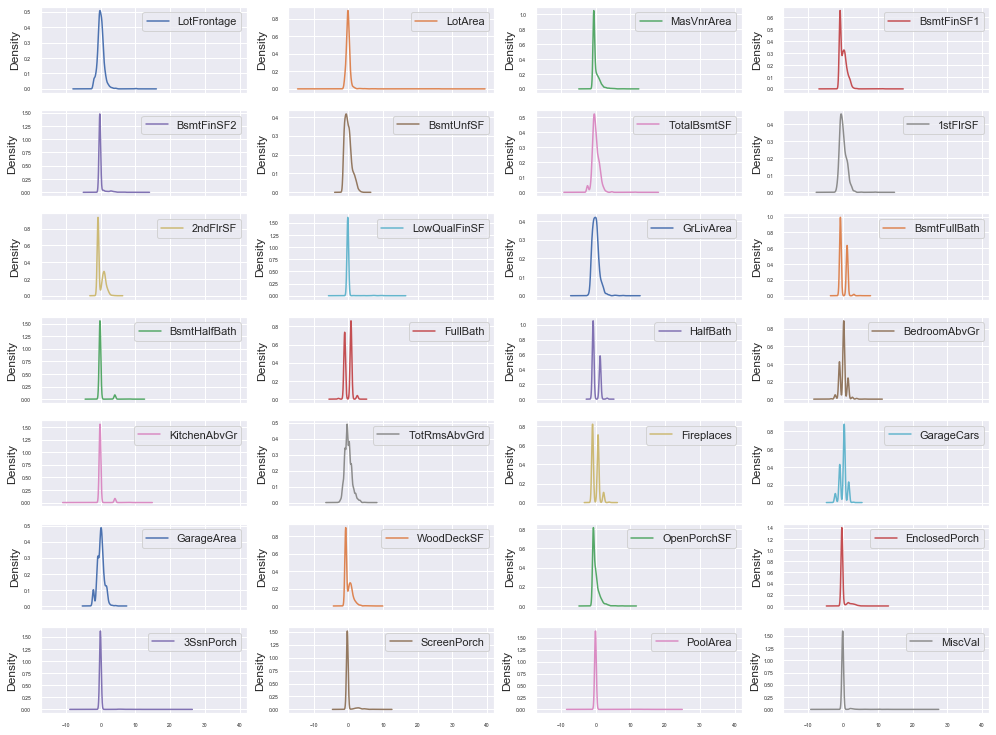

In [1526]:
used_X.plot(kind='density', subplots=True,
             layout=(7,4),figsize=(17,13),sharex=True)   
plt.show()

$$\textbf{Comments:}$$ The 28 numerical explanatory variables have mean of zero and standard deviation of 1

In [1527]:
used_X.describe()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
count    1201.0000 1201.0000   1201.0000   1201.0000   1201.0000  1201.0000   
mean       -0.0000   -0.0000      0.0000     -0.0000     -0.0000     0.0000   
std         1.0004    1.0004      1.0004      1.0004      1.0004     1.0004   
min        -2.0206   -1.0922     -0.5556     -0.9196     -0.2783    -1.3140   
25%        -0.4552   -0.3196     -0.5556     -0.9196     -0.2783    -0.7678   
50%        -0.0433   -0.0871     -0.5556     -0.1616     -0.2783    -0.1858   
75%         0.4099    0.1638      0.3099      0.5662     -0.2783     0.5433   
max        10.0084   25.9174      8.0994     11.2338      9.2665     3.8943   

       TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  Fireplaces  \
count    1201.0000 1201.0000 1201.0000     1201.0000  ...   1201.0000   
mean        0.0000   -0.0000   -0.0000       -0.0000  ...      0.0000   
std         1.0004    1.0004    1.0004        1.0004  ...      1.0004   
min        -2.3641   -2.1353   -0.7956       -0.1290  ...     -0.9105   
25%        -0.6145   -0.7315   -0.7956       -0.1290  ...     -0.9105   
50%        -0.1548   -0.1980   -0.7956       -0.1290  ...      0.6812   
75%         0.5570    0.5816    0.8781       -0.1290  ...      0.6812   
max        11.2707    9.1520    3.9519       11.0135  ...      3.8647   

       GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count   1201.0000   1201.0000   1201.0000    1201.0000      1201.0000   
mean      -0.0000      0.0000     -0.0000       0.0000         0.0000   
std        1.0004      1.0004      1.0004       1.0004         1.0004   
min       -2.2688     -2.1370     -0.7420      -0.6957        -0.3688   
25%       -0.9829     -0.7393     -0.7420      -0.6957        -0.3688   
50%        0.3030      0.0342     -0.7420      -0.3324        -0.3688   
75%        0.3030      0.4775      0.6541       0.3035        -0.3688   
max        2.8748      4.2770      6.3799       7.5858         8.5873   

       3SsnPorch  ScreenPorch  PoolArea   MiscVal  
count  1201.0000    1201.0000 1201.0000 1201.0000  
mean      0.0000       0.0000   -0.0000    0.0000  
std       1.0004       1.0004    1.0004    1.0004  
min      -0.1087      -0.2685   -0.0705   -0.1344  
25%      -0.1087      -0.2685   -0.0705   -0.1344  
50%      -0.1087      -0.2685   -0.0705   -0.1344  
75%      -0.1087      -0.2685   -0.0705   -0.1344  
max      17.5528       8.3086   16.6095   18.3155  

[8 rows x 28 columns]

###### Adding other explanatory variables

In [1528]:
used_data.loc[:,used_data.dtypes==np.object].shape

(1201, 51)

In [1529]:
used_X.shape

(1201, 28)

In [1530]:
#used_X=pd.concat([used_X, X.loc[:,X.dtypes==np.object]],sort=True)
used_X[used_data.loc[:,used_data.dtypes==np.object].columns]=used_data.loc[:,used_data.dtypes==np.object]

In [1531]:
print(used_X.shape)
#used_X1.head(5)

(1201, 79)


In [1532]:
used_X.head(3)

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0      -0.2080  -0.1896      0.5047      0.6006     -0.2783    -0.9796   
1       0.4099  -0.0444     -0.5556      1.1864     -0.2783    -0.6808   
2      -0.0844   0.1639      0.3207      0.1269     -0.2783    -0.3464   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  GarageQual  GarageCond  \
0      -0.4539   -0.7833    1.1677       -0.1290  ...          TA          TA   
1       0.4521    0.2682   -0.7956       -0.1290  ...          TA          TA   
2      -0.3110   -0.6176    1.1953       -0.1290  ...          TA          TA   

   PavedDrive  PoolQC    Fence  MiscFeature  MoSold  YrSold  SaleType  \
0           Y  NoPool  NoFence      Nothing       2    2008        WD   
1           Y  NoPool  NoFence      Nothing       5    2007        WD   
2           Y  NoPool  NoFence      Nothing       9    2008        WD   

   SaleCondition  
0         Normal  
1         Normal  
2         Normal  

[3 rows x 79 columns]

## Creating Dummny Variable

In [1533]:
used_X_transdum=pd.get_dummies(used_X)
used_X_transdum.shape

(1201, 596)

In [218]:
used_X_transdum.head(5)

NameError: name 'used_X_transdum' is not defined

In [1535]:
used_X_transdum.describe()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
count    1201.0000 1201.0000   1201.0000   1201.0000   1201.0000  1201.0000   
mean       -0.0000   -0.0000      0.0000     -0.0000     -0.0000     0.0000   
std         1.0004    1.0004      1.0004      1.0004      1.0004     1.0004   
min        -2.0206   -1.0922     -0.5556     -0.9196     -0.2783    -1.3140   
25%        -0.4552   -0.3196     -0.5556     -0.9196     -0.2783    -0.7678   
50%        -0.0433   -0.0871     -0.5556     -0.1616     -0.2783    -0.1858   
75%         0.4099    0.1638      0.3099      0.5662     -0.2783     0.5433   
max        10.0084   25.9174      8.0994     11.2338      9.2665     3.8943   

       TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  SaleType_ConLw  \
count    1201.0000 1201.0000 1201.0000     1201.0000  ...       1201.0000   
mean        0.0000   -0.0000   -0.0000       -0.0000  ...          0.0042   
std         1.0004    1.0004    1.0004        1.0004  ...          0.0644   
min        -2.3641   -2.1353   -0.7956       -0.1290  ...          0.0000   
25%        -0.6145   -0.7315   -0.7956       -0.1290  ...          0.0000   
50%        -0.1548   -0.1980   -0.7956       -0.1290  ...          0.0000   
75%         0.5570    0.5816    0.8781       -0.1290  ...          0.0000   
max        11.2707    9.1520    3.9519       11.0135  ...          1.0000   

       SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
count     1201.0000     1201.0000    1201.0000              1201.0000   
mean         0.0833        0.0025       0.6986                 0.0583   
std          0.2764        0.0499       0.4591                 0.2344   
min          0.0000        0.0000       0.0000                 0.0000   
25%          0.0000        0.0000       0.0000                 0.0000   
50%          0.0000        0.0000       1.0000                 0.0000   
75%          0.0000        0.0000       1.0000                 0.0000   
max          1.0000        1.0000       1.0000                 1.0000   

       SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
count              1201.0000             1201.0000             1201.0000   
mean                  0.0033                0.0083                0.0125   
std                   0.0576                0.0909                0.1111   
min                   0.0000                0.0000                0.0000   
25%                   0.0000                0.0000                0.0000   
50%                   0.0000                0.0000                0.0000   
75%                   0.0000                0.0000                0.0000   
max                   1.0000                1.0000                1.0000   

       SaleCondition_Normal  SaleCondition_Partial  
count             1201.0000              1201.0000  
mean                 0.6570                 0.0858  
std                  0.4749                 0.2801  
min                  0.0000                 0.0000  
25%                  0.0000                 0.0000  
50%                  1.0000                 0.0000  
75%                  1.0000                 0.0000  
max                  1.0000                 1.0000  

[8 rows x 596 columns]

In [1536]:
used_X_transdum.iloc[:,0:28].isnull().sum()

LotFrontage      0
LotArea          0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
dtype: int64

## Target Feature

In [1537]:
Y=used_data['SalePrice']
Y.head()

0   208500.0000
1   181500.0000
2   223500.0000
3   140000.0000
4   250000.0000
Name: SalePrice, dtype: float64

In [1538]:
Y=Y.values
Y[0:1]

array([208500.])

It is worth noting that the dataset still exist the missing values. In particular, the explanatory variable, LotFrontage, has 259 missing values. Indeed, these missing values account for 17.74 percent. Thus, I expect that machine learning does not work with this dataset

# Feature Selection

In [1540]:
name_feature=used_X_transdum.columns
name_feature

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=596)

In [1541]:
examined_X=used_X_transdum.values
examined_X[0:1,:]

array([[-0.20803433, -0.18958317,  0.50465018,  0.60064398, -0.27828851,
        -0.97956203, -0.45386164, -0.78332244,  1.16774898, -0.12897869,
         0.3754291 ,  1.13739379, -0.23178246,  0.78554689,  1.26144243,
         0.16862347, -0.22224649,  0.89912611, -0.91051459,  0.30300689,
         0.34175408, -0.7420147 ,  0.22779222, -0.36880624, -0.10867128,
        -0.26854102, -0.07051373, -0.13436972,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0. 

## Principle Component Analysis



In [1619]:
len(name_feature)

596

In [1662]:
def pca_feature_select(X,title_contrib,figsize,
                       figsize_top,top_threshold,
                      title_pca_top):
    """
    ----------
    I. Input:
    ----------
    1. X: All explanatory variables, such as used_X_transdum
    2. num_component: integer such as 28
    3. title_contrib: string such as 'The PCA-based explained variance by explanatory variables'
    4. figsize: such as (10,5)
    5. figsize_top: such as (10,7)
    6. top_threshold: such as 10, 20, or 50 etc
    7. title_pca_top: string such as'Top Ten Contributors'
    ----------
    II. Ouput:
    ----------
    pca_selection: a Pandas Dataframe reports the pca_based contributions of feature
    """
    from sklearn.decomposition import PCA
    # Handling data
    examined_X=X.values
    name_feature=X.columns
    num_component=len(name_feature)
    # Configuring the PCA algorithm
    pca = PCA(n_components=num_component)
    # Fitting the data
    fit_pca = pca.fit(examined_X)
    # Recording the result pca_based_contribution=pca_explained_variance
    explained_variance_pca= fit_pca.explained_variance_ratio_
    pca_select=pd.DataFrame(data={'Feature':name_feature,
                                  'pca_based_contribution':explained_variance_pca})
    pca_select=pca_select.set_index(['Feature'])
    # Plotting
    plt_contrib_feature(pca_select['pca_based_contribution'],title_contrib)
    #fig, ax=plt.subplots(figsize=figsize)
    #plt.barh(pca_select['pca_based_contribution'].sort_values(ascending=True).index,
    #     100*pca_select['pca_based_contribution'].sort_values(ascending=True))
    #plt.autoscale(enable=True, axis='both',tight=True)
    #plt.title(title_pca,fontsize=13, fontweight='bold')
    #plt.ylabel('The explanatory variables',fontsize=12)
    #plt.xlabel('The contribution (%)', fontsize=15)
    #plt.grid(which='major',linestyle=':',linewidth=0.9)
    #for i,v in enumerate(round(100*pca_select['pca_based_contribution'].sort_values(ascending=True),2)):
    #    ax.text(v , i-0.15 , str(v), color='blue')#, fontweight='bold') 
    # Plot top N largest contributions
    fig,ax=plt.subplots(figsize=figsize_top)
    plt.barh(pca_select['pca_based_contribution'].head(top_threshold).sort_values(ascending=True).index,
         100*pca_select['pca_based_contribution'].head(top_threshold).sort_values(ascending=True))
    plt.autoscale(enable=True, axis='both',tight=True)
    plt.title(title_pca_top,fontsize=13, fontweight='bold')
    plt.ylabel('The explanatory variables',fontsize=12)
    plt.xlabel('The contribution (%)', fontsize=15)
    plt.grid(which='major',linestyle=':',linewidth=0.9)
    for i,v in enumerate(round(100*pca_select['pca_based_contribution'].head(top_threshold).sort_values(ascending=True),2)):
        ax.text(v , i-0.15 , str(v), color='blue')#, fontweight='bold')
    
    pca_selection=100*pca_select.sort_values('pca_based_contribution',ascending=False)
    
    return pca_selection; 

KeyError: 'feature_importance'

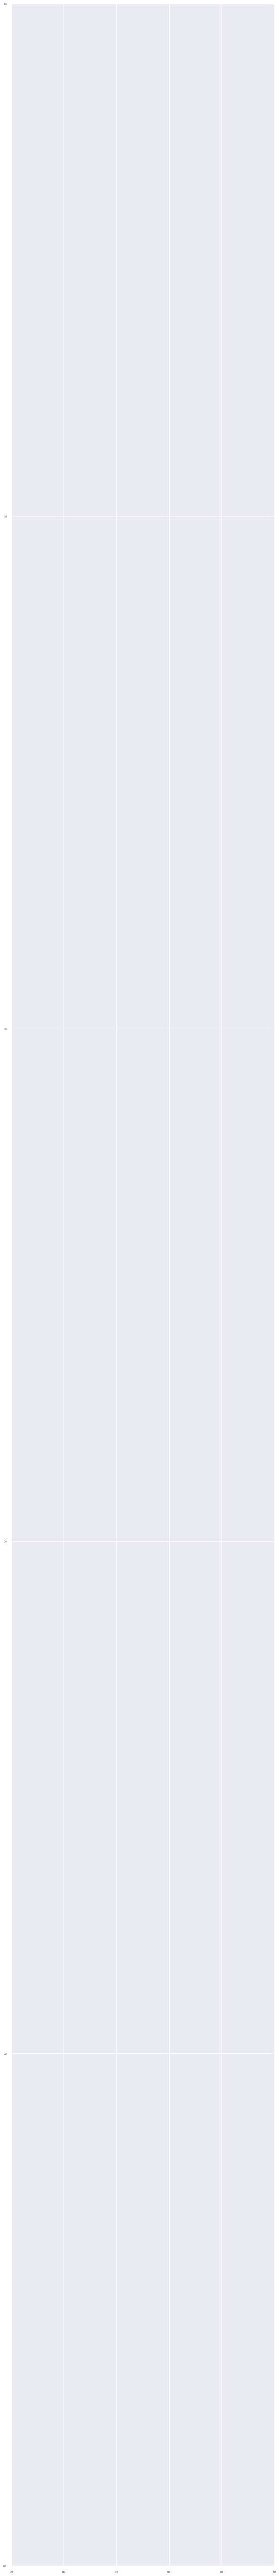

In [1663]:
pca_result=pca_feature_select(used_X_transdum,
                              title_contrib='The PCA-based Contribution of explanatory variables',
                              figsize=(10,100),
                             figsize_top=(10,6),
                              top_threshold=30,
                      title_pca_top='The PCA_based Top 30 Contributors')

In [1659]:
pca_result

pca_based_contribution
Feature                                      
LotFrontage                           12.0097
LotArea                                8.5923
MasVnrArea                             5.8505
BsmtFinSF1                             4.3875
BsmtFinSF2                             3.9246
...                                       ...
GarageCond_Po                          0.0000
GarageCond_NoGarage                    0.0000
GarageCond_Gd                          0.0000
GarageCond_Fa                          0.0000
SaleCondition_Partial                  0.0000

[596 rows x 1 columns]

In [1594]:
from sklearn.decomposition import PCA

# Configure algorithm to choose eveleven variables
pca = PCA(n_components=28)
# Fitting data
fit_pca = pca.fit(examined_X)

name_feature[1:28]#.shape

# Recoding the result
explained_variance_pca= fit_pca.explained_variance_ratio_
explained_variance_pca.shape

# Creating a new pandas dataframe
pca_select=pd.DataFrame(data={'Feature':name_feature[1:29],'explained_variance':explained_variance_pca})
# set the Feature column as index
pca_select=pca_select.set_index(['Feature'])
pca_select

# Plotting
fig, ax=plt.subplots(figsize=(10,5)) 
plt.barh(pca_select['explained_variance'].sort_values(ascending=True).index,
         100*pca_select['explained_variance'].sort_values(ascending=True))
plt.autoscale(enable=True, axis='both',tight=True)
plt.title('The PCA-based explained variance by explanatory variables',
        fontsize=13, fontweight='bold')
plt.ylabel('The explanatory variables',fontsize=15)
plt.xlabel('The variance (%)', fontsize=15)
plt.grid(which='major',linestyle=':',linewidth=0.9)
#plt.xticks([0,1,2,3,4])
for i,v in enumerate(round(100*pca_select['explained_variance'].sort_values(ascending=True),2)):
    ax.text(v , i-0.15 , str(v), color='blue')#, fontweight='bold')  

## Ensemble Methods



In [663]:
print(examined_X[0:1,0:2])
print(Y[0:1])


[[-0.20803433 -0.18958317]]
[208500.]


In [1672]:
def ensemble_feature_selection(used_X,X,Y,method,no_estimators,title_contrib,
                      top_contrib,title_top_contrib,
                     threshold_cum,title_cum):
    """
    This program is to choose the feature by using ensemble methods. They are 
    both bagging and boosting algorithms. In particular, in terms of bagging algorithm, they are
    1. Random Forest
    2. Extra Trees.
    On the other hand, boosting algorithm, two algorithms:
    1. Adaptive Boosting.
    2. Gradients Boosting.
    Copyright @ Phuong Van Phuong
    Email: phuong.nguyen@economics.uni-kiel.de
    used_X: pandas dataframe of all explanatory features
    method: 'ExtraTreesReg'
    n_estimators: a number of estimator
    title_contrib:'The bagged decision tree-based importance of explanatory variables'
    top_contrib: integer such as 10, 20, 30 etc
    title_top_contrib:'The Top Ten Important Explanatory Variables'
    threshold_cum: integer such as 80, 90, 99
    title_cum:'Cumulative Feature Importance'
    """
    name_feature=used_X.columns
    #Bagging Methods
    ## ExtraTrees
    ### ExtraTreesRegressor
    if method=='ExtraTreesReg':
        model_ETR=ExtraTreesRegressor(n_estimators=no_estimators)
        model_ETR.fit(X, Y)
        ETR_feature_importances=model_ETR.feature_importances_
        ETR_selection=pd.DataFrame(data={'Feature':name_feature,
                                      'feature_importance':ETR_feature_importances})
        ETR_selection=ETR_selection.set_index(['Feature'])
        # plot contributions of all explanatory variables
        plt_contrib_feature(ETR_selection,title_contrib)
        #
        pd.options.display.float_format = '{:.4f}'.format
        ETR_selection_temp=100*ETR_selection.sort_values('feature_importance',ascending=False)
        ETR_selection_temp['cumulative_importance']=np.cumsum(ETR_selection_temp,axis=0)
        ETR_select_cum=ETR_selection_temp#1[ETR_select1['cumulative_importance']<99]
        # plot top N contributors
        plt_top_contrib(ETR_select_cum,top_contrib,title_top_contrib)
        #
        importance_index=plt_cum(ETR_select_cum,threshold_cum,title_cum)
        print('ExtraTreesRegressor indicates %d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold_cum))
        return ETR_select_cum;  
    
    ### ExtraTreesClassifier
    if method=='ExtraTreesClass':
        model_ETC=ExtraTreesClassifier(n_estimators=no_estimators)
        model_ETC.fit(X, Y)
        ETC_feature_importances=model_ETC.feature_importances_
        ETC_selection=pd.DataFrame(data={'Feature':name_feature,
                                      'feature_importance':ETC_feature_importances})
        ETC_selection=ETC_selection.set_index(['Feature'])
        # plot contributions of all explanatory variables
        plt_contrib_feature(ETC_selection,title_contrib)
        #
        pd.options.display.float_format = '{:.4f}'.format
        ETC_selection_temp=100*ETC_selection.sort_values('feature_importance',ascending=False)
        ETC_selection_temp['cumulative_importance']=np.cumsum(ETR_selection_temp,axis=0)
        ETC_select_cum=ETC_selection_temp#1[ETR_select1['cumulative_importance']<99]
        # plot top N contributors
        plt_top_contrib(ETC_select_cum,top_contrib,title_top_contrib)
        #
        importance_index=plt_cum(ETC_select_cum,threshold_cum,title_cum)
        print('ExtraTreesClassifier indicates %d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold_cum))
        return ETC_select_cum;  
    ## RandomForest
    ### RandomForestRegressor
    if method=='RandomForestReg':
        model_RFR=RandomForestRegressor(n_estimators=no_estimators)
        model_RFR.fit(X, Y)
        RFR_feature_importances=model_RFR.feature_importances_
        RFR_selection=pd.DataFrame(data={'Feature':name_feature,
                                      'feature_importance':RFR_feature_importances})
        RFR_selection=RFR_selection.set_index(['Feature'])
        # plot contributions of all explanatory variables
        plt_contrib_feature(RFR_selection,title_contrib)
        #
        pd.options.display.float_format = '{:.4f}'.format
        RFR_selection_temp=100*RFR_selection.sort_values('feature_importance',ascending=False)
        RFR_selection_temp['cumulative_importance']=np.cumsum(RFR_selection_temp,axis=0)
        RFR_select_cum=RFR_selection_temp#1[ETR_select1['cumulative_importance']<99]
        # plot top N contributors
        plt_top_contrib(RFR_select_cum,top_contrib,title_top_contrib)
        #
        importance_index=plt_cum(RFR_select_cum,threshold_cum,title_cum)
        print('RandomForestRegressor indicates %d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold_cum))
        return RFR_select_cum;  
    ### RandomForestClassifier
    if method=='RandomForestClass':
        model_RFC=RandomForestClassifier(n_estimators=no_estimators)
        model_RFC.fit(X, Y)
        RFC_feature_importances=model_RFC.feature_importances_
        RFC_selection=pd.DataFrame(data={'Feature':name_feature,
                                      'feature_importance':RFC_feature_importances})
        RFC_selection=RFC_selection.set_index(['Feature'])
        # plot contributions of all explanatory variables
        plt_contrib_feature(RFC_selection,title_contrib)
        #
        pd.options.display.float_format = '{:.4f}'.format
        RFC_selection_temp=100*RFC_selection.sort_values('feature_importance',ascending=False)
        RFC_selection_temp['cumulative_importance']=np.cumsum(RFC_selection_temp,axis=0)
        RFC_select_cum=RFC_selection_temp#1[ETR_select1['cumulative_importance']<99]
        # plot top N contributors
        plt_top_contrib(RFC_select_cum,top_contrib,title_top_contrib)
        #
        importance_index=plt_cum(RFC_select_cum,threshold_cum,title_cum)
        print('RandomForestRegressor indicates %d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold_cum))
        return RFC_select_cum;  
    
    # Boosting Methods
    ## AdaBoost
    ### AdaBoostRegressor
    if method=='AdaBoostReg':
        model_ABR=AdaBoostRegressor(n_estimators=no_estimators)
        model_ABR.fit(X, Y)
        ABR_feature_importances=model_ABR.feature_importances_
        ABR_selection=pd.DataFrame(data={'Feature':name_feature,
                                      'feature_importance':ABR_feature_importances})
        ABR_selection=ABR_selection.set_index(['Feature'])
        # plot contributions of all explanatory variables
        plt_contrib_feature(ABR_selection,title_contrib)
        #
        pd.options.display.float_format = '{:.4f}'.format
        ABR_selection_temp=100*ABR_selection.sort_values('feature_importance',ascending=False)
        ABR_selection_temp['cumulative_importance']=np.cumsum(ABR_selection_temp,axis=0)
        ABR_select_cum=ABR_selection_temp#1[ETR_select1['cumulative_importance']<99]
        # plot top N contributors
        plt_top_contrib(ABR_select_cum,top_contrib,title_top_contrib)
        #
        importance_index=plt_cum(ABR_select_cum,threshold_cum,title_cum)
        print('AdaBoostRegressor indicates %d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold_cum))
        return ABR_select_cum; 
    ### AdaBoostClassifier
    if method=='AdaBoostClass':
        model_ABC=AdaBoostClassifier(n_estimators=no_estimators)
        model_ABC.fit(X, Y)
        ABC_feature_importances=model_ABC.feature_importances_
        ABC_selection=pd.DataFrame(data={'Feature':name_feature,
                                      'feature_importance':ABC_feature_importances})
        ABC_selection=ABC_selection.set_index(['Feature'])
        # plot contributions of all explanatory variables
        plt_contrib_feature(ABC_selection,title_contrib)
        #
        pd.options.display.float_format = '{:.4f}'.format
        ABC_selection_temp=100*ABR_selection.sort_values('feature_importance',ascending=False)
        ABC_selection_temp['cumulative_importance']=np.cumsum(ABC_selection_temp,axis=0)
        ABC_select_cum=ABC_selection_temp#1[ETR_select1['cumulative_importance']<99]
        # plot top N contributors
        plt_top_contrib(ABC_select_cum,top_contrib,title_top_contrib)
        #
        importance_index=plt_cum(ABC_select_cum,threshold_cum,title_cum)
        print('AdaBoostClassifier indicates %d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold_cum))
        return ABC_select_cum; 
    ## GradientBoosting
    ### GradientBoostingRegressor
    if method=='GradientBoostingReg':
        model_GBR=GradientBoostingRegressor(n_estimators=no_estimators)
        model_GBR.fit(X, Y)
        GBR_feature_importances=model_GBR.feature_importances_
        GBR_selection=pd.DataFrame(data={'Feature':name_feature,
                                      'feature_importance':GBR_feature_importances})
        GBR_selection=GBR_selection.set_index(['Feature'])
        # plot contributions of all explanatory variables
        plt_contrib_feature(GBR_selection,title_contrib)
        #
        pd.options.display.float_format = '{:.4f}'.format
        GBR_selection_temp=100*GBR_selection.sort_values('feature_importance',ascending=False)
        GBR_selection_temp['cumulative_importance']=np.cumsum(GBR_selection_temp,axis=0)
        GBR_select_cum=GBR_selection_temp#1[ETR_select1['cumulative_importance']<99]
        # plot top N contributors
        plt_top_contrib(GBR_select_cum,top_contrib,title_top_contrib)
        #
        importance_index=plt_cum(GBR_select_cum,threshold_cum,title_cum)
        print('GradientBoostingRegressor indicates %d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold_cum))
        return GBR_select_cum; 
    ### GradientBoostingClassifier
    if method=='GradientBoostingClass':
        model_GBC=GradientBoostingClassifier(n_estimators=no_estimators)
        model_GBC.fit(X, Y)
        GBC_feature_importances=model_GBC.feature_importances_
        GBC_selection=pd.DataFrame(data={'Feature':name_feature,
                                      'feature_importance':GBC_feature_importances})
        GBC_selection=GBC_selection.set_index(['Feature'])
        # plot contributions of all explanatory variables
        plt_contrib_feature(GBC_selection,title_contrib)
        #
        pd.options.display.float_format = '{:.4f}'.format
        GBC_selection_temp=100*GBC_selection.sort_values('feature_importance',ascending=False)
        GBC_selection_temp['cumulative_importance']=np.cumsum(GBC_selection_temp,axis=0)
        GBC_select_cum=GBC_selection_temp#1[ETR_select1['cumulative_importance']<99]
        # plot top N contributors
        plt_top_contrib(GBC_select_cum,top_contrib,title_top_contrib)
        #
        importance_index=plt_cum(GBC_select_cum,threshold_cum,title_cum)
        print('GradientBoostingClassifier indicates %d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold_cum))
        return GBC_select_cum; 
    
    else: 
        print('Hello')



In [217]:
RFR_select_cum=ensemble_feature_selection(used_X_transdum,examined_X,
                                          Y,method='RandomForestReg',
                                          no_estimators=5,
                  title_contrib='The RandomForestRegressor-based importance of explanatory variables',
                      top_contrib=20,
                  title_top_contrib='The Top 20 Important Explanatory Variables (RandomForestRegressor)',
                     threshold_cum=99,
                  title_cum='Cumulative Feature Importance (RandomForestRegressor)')

NameError: name 'ensemble_feature_selection' is not defined

In [215]:
def plt_contrib_feature(data,title_contrib):
    """
    data:ETR_selection
    title_contrib:'The bagged decision tree-based importance of explanatory variables'
    """
    fig, ax=plt.subplots(figsize=(10,100)) 
    plt.barh(data['feature_importance'].sort_values(ascending=True).index,
         100*data['feature_importance'].sort_values(ascending=True))
    plt.autoscale(enable=True, axis='both',tight=True)
    plt.title(title_contrib,
        fontsize=13, fontweight='bold')
    plt.ylabel('The explanatory variables',fontsize=15)
    plt.xlabel('The contribution (%)', fontsize=15)
    plt.grid(which='major',linestyle=':',linewidth=0.9)
    for i,v in enumerate(round(100*data['feature_importance'].sort_values(ascending=True),2)):
            ax.text(v , i-0.15 , str(v), color='blue')#, fontweight='bold')  

def plt_top_contrib(data,top_contrib,title_top_contrib):
    """
    data:ETR_select_cum
    top_contrib: integer such as 10, 20, 30 etc
    title_top_contrib:'The Top Ten Important Explanatory Variables'
    """
    fig, ax=plt.subplots(figsize=(10,5)) 
    plt.barh(data['feature_importance'].head(top_contrib).sort_values(ascending=True).index,
         data['feature_importance'].head(top_contrib).sort_values(ascending=True))
    plt.autoscale(enable=True, axis='both',tight=True)
    plt.title(title_top_contrib,
        fontsize=13, fontweight='bold')
    plt.ylabel('The explanatory variables',fontsize=15)
    plt.xlabel('The contribution (%)', fontsize=15)
    plt.grid(which='major',linestyle=':',linewidth=0.9)
    for i,v in enumerate(round(data['feature_importance'].head(top_contrib).
                           sort_values(ascending=True),2)):
        ax.text(v , i-0.15 , str(v), color='blue')#, fontweight='bold')  

def plt_cum(data,threshold_cum,title_cum):
    """
    data: ETR_select_cum
    threshold_cum: integer such as 80, 90, 99
    title_cum:'Cumulative Feature Importance'
    """
    axisX=range(1,
      len(data.sort_values('cumulative_importance',ascending=True).cumulative_importance)+1)
    plt.figure(figsize=(12,5))
    plt.plot(list(axisX),
    data.sort_values('cumulative_importance',ascending=True).cumulative_importance,
       color='r')
    plt.xlabel('Number of Features', size = 14); 
    plt.ylabel('Cumulative Importance', size = 14)
    plt.title(title_cum, size = 16)
    importance_index =len(data[data['cumulative_importance']<threshold_cum].sort_values('cumulative_importance'
                                                                       ,ascending=True))
    plt.vlines(x = importance_index+1,ymin = data.sort_values('cumulative_importance',ascending=True).cumulative_importance.head(1)
           , ymax = threshold_cum,  linestyles='--', colors = 'blue')
    plt.autoscale(enable=True, axis='x',tight=True) 
    return importance_index;

def Pfeature_selection(X,Y,method,no_estimators,title_contrib,
                      top_contrib,title_top_contrib,
                     threshold_cum,title_cum):
    """
    This program is to choose the feature by using ensemble methods. They are 
    both bagging and boosting algorithms. In particular, in terms of bagging algorithm, they are
    1. Random Forest
    2. Extra Trees.
    On the other hand, boosting algorithm, two algorithms:
    1. Adaptive Boosting.
    2. Gradients Boosting.
    Copyright @ Phuong Van Phuong
    Email: phuong.nguyen@economics.uni-kiel.de
    X: pandas dataframe of all explanatory features
    method: 'ExtraTreesReg'
    n_estimators: a number of estimator
    title_contrib:'The bagged decision tree-based importance of explanatory variables'
    top_contrib: integer such as 10, 20, 30 etc
    title_top_contrib:'The Top Ten Important Explanatory Variables'
    threshold_cum: integer such as 80, 90, 99
    title_cum:'Cumulative Feature Importance'
    """
    # Handling data
    examined_X=X.values
    name_feature=X.columns
    num_component=len(name_feature)
    ################################
    if method=='PCA':
        from sklearn.decomposition import PCA
        # Handling data
        examined_X=X.values
        name_feature=X.columns
        num_component=len(name_feature)
        # Configuring the PCA algorithm
        pca = PCA(n_components=num_component)
        # Fitting the data
        fit_pca = pca.fit(examined_X)
        # Recording the result pca_based_contribution=pca_explained_variance
        PCA_feature_importances= fit_pca.explained_variance_ratio_
        PCA_selection=pd.DataFrame(data={'Feature':name_feature,
                                      'feature_importance':PCA_feature_importances})
        PCA_selection=PCA_selection.set_index(['Feature'])
        # plot contributions of all explanatory variables
        plt_contrib_feature(PCA_selection,title_contrib)
        #
        pd.options.display.float_format = '{:.4f}'.format
        PCA_selection_temp=100*PCA_selection.sort_values('feature_importance',ascending=False)
        PCA_selection_temp['cumulative_importance']=np.cumsum(PCA_selection_temp,axis=0)
        PCA_select_cum=PCA_selection_temp
        # plot top N contributors
        plt_top_contrib(PCA_select_cum,top_contrib,title_top_contrib)
        #
        importance_index=plt_cum(PCA_select_cum,threshold_cum,title_cum)
        print('PCA indicates %d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold_cum))
        return PCA_select_cum;  
      
    
    #Bagging Methods
    ## ExtraTrees
    ### ExtraTreesRegressor
    if method=='ExtraTreesReg':
        model_ETR=ExtraTreesRegressor(n_estimators=no_estimators)
        model_ETR.fit(examined_X, Y)
        ETR_feature_importances=model_ETR.feature_importances_
        ETR_selection=pd.DataFrame(data={'Feature':name_feature,
                                      'feature_importance':ETR_feature_importances})
        ETR_selection=ETR_selection.set_index(['Feature'])
        # plot contributions of all explanatory variables
        plt_contrib_feature(ETR_selection,title_contrib)
        #
        pd.options.display.float_format = '{:.4f}'.format
        ETR_selection_temp=100*ETR_selection.sort_values('feature_importance',ascending=False)
        ETR_selection_temp['cumulative_importance']=np.cumsum(ETR_selection_temp,axis=0)
        ETR_select_cum=ETR_selection_temp#1[ETR_select1['cumulative_importance']<99]
        # plot top N contributors
        plt_top_contrib(ETR_select_cum,top_contrib,title_top_contrib)
        #
        importance_index=plt_cum(ETR_select_cum,threshold_cum,title_cum)
        print('ExtraTreesRegressor indicates %d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold_cum))
        return ETR_select_cum;  
    
    ### ExtraTreesClassifier
    if method=='ExtraTreesClass':
        model_ETC=ExtraTreesClassifier(n_estimators=no_estimators)
        model_ETC.fit(examined_X, Y)
        ETC_feature_importances=model_ETC.feature_importances_
        ETC_selection=pd.DataFrame(data={'Feature':name_feature,
                                      'feature_importance':ETC_feature_importances})
        ETC_selection=ETC_selection.set_index(['Feature'])
        # plot contributions of all explanatory variables
        plt_contrib_feature(ETC_selection,title_contrib)
        #
        pd.options.display.float_format = '{:.4f}'.format
        ETC_selection_temp=100*ETC_selection.sort_values('feature_importance',ascending=False)
        ETC_selection_temp['cumulative_importance']=np.cumsum(ETR_selection_temp,axis=0)
        ETC_select_cum=ETC_selection_temp#1[ETR_select1['cumulative_importance']<99]
        # plot top N contributors
        plt_top_contrib(ETC_select_cum,top_contrib,title_top_contrib)
        #
        importance_index=plt_cum(ETC_select_cum,threshold_cum,title_cum)
        print('ExtraTreesClassifier indicates %d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold_cum))
        return ETC_select_cum;  
    ## RandomForest
    ### RandomForestRegressor
    if method=='RandomForestReg':
        model_RFR=RandomForestRegressor(n_estimators=no_estimators)
        model_RFR.fit(examined_X, Y)
        RFR_feature_importances=model_RFR.feature_importances_
        RFR_selection=pd.DataFrame(data={'Feature':name_feature,
                                      'feature_importance':RFR_feature_importances})
        RFR_selection=RFR_selection.set_index(['Feature'])
        # plot contributions of all explanatory variables
        plt_contrib_feature(RFR_selection,title_contrib)
        #
        pd.options.display.float_format = '{:.4f}'.format
        RFR_selection_temp=100*RFR_selection.sort_values('feature_importance',ascending=False)
        RFR_selection_temp['cumulative_importance']=np.cumsum(RFR_selection_temp,axis=0)
        RFR_select_cum=RFR_selection_temp#1[ETR_select1['cumulative_importance']<99]
        # plot top N contributors
        plt_top_contrib(RFR_select_cum,top_contrib,title_top_contrib)
        #
        importance_index=plt_cum(RFR_select_cum,threshold_cum,title_cum)
        print('RandomForestRegressor indicates %d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold_cum))
        return RFR_select_cum;  
    ### RandomForestClassifier
    if method=='RandomForestClass':
        model_RFC=RandomForestClassifier(n_estimators=no_estimators)
        model_RFC.fit(examined_X, Y)
        RFC_feature_importances=model_RFC.feature_importances_
        RFC_selection=pd.DataFrame(data={'Feature':name_feature,
                                      'feature_importance':RFC_feature_importances})
        RFC_selection=RFC_selection.set_index(['Feature'])
        # plot contributions of all explanatory variables
        plt_contrib_feature(RFC_selection,title_contrib)
        #
        pd.options.display.float_format = '{:.4f}'.format
        RFC_selection_temp=100*RFC_selection.sort_values('feature_importance',ascending=False)
        RFC_selection_temp['cumulative_importance']=np.cumsum(RFC_selection_temp,axis=0)
        RFC_select_cum=RFC_selection_temp#1[ETR_select1['cumulative_importance']<99]
        # plot top N contributors
        plt_top_contrib(RFC_select_cum,top_contrib,title_top_contrib)
        #
        importance_index=plt_cum(RFC_select_cum,threshold_cum,title_cum)
        print('RandomForestRegressor indicates %d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold_cum))
        return RFC_select_cum;  
    
    # Boosting Methods
    ## AdaBoost
    ### AdaBoostRegressor
    if method=='AdaBoostReg':
        model_ABR=AdaBoostRegressor(n_estimators=no_estimators)
        model_ABR.fit(examined_X, Y)
        ABR_feature_importances=model_ABR.feature_importances_
        ABR_selection=pd.DataFrame(data={'Feature':name_feature,
                                      'feature_importance':ABR_feature_importances})
        ABR_selection=ABR_selection.set_index(['Feature'])
        # plot contributions of all explanatory variables
        plt_contrib_feature(ABR_selection,title_contrib)
        #
        pd.options.display.float_format = '{:.4f}'.format
        ABR_selection_temp=100*ABR_selection.sort_values('feature_importance',ascending=False)
        ABR_selection_temp['cumulative_importance']=np.cumsum(ABR_selection_temp,axis=0)
        ABR_select_cum=ABR_selection_temp#1[ETR_select1['cumulative_importance']<99]
        # plot top N contributors
        plt_top_contrib(ABR_select_cum,top_contrib,title_top_contrib)
        #
        importance_index=plt_cum(ABR_select_cum,threshold_cum,title_cum)
        print('AdaBoostRegressor indicates %d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold_cum))
        return ABR_select_cum; 
    ### AdaBoostClassifier
    if method=='AdaBoostClass':
        model_ABC=AdaBoostClassifier(n_estimators=no_estimators)
        model_ABC.fit(examined_X, Y)
        ABC_feature_importances=model_ABC.feature_importances_
        ABC_selection=pd.DataFrame(data={'Feature':name_feature,
                                      'feature_importance':ABC_feature_importances})
        ABC_selection=ABC_selection.set_index(['Feature'])
        # plot contributions of all explanatory variables
        plt_contrib_feature(ABC_selection,title_contrib)
        #
        pd.options.display.float_format = '{:.4f}'.format
        ABC_selection_temp=100*ABR_selection.sort_values('feature_importance',ascending=False)
        ABC_selection_temp['cumulative_importance']=np.cumsum(ABC_selection_temp,axis=0)
        ABC_select_cum=ABC_selection_temp#1[ETR_select1['cumulative_importance']<99]
        # plot top N contributors
        plt_top_contrib(ABC_select_cum,top_contrib,title_top_contrib)
        #
        importance_index=plt_cum(ABC_select_cum,threshold_cum,title_cum)
        print('AdaBoostClassifier indicates %d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold_cum))
        return ABC_select_cum; 
    ## GradientBoosting
    ### GradientBoostingRegressor
    if method=='GradientBoostingReg':
        model_GBR=GradientBoostingRegressor(n_estimators=no_estimators)
        model_GBR.fit(examined_X, Y)
        GBR_feature_importances=model_GBR.feature_importances_
        GBR_selection=pd.DataFrame(data={'Feature':name_feature,
                                      'feature_importance':GBR_feature_importances})
        GBR_selection=GBR_selection.set_index(['Feature'])
        # plot contributions of all explanatory variables
        plt_contrib_feature(GBR_selection,title_contrib)
        #
        pd.options.display.float_format = '{:.4f}'.format
        GBR_selection_temp=100*GBR_selection.sort_values('feature_importance',ascending=False)
        GBR_selection_temp['cumulative_importance']=np.cumsum(GBR_selection_temp,axis=0)
        GBR_select_cum=GBR_selection_temp#1[ETR_select1['cumulative_importance']<99]
        # plot top N contributors
        plt_top_contrib(GBR_select_cum,top_contrib,title_top_contrib)
        #
        importance_index=plt_cum(GBR_select_cum,threshold_cum,title_cum)
        print('GradientBoostingRegressor indicates %d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold_cum))
        return GBR_select_cum; 
    ### GradientBoostingClassifier
    if method=='GradientBoostingClass':
        model_GBC=GradientBoostingClassifier(n_estimators=no_estimators)
        model_GBC.fit(examined_X, Y)
        GBC_feature_importances=model_GBC.feature_importances_
        GBC_selection=pd.DataFrame(data={'Feature':name_feature,
                                      'feature_importance':GBC_feature_importances})
        GBC_selection=GBC_selection.set_index(['Feature'])
        # plot contributions of all explanatory variables
        plt_contrib_feature(GBC_selection,title_contrib)
        #
        pd.options.display.float_format = '{:.4f}'.format
        GBC_selection_temp=100*GBC_selection.sort_values('feature_importance',ascending=False)
        GBC_selection_temp['cumulative_importance']=np.cumsum(GBC_selection_temp,axis=0)
        GBC_select_cum=GBC_selection_temp#1[ETR_select1['cumulative_importance']<99]
        # plot top N contributors
        plt_top_contrib(GBC_select_cum,top_contrib,title_top_contrib)
        #
        importance_index=plt_cum(GBC_select_cum,threshold_cum,title_cum)
        print('GradientBoostingClassifier indicates %d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold_cum))
        return GBC_select_cum; 
    
    else: 
        print('Hello')



In [216]:
RFR_select_cum=Pfeature_selection(used_X_transdum,Y,method='RandomForestReg',
                                          no_estimators=5,
                  title_contrib='The RandomForestRegressor-based importance of explanatory variables',
                      top_contrib=20,
                  title_top_contrib='The Top 20 Important Explanatory Variables (RandomForestRegressor)',
                     threshold_cum=99,
                  title_cum='Cumulative Feature Importance (RandomForestRegressor)')


NameError: name 'used_X_transdum' is not defined

PCA indicates 255 features required for 99.00 of cumulative importance


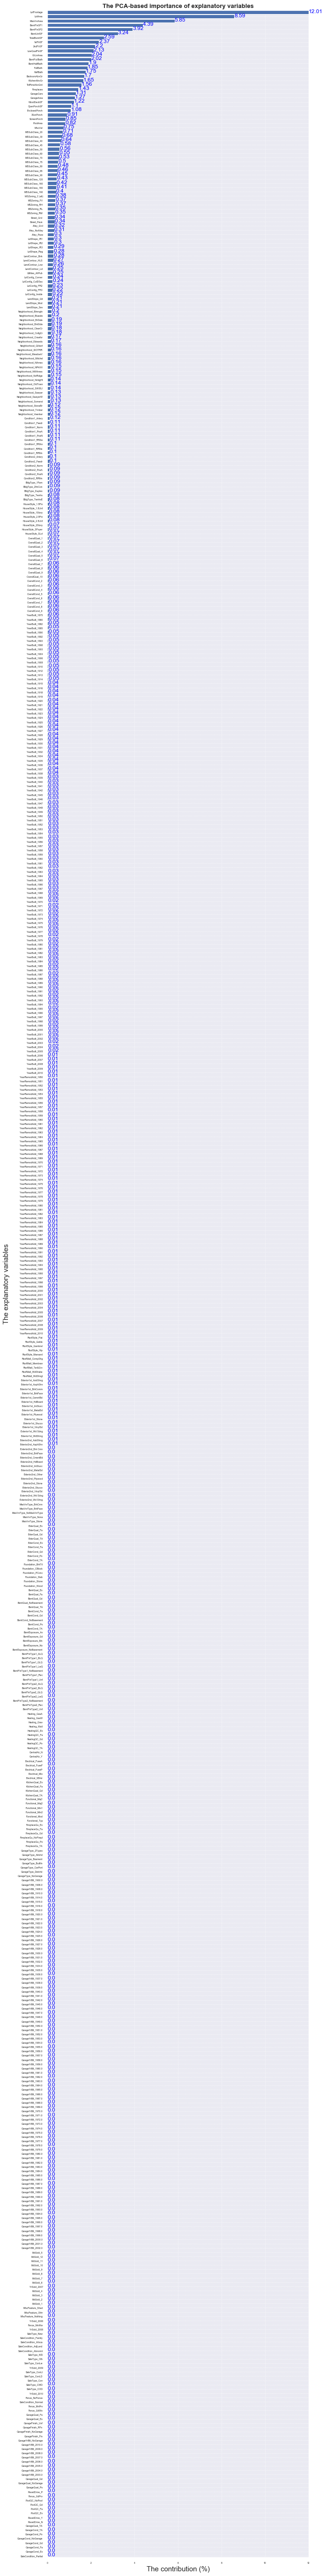

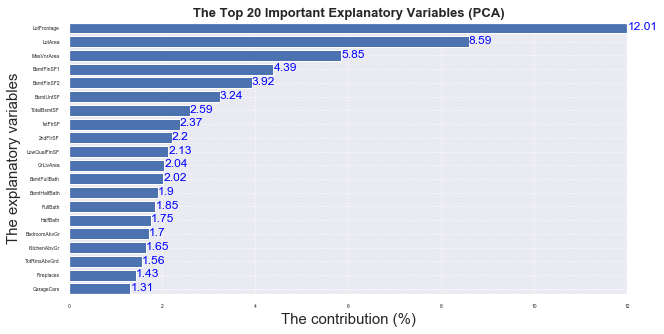

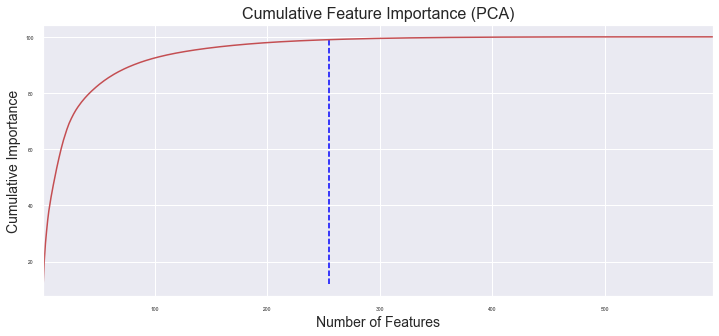

In [1684]:
PCA_select_cum=Pfeature_selection(used_X_transdum,Y,method='PCA',
                                          no_estimators=5,
                  title_contrib='The PCA-based importance of explanatory variables',
                      top_contrib=20,
                  title_top_contrib='The Top 20 Important Explanatory Variables (PCA)',
                     threshold_cum=99,
                  title_cum='Cumulative Feature Importance (PCA)')


In [705]:
# Configure the algorithm
model_ETR=ExtraTreesRegressor(n_estimators=1000)
# Fitting the data
model_ETR.fit(examined_X, Y)

# Recording the results
ETR_feature_importances=model_ETR.feature_importances_
ETR_feature_importances

# Creating a new pandas dataframe
ETR_select=pd.DataFrame(data={'Feature':name_feature,'feature_importance':ETR_feature_importances})
ETR_select

ETR_select=ETR_select.set_index(['Feature'])

# Plotting
fig, ax=plt.subplots(figsize=(10,100)) 
plt.barh(ETR_select['feature_importance'].sort_values(ascending=True).index,
         100*ETR_select['feature_importance'].sort_values(ascending=True))
plt.autoscale(enable=True, axis='both',tight=True)
plt.title('The bagged decision tree-based importance of explanatory variables',
        fontsize=13, fontweight='bold')
plt.ylabel('The explanatory variables',fontsize=15)
plt.xlabel('The score (%)', fontsize=15)
plt.grid(which='major',linestyle=':',linewidth=0.9)
#plt.xticks([0,1,2,3,4])
for i,v in enumerate(round(100*ETR_select['feature_importance'].sort_values(ascending=True),2)):
    ax.text(v , i-0.15 , str(v), color='blue')#, fontweight='bold')  

pd.options.display.float_format = '{:.4f}'.format
ETR_select1=100*ETR_select.sort_values('feature_importance',ascending=False)
ETR_select1.head(10)

ETR_select1['cumulative_importance']=np.cumsum(ETR_select1,axis=0)
ETR_select1.head(25)#['cumulative_importance']

ETR_select_cum=ETR_select1[ETR_select1['cumulative_importance']<99]
ETR_select_cum

ETR_select_cum['feature_importance'].head(10)#.index

fig, ax=plt.subplots(figsize=(10,5)) 
plt.barh(ETR_select_cum['feature_importance'].head(10).
         sort_values(ascending=True).index,
         ETR_select_cum['feature_importance'].head(10).
        sort_values(ascending=True))
plt.autoscale(enable=True, axis='both',tight=True)
plt.title('The Top Ten Important Explanatory Variables',
        fontsize=13, fontweight='bold')
plt.ylabel('The explanatory variables',fontsize=15)
plt.xlabel('The score (%)', fontsize=15)
plt.grid(which='major',linestyle=':',linewidth=0.9)
#plt.xticks([0,1,2,3,4])
for i,v in enumerate(round(ETR_select_cum['feature_importance'].head(10).
                           sort_values(ascending=True),2)):
    ax.text(v , i-0.15 , str(v), color='blue')#, fontweight='bold')  

def TopNimpplt(threshold,title):
    fig, ax=plt.subplots(figsize=(10,5))
    plt.barh(ETR_select_cum['feature_importance'].head(threshold).
         sort_values(ascending=True).index,
         ETR_select_cum['feature_importance'].head(threshold).
        sort_values(ascending=True))
    plt.autoscale(enable=True, axis='both',tight=True)
    plt.title(title,fontsize=13, fontweight='bold')
    plt.ylabel('The explanatory variables',fontsize=15)
    plt.xlabel('The score (%)', fontsize=15)
    plt.grid(which='major',linestyle=':',linewidth=0.9)
    for i,v in enumerate(round(ETR_select_cum['feature_importance'].head(threshold).
                           sort_values(ascending=True),2)):
        ax.text(v , i-0.15 , str(v), color='blue')#, fontweight='bold')  

TopNimpplt(20,'The Most 20 Important Explanatory Variables')

importance_index = np.min(np.where(self.feature_importances['cumulative_importance'] > threshold))
            plt.vlines(x = importance_index + 1, ymin = 0, ymax = 1, linestyles='--', colors = 'blue')
            plt.show();

ETR_select_cum.head(5)

axisX=range(1,
      len(ETR_select_cum.sort_values('cumulative_importance',ascending=True).cumulative_importance)+1)
list(axisX)


plt.figure(figsize=(12,5))
plt.plot(list(axisX),
    ETR_select_cum.sort_values('cumulative_importance',ascending=True).cumulative_importance,
       color='r')
plt.xlabel('Number of Features', size = 14); 
plt.ylabel('Cumulative Importance', size = 14)
plt.title('Cumulative Feature Importance', size = 16)

importance_index =len(ETR_select_cum[ETR_select_cum['cumulative_importance']<90].sort_values('cumulative_importance'
                                                                       ,ascending=True))
#importance_index
plt.vlines(x = importance_index,ymin = ETR_select_cum.sort_values('cumulative_importance',ascending=True).cumulative_importance.head(1)
           , ymax = 90,  linestyles='--', colors = 'blue')
plt.autoscale(enable=True, axis='both',tight=True)
plt.show();

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=1000,
                    n_jobs=None, oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

###  Single Unique Value Features

In [416]:
print(Bold +Red + Underline+ 'The Number of Features with a Single Unique Value:'+ End)
fs.identify_single_unique()

The Number of Features with a Single Unique Value:


NameError: name 'fs' is not defined

In [ ]:
fs.plot_unique()

In [ ]:
fs=FeatureSelector(data=used_data.iloc[:,1:80],labels=used_data.iloc[:,80])

# Training Machine Learning

In [ ]:
used_data.shape

In [ ]:
thu_dum=pd.get_dummies(used_data)
thu_dum.shape

In [ ]:
y=used_data.iloc[:,80]

In [ ]:
X=used_data.iloc[:,1:80]

In [ ]:
totalmisX = X.isnull().sum().sort_values(ascending=False)
totalmisX.head(5)

In [ ]:
plt.figure(figsize=(13,5))
plt.xticks(rotation='90')
plt.barh(totalmisX.index,totalmisX.sort_values(ascending=True))
plt.autoscale(enable=True,axis='both',tight=True)


In [ ]:
X=X.fillna(0)

In [ ]:
fsX=FeatureSelector(data=X,labels=used_data.iloc[:,80])

In [ ]:
fsX.identify_missing(missing_threshold=0.01)

In [ ]:
fsX.plot_missing()

In [ ]:
X.shape

In [ ]:
X=pd.get_dummies(X)

In [ ]:
X.shape

In [ ]:
print(Bold+ Green +'The Statistical Report of the House Sale Price in Boston:\n'+End, stats.describe(y))
print(Bold+ Green+"The Median Value:"+ End,np.median(y))
print(Bold+ Green+"Q1 quantile: "+ End, np.quantile(y, .25)) 
print(Bold+ Green+ "Q2 quantile: "+ End, np.quantile(y, .50)) 
print(Bold+ Green+"Q3 quantile: "+ End, np.quantile(y, .75)) 
#print(Bold+ Green+"Interquantile Range: "+ np.quantile(y, .75) -End, np.quantile(y, .25)) 

In [ ]:
plt.figure(figsize=(6,4))
sns.distplot(y,bins=200)
plt.title('The Distribution of the House Sale Prices in  Boston',fontsize=14)
plt.xlabel('In the US Dollars',fontsize=12)
plt.grid(which='both',linestyle=':',linewidth=1)
plt.minorticks_on()

In [ ]:
plt.figure(figsize=(7,4))
plt.boxplot(y,vert=0)
plt.title('Box and Whishker Plots of the House Sale Price',fontsize=14)
plt.xlabel('In The US Dollars')
plt.grid(which='both',linestyle=':')
plt.minorticks_on()

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=3)

In [ ]:
xgbr_model=XGBRegressor()

In [ ]:
result_xgbr=xgbr_model.fit(X_train,y_train)

In [ ]:
y_predict_testdat=result_xgbr.predict(X_test)

In [ ]:
print(Bold + Red+ 'The accuracy score of the XGBR with the test data:{:.4f}'.format(mean_squared_error(y_test,y_predict_testdat)))

In [ ]:
mean_squared_error(y_test,y_predict_testdat)

In [ ]:
models=[]
models.append(('LRE', LinearRegression()))
models.append(('LAS', Lasso()))
models.append(('ELA', ElasticNet()))
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))
models.append(('XGBr', XGBRegressor()))
#models.append(('',))
#models.append(('',))
#models.append(('',))
#models.append(('',))

In [ ]:
results=[]
names=[]
for name, model in models:
    kfold=KFold(n_splits=70,random_state=7)
    cv_results=cross_val_score(model,X_train,y_train,cv=kfold,n_jobs=10,scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)"
    print(msg)

In [ ]:
results=[]
names=[]
print(Bold + Green+ '\n The Spot Check Result of 11 Competed Models \n'.center(135,'-')+End)
for name, model in models:
    kFold=KFold(n_splits=70, random_state=7)
    cv_results=cross_val_score(model, X_train,y_train,cv=kFold,n_jobs=10,scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)
print(Bold+ Green +"The End".center(44,'-'))

In [ ]:
fig=plt.figure(figsize=(9,4))
plt.boxplot(results,vert=0,patch_artist=True)
ax=fig.add_subplot(111)
ax.set_yticklabels(names)
plt.title('Box and Whisker Plots for the Regression Algorithm Comparison',fontsize=14)
plt.xlabel('The Scoring Values of Mean Squared Errors')
plt.ylabel('The Ensemble Algorithms')
plt.autoscale(enable=True,axis='both',tight=True)
plt.grid()

In [ ]:
model1s=[]
model1s.append(('LRE', LinearRegression()))
model1s.append(('LAS', Lasso()))
model1s.append(('ELA', ElasticNet()))
#model1s.append(('KNR', KNeighborsRegressor))
#model1s.append(('SVR', SVR))
#model1s.append(('',))
#model1s.append(('',))

In [ ]:
results1=[]
names1=[]
print(Bold + Green+ '\n The Spot Check Result of 11 Competed Models \n'.center(135,'-')+End)
for name1, model1 in model1s:
    kFold=KFold(n_splits=70, random_state=7)
    cv_results1=cross_val_score(model1, X_train,y_train,cv=kFold,n_jobs=10,scoring='neg_mean_squared_error')
    results1.append(cv_results1)
    names1.append(name1)
    msg="%s: %f (%f)" % (name1,cv_results1.mean(),cv_results1.std())
    print(msg)
print(Bold+ Green +"The End".center(44,'-'))